# Setup

Time approximations were done on a M4 Max Macbook on first run using VS Code. Depending on your machine, this notebook could take longer

~ 55.6 seconds

In [75]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
training = pd.read_csv('./playground-series-s5e11/train.csv', index_col='id')
testing = pd.read_csv('./playground-series-s5e11/test.csv', index_col='id')

training.head(5)

annual_income  debt_to_income_ratio  credit_score  loan_amount  \
id                                                                   
0        29367.99                 0.084           736      2528.42   
1        22108.02                 0.166           636      4593.10   
2        49566.20                 0.097           694     17005.15   
3        46858.25                 0.065           533      4682.48   
4        25496.70                 0.053           665     12184.43   

    interest_rate  gender marital_status education_level employment_status  \
id                                                                           
0           13.67  Female         Single     High School     Self-employed   
1           12.92    Male        Married        Master's          Employed   
2            9.76    Male         Single     High School          Employed   
3           16.10  Female         Single     High School          Employed   
4           10.21    Male        Married     High School          Employed   

          loan_purpose grade_subgrade  loan_paid_back  
id                                                     
0                Other             C3             1.0  
1   Debt consolidation             D3             0.0  
2   Debt consolidation             C5             1.0  
3   Debt consolidation             F1             1.0  
4                Other             D1             1.0

# EDA

~ 19.9 seconds

In [77]:
training.shape

(593994, 12)

In [78]:
print(training.isnull().sum())
print()
print(training.isna().sum())

annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64


In [79]:
training.info()
training.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


annual_income  debt_to_income_ratio   credit_score    loan_amount  \
count   593994.000000         593994.000000  593994.000000  593994.000000   
unique            NaN                   NaN            NaN            NaN   
top               NaN                   NaN            NaN            NaN   
freq              NaN                   NaN            NaN            NaN   
mean     48212.202976              0.120696     680.916009   15020.297629   
std      26711.942078              0.068573      55.424956    6926.530568   
min       6002.430000              0.011000     395.000000     500.090000   
25%      27934.400000              0.072000     646.000000   10279.620000   
50%      46557.680000              0.096000     682.000000   15000.220000   
75%      60981.320000              0.156000     719.000000   18858.580000   
max     393381.740000              0.627000     849.000000   48959.950000   

        interest_rate  gender marital_status education_level  \
count   593994.000000  593994         593994          593994   
unique            NaN       3              4               5   
top               NaN  Female         Single      Bachelor's   
freq              NaN  306175         288843          279606   
mean        12.356345     NaN            NaN             NaN   
std          2.008959     NaN            NaN             NaN   
min          3.200000     NaN            NaN             NaN   
25%         10.990000     NaN            NaN             NaN   
50%         12.370000     NaN            NaN             NaN   
75%         13.680000     NaN            NaN             NaN   
max         20.990000     NaN            NaN             NaN   

       employment_status        loan_purpose grade_subgrade  loan_paid_back  
count             593994              593994         593994   593994.000000  
unique                 5                   8             30             NaN  
top             Employed  Debt consolidation             C3             NaN  
freq              450645              324695          58695             NaN  
mean                 NaN                 NaN            NaN        0.798820  
std                  NaN                 NaN            NaN        0.400883  
min                  NaN                 NaN            NaN        0.000000  
25%                  NaN                 NaN            NaN        1.000000  
50%                  NaN                 NaN            NaN        1.000000  
75%                  NaN                 NaN            NaN        1.000000  
max                  NaN                 NaN            NaN        1.000000

In [80]:
training.describe().T

count          mean           std       min  \
annual_income         593994.0  48212.202976  26711.942078  6002.430   
debt_to_income_ratio  593994.0      0.120696      0.068573     0.011   
credit_score          593994.0    680.916009     55.424956   395.000   
loan_amount           593994.0  15020.297629   6926.530568   500.090   
interest_rate         593994.0     12.356345      2.008959     3.200   
loan_paid_back        593994.0      0.798820      0.400883     0.000   

                            25%        50%        75%         max  
annual_income         27934.400  46557.680  60981.320  393381.740  
debt_to_income_ratio      0.072      0.096      0.156       0.627  
credit_score            646.000    682.000    719.000     849.000  
loan_amount           10279.620  15000.220  18858.580   48959.950  
interest_rate            10.990     12.370     13.680      20.990  
loan_paid_back            1.000      1.000      1.000       1.000

## EDA Graphs

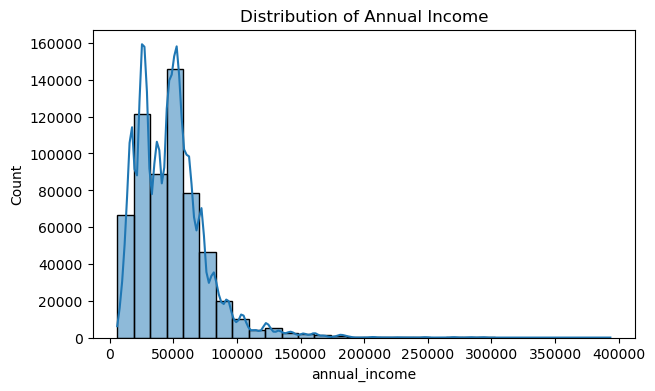

In [81]:
plt.figure(figsize=(7,4))
sns.histplot(training["annual_income"], kde=True, bins=30)
plt.title("Distribution of Annual Income")
plt.show()

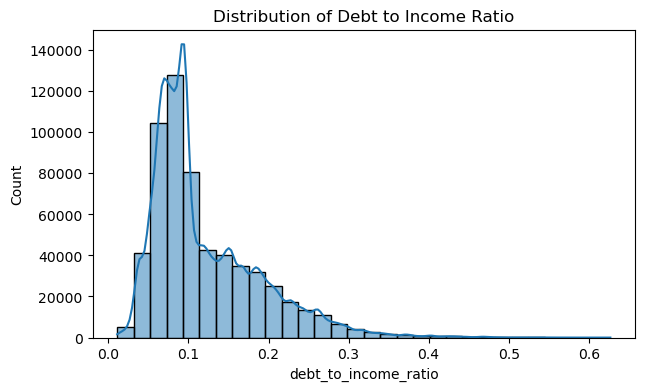

In [82]:
plt.figure(figsize=(7,4))
sns.histplot(training["debt_to_income_ratio"], kde=True, bins=30)
plt.title("Distribution of Debt to Income Ratio")
plt.show()

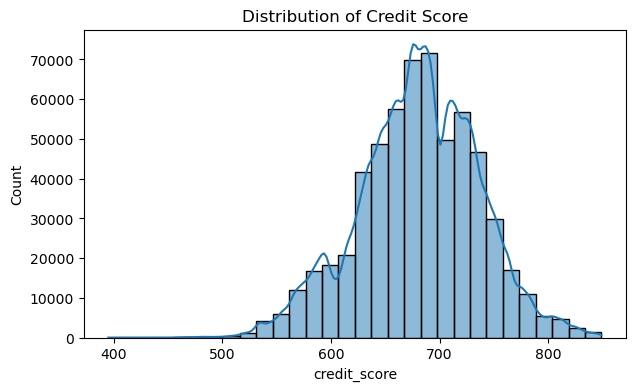

In [83]:
plt.figure(figsize=(7,4))
sns.histplot(training["credit_score"], kde=True, bins=30)
plt.title("Distribution of Credit Score")
plt.show()

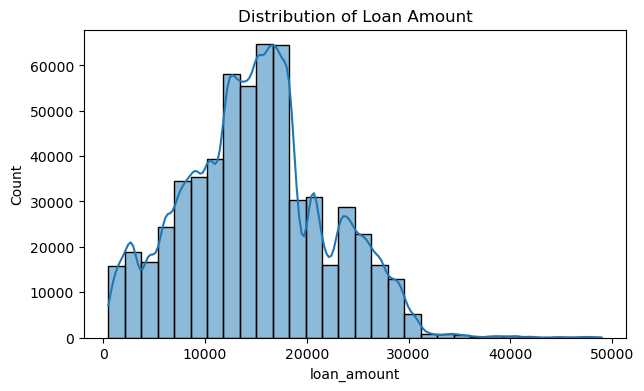

In [84]:
plt.figure(figsize=(7,4))
sns.histplot(training["loan_amount"], kde=True, bins=30)
plt.title("Distribution of Loan Amount")
plt.show()

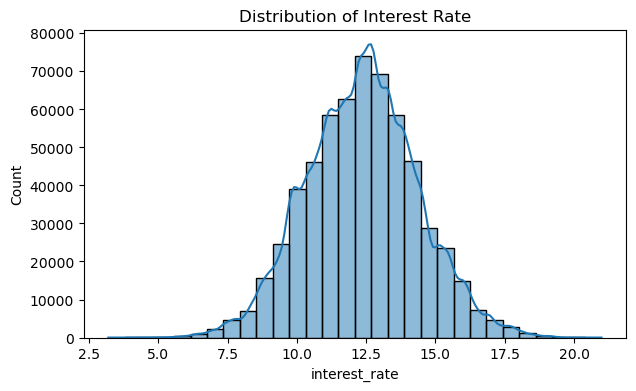

In [85]:
plt.figure(figsize=(7,4))
sns.histplot(training["interest_rate"], kde=True, bins=30)
plt.title("Distribution of Interest Rate")
plt.show()

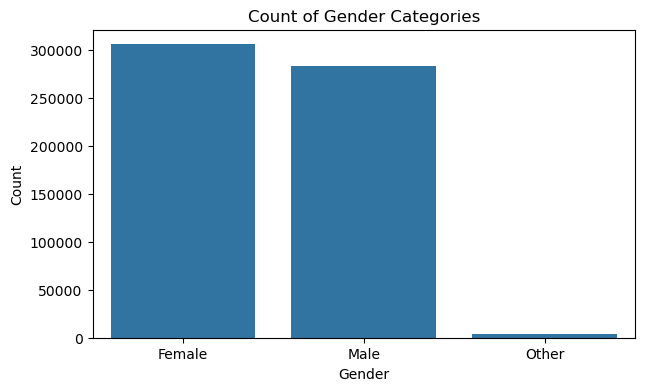

In [86]:
plt.figure(figsize=(7,4))
sns.countplot(x="gender", data=training)
plt.title("Count of Gender Categories")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

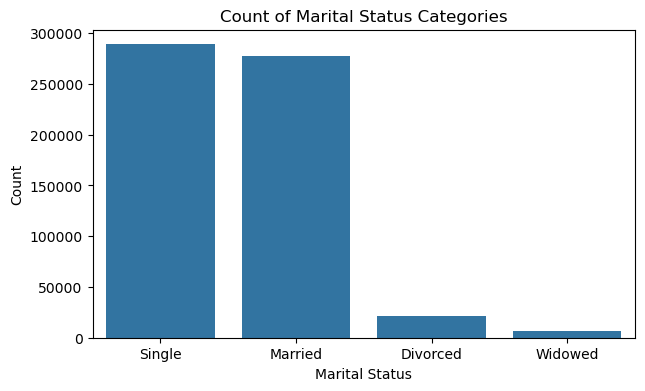

In [87]:
plt.figure(figsize=(7,4))
sns.countplot(x="marital_status", data=training)
plt.title("Count of Marital Status Categories")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

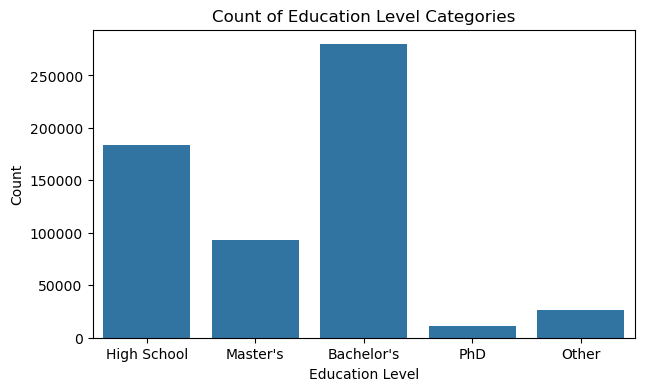

In [88]:
plt.figure(figsize=(7,4))
sns.countplot(x="education_level", data=training)
plt.title("Count of Education Level Categories")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

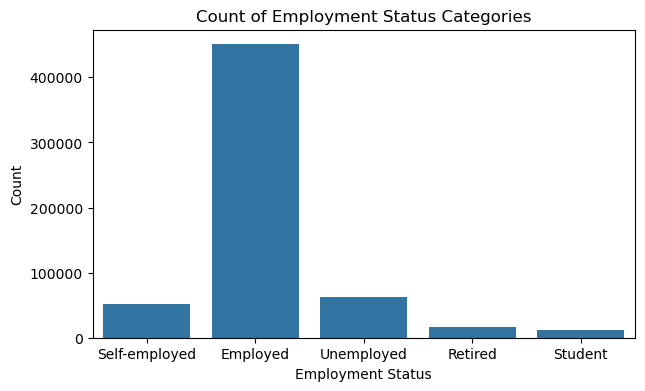

In [89]:
plt.figure(figsize=(7,4))
sns.countplot(x="employment_status", data=training)
plt.title("Count of Employment Status Categories")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

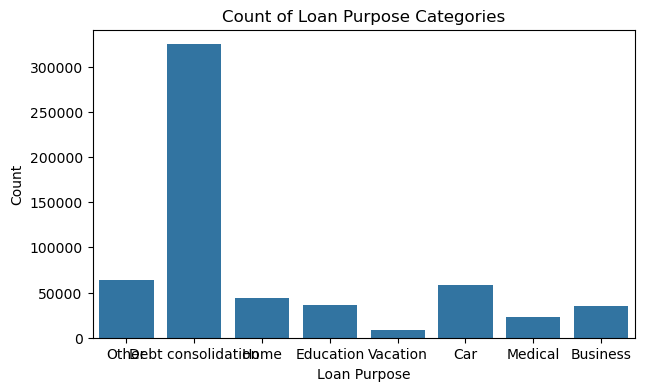

In [90]:
plt.figure(figsize=(7,4))
sns.countplot(x="loan_purpose", data=training)
plt.title("Count of Loan Purpose Categories")
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.show()

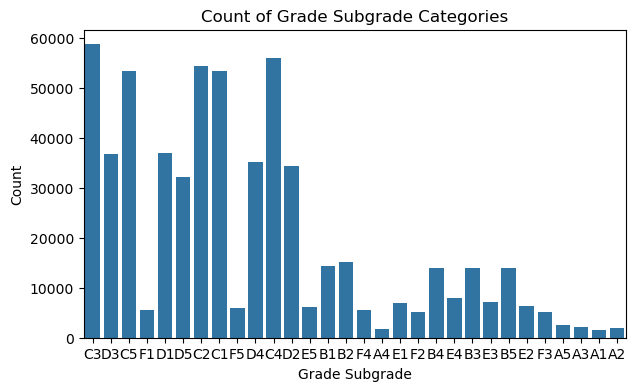

In [91]:
plt.figure(figsize=(7,4))
sns.countplot(x="grade_subgrade", data=training)
plt.title("Count of Grade Subgrade Categories")
plt.xlabel("Grade Subgrade")
plt.ylabel("Count")
plt.show()

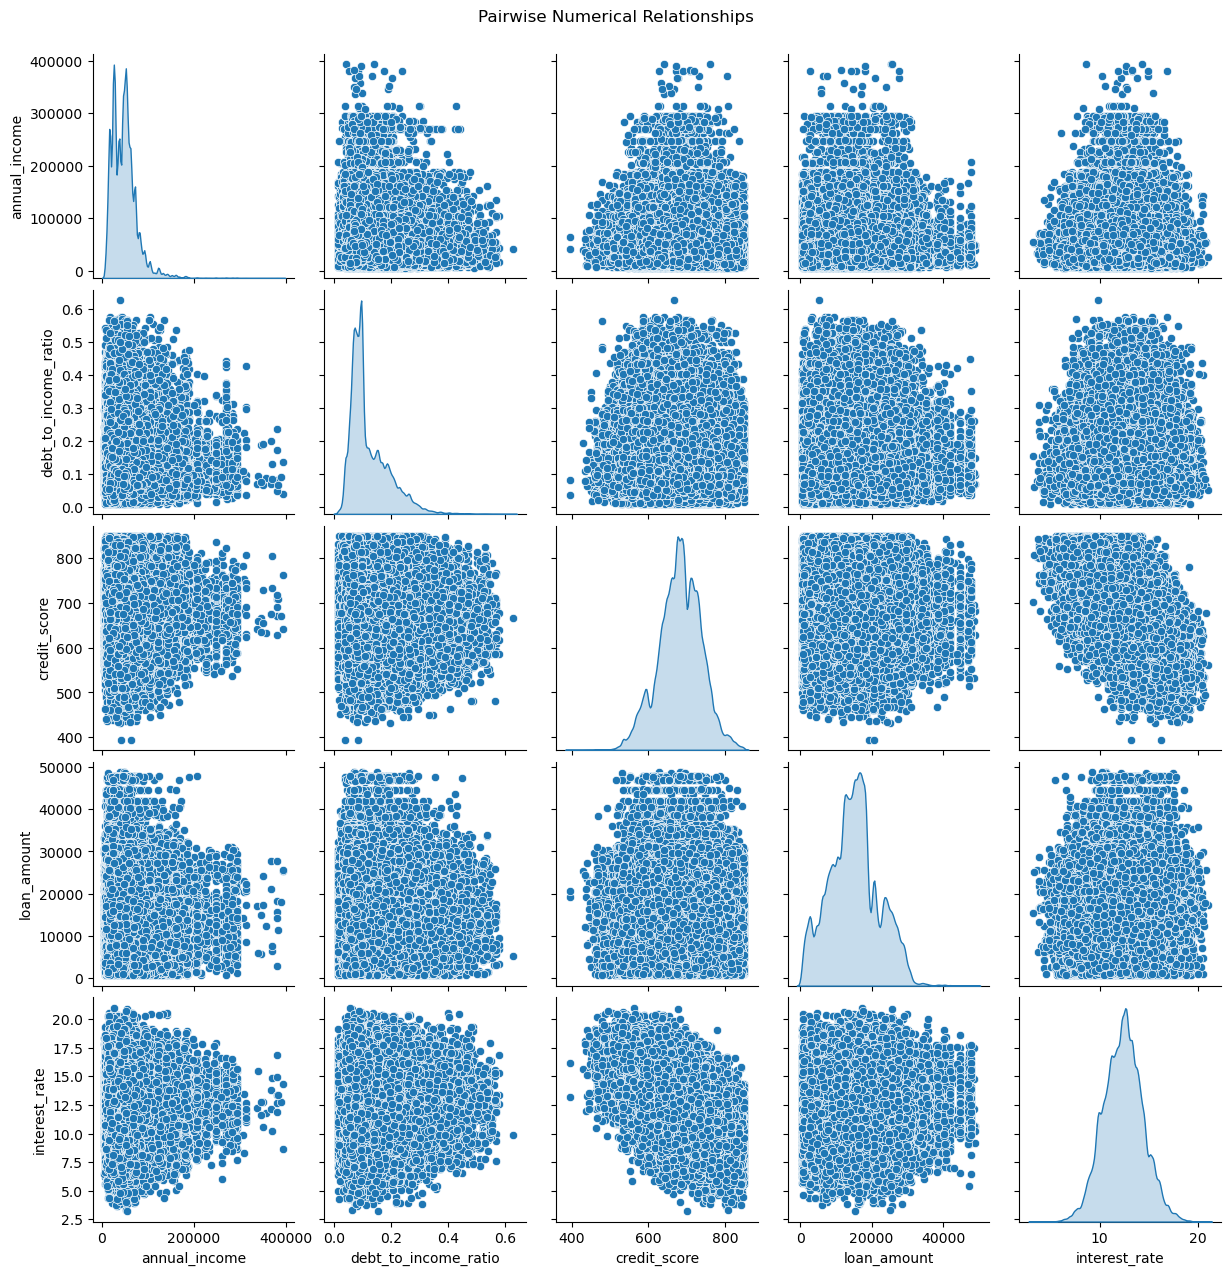

annual_income  debt_to_income_ratio  credit_score  \
annual_income              1.000000              0.000553      0.001509   
debt_to_income_ratio       0.000553              1.000000     -0.061617   
credit_score               0.001509             -0.061617      1.000000   
loan_amount               -0.003407             -0.008236     -0.005761   
interest_rate             -0.002507              0.030316     -0.538335   

                      loan_amount  interest_rate  
annual_income           -0.003407      -0.002507  
debt_to_income_ratio    -0.008236       0.030316  
credit_score            -0.005761      -0.538335  
loan_amount              1.000000      -0.001174  
interest_rate           -0.001174       1.000000

In [92]:
numerical_vars = ["annual_income","debt_to_income_ratio","credit_score", "loan_amount", "interest_rate"]
sns.pairplot(training[numerical_vars], diag_kind="kde")
plt.suptitle("Pairwise Numerical Relationships", y=1.02)
plt.show()

training[numerical_vars].corr()

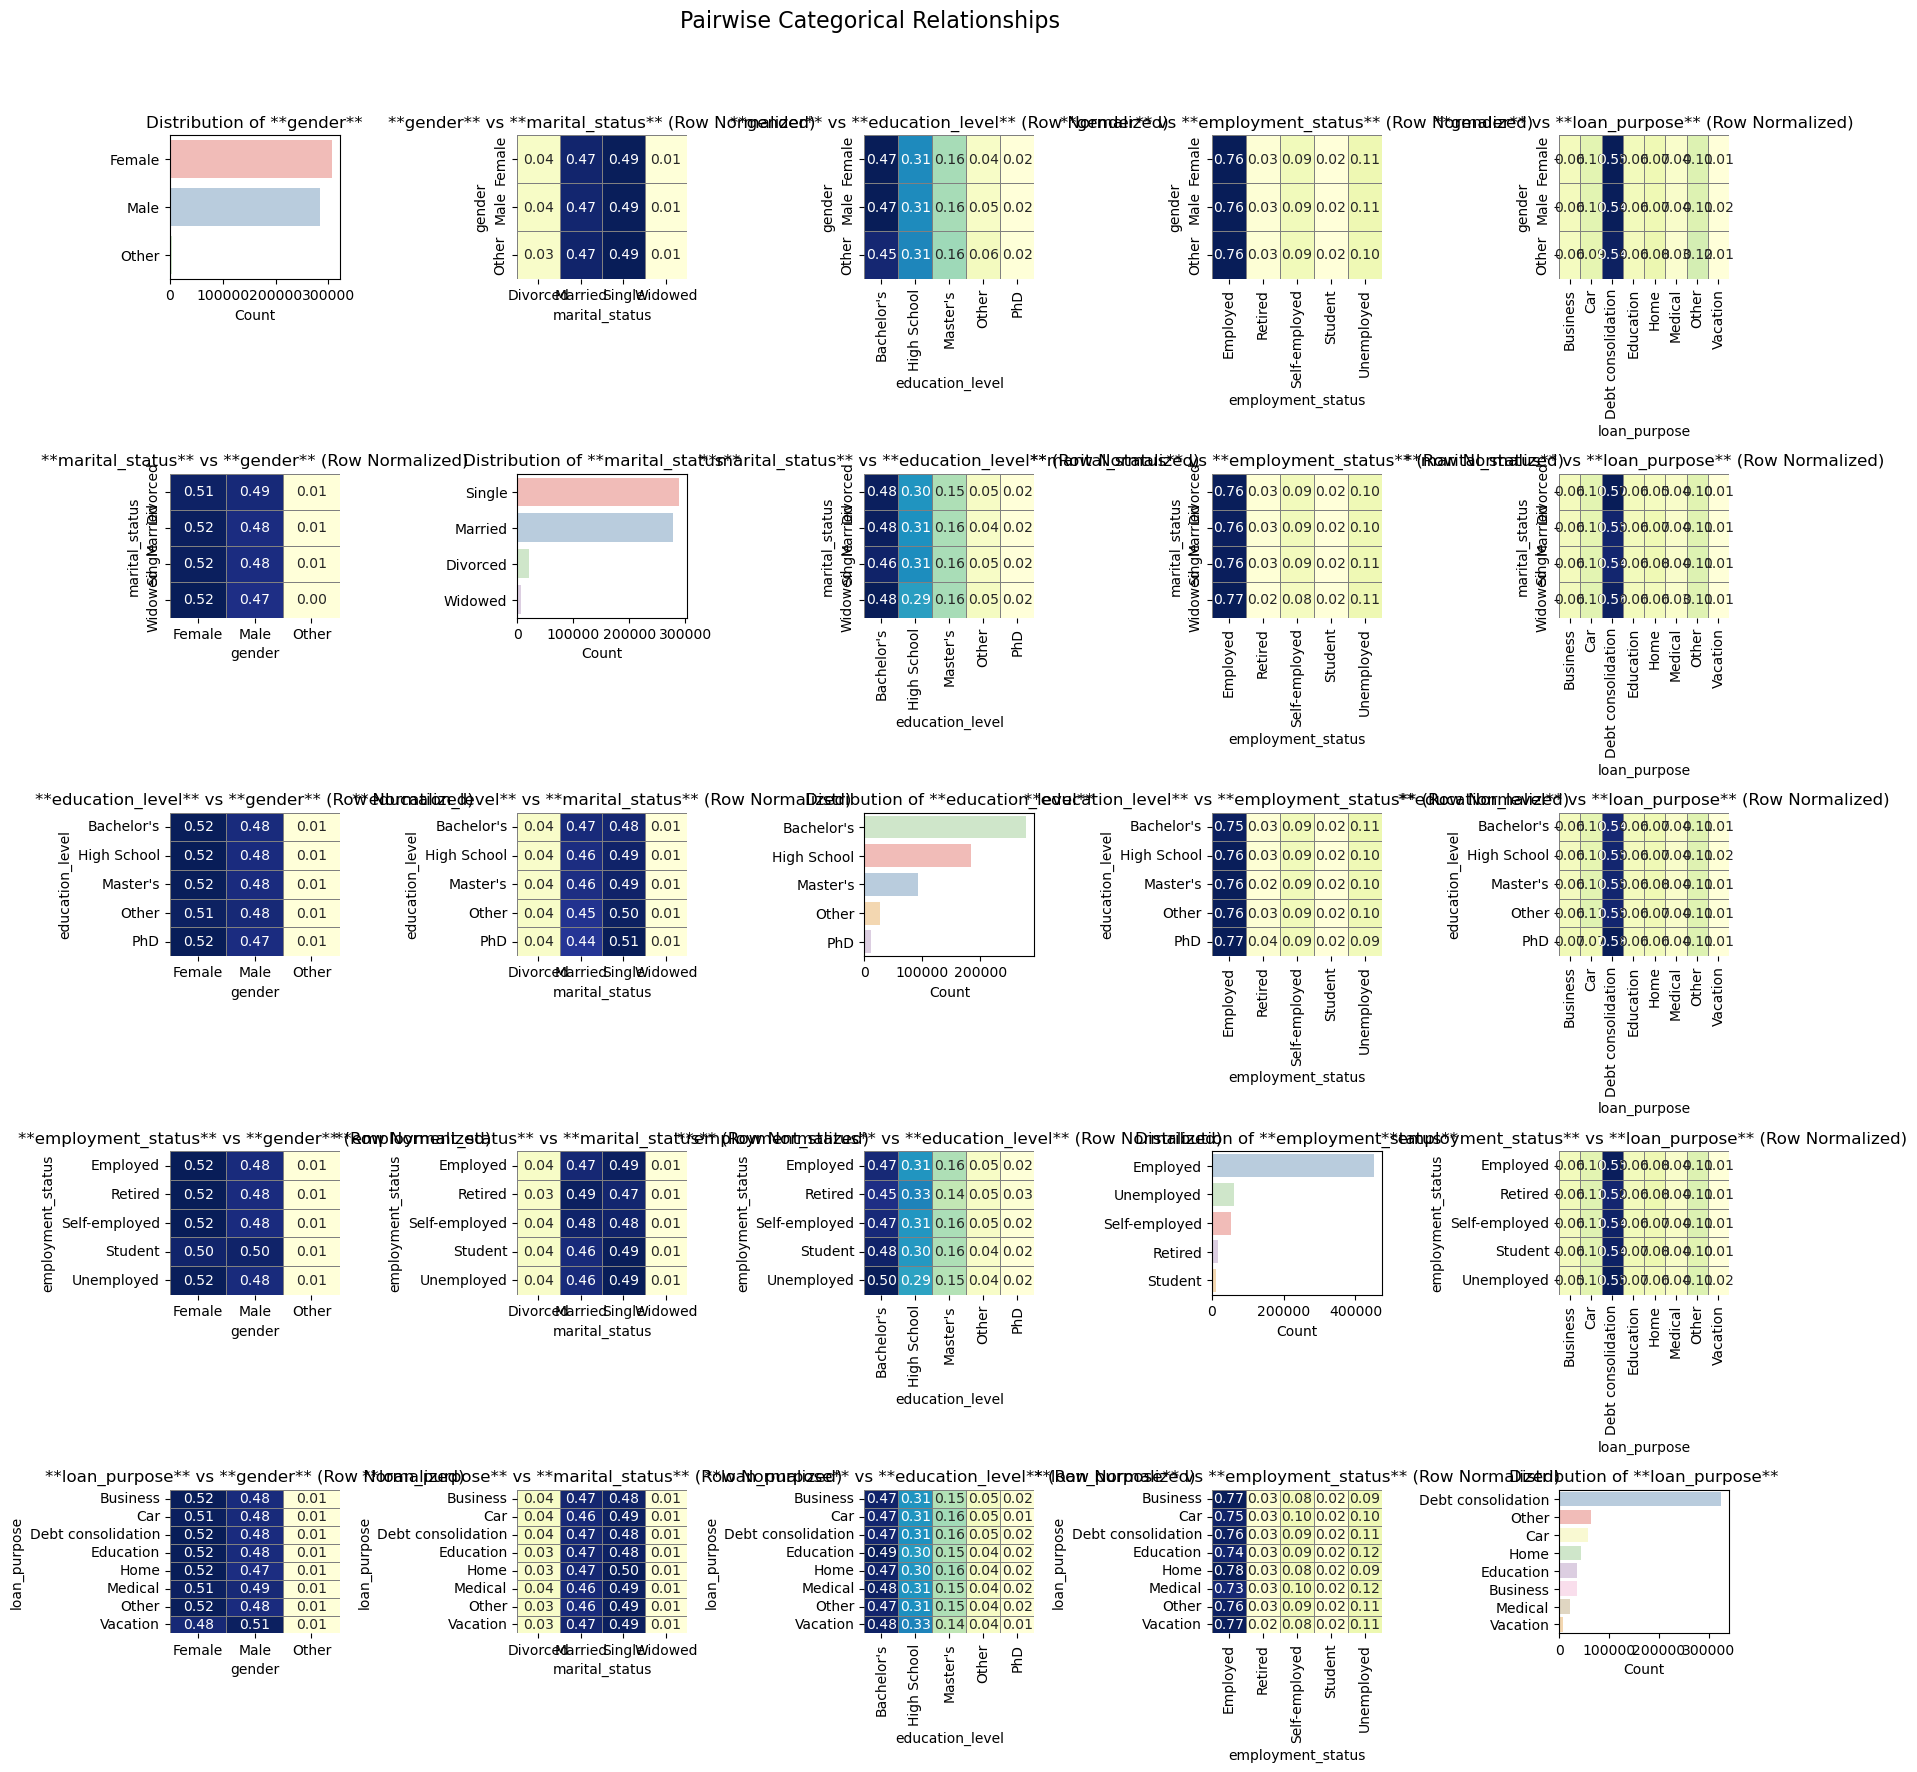

In [93]:
categorical_vars = ["gender","marital_status","education_level", "employment_status", "loan_purpose"]
n_categorical_vars = len(categorical_vars)

fig, axes = plt.subplots(n_categorical_vars, n_categorical_vars, figsize=(n_categorical_vars * 3.5, n_categorical_vars * 3.5))
plt.suptitle("Pairwise Categorical Relationships", y=1.01, fontsize=16)

for i in range(n_categorical_vars):
    for j in range(n_categorical_vars):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]

        # --- Diagonal (i == j): Individual Distribution (Count Plot) ---
        if i == j:
            # Use countplot to show the frequency of each category
            sns.countplot(
                y=training[var1],
                ax=axes[i, j],
                hue=training[var1],
                palette="Pastel1",
                order=training[var1].value_counts().index,
                legend=False
            )
            axes[i, j].set_title(f"Distribution of **{var1}**", fontsize=12)
            axes[i, j].set_ylabel("")
            axes[i, j].set_xlabel("Count")

        # --- Off-Diagonal (i != j): Pairwise Relationship (Heatmap) ---
        else:
            # 1. Create a contingency table (cross-tabulation)
            # Normalize='index' (row-wise) shows the distribution of var2 *within* each category of var1
            contingency_table = pd.crosstab(training[var1], training[var2], normalize='index')

            # 2. Plot the contingency table as a heatmap
            sns.heatmap(
                contingency_table,
                annot=True,
                fmt=".2f",
                cmap="YlGnBu",
                cbar=False,
                ax=axes[i, j],
                linewidths=.5,
                linecolor='gray'
            )
            axes[i, j].set_title(f"**{var1}** vs **{var2}** (Row Normalized)", fontsize=12)
            axes[i, j].set_ylabel(var1)
            axes[i, j].set_xlabel(var2)

# Improve layout spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Outlier Checking

~ 1.6 seconds

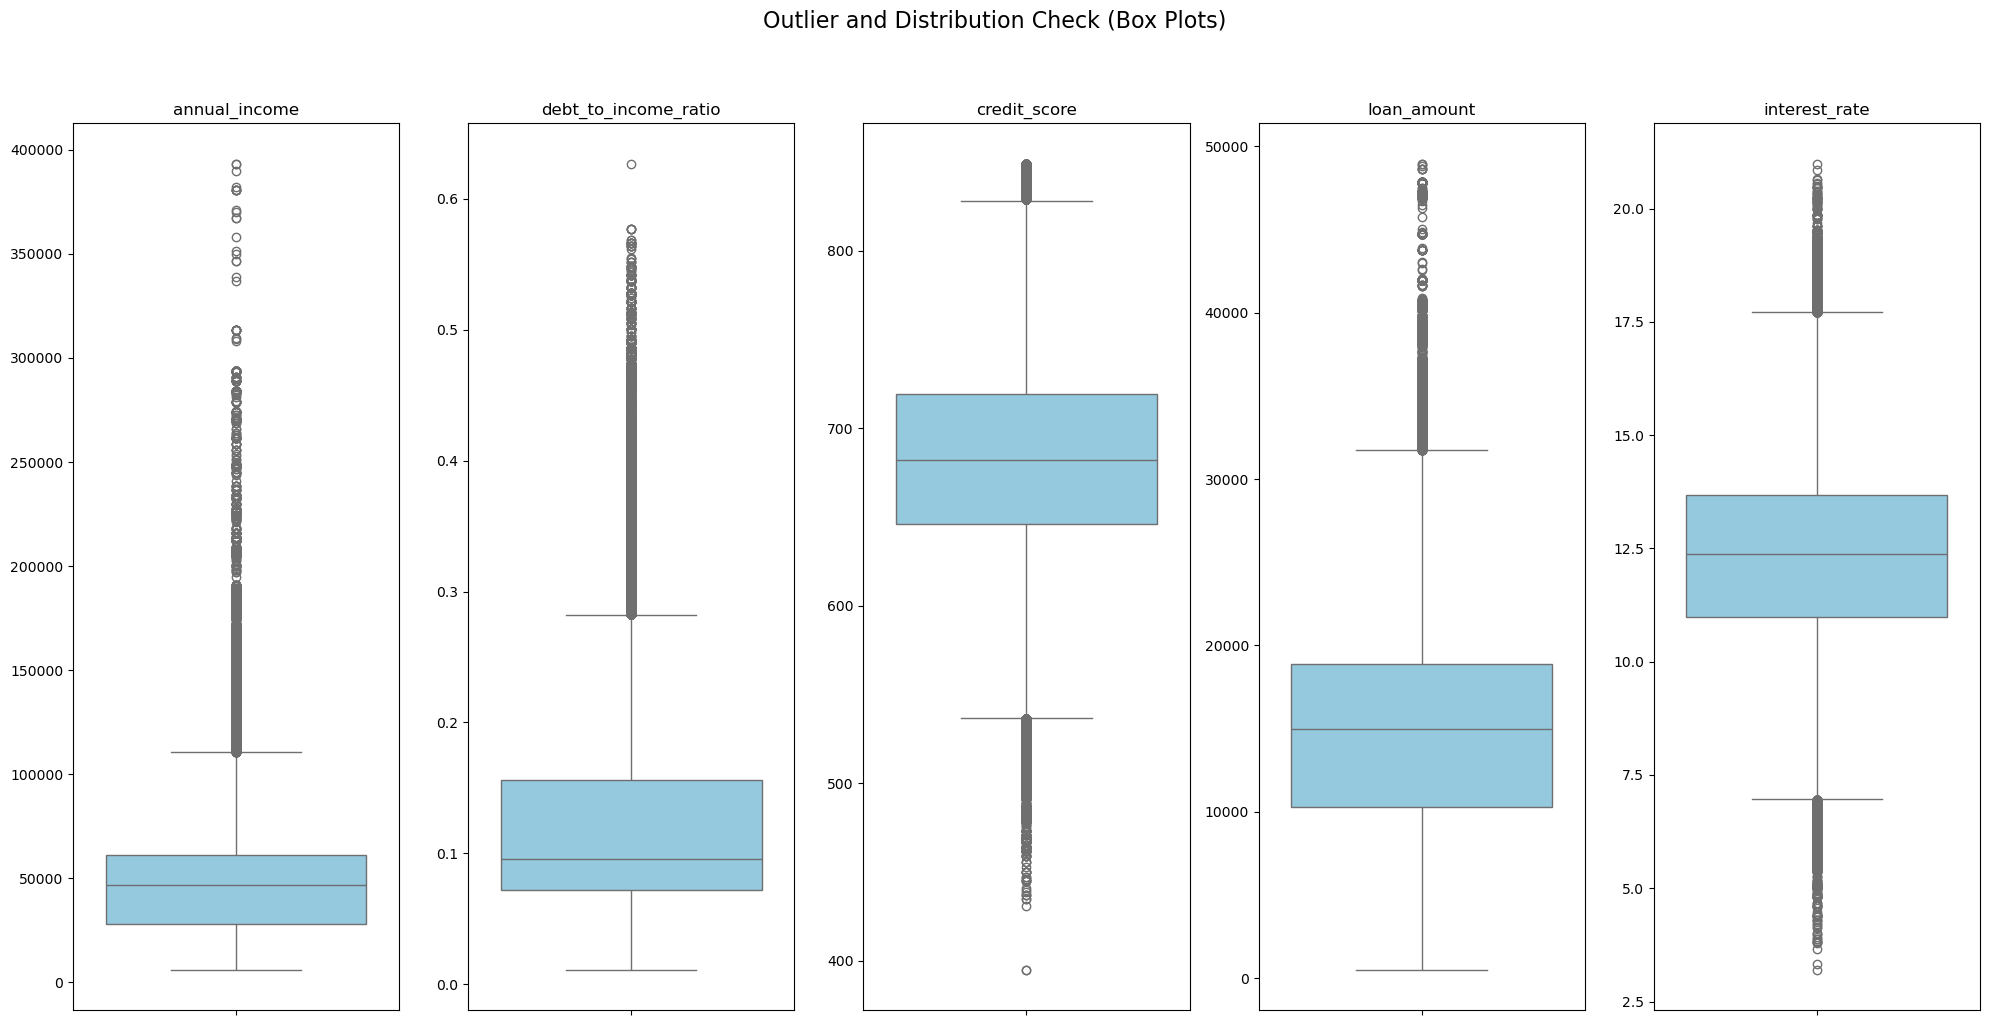

In [94]:
n_numerical_cols = len(numerical_vars)

fig, axes = plt.subplots(1, n_numerical_cols, figsize=(4 * n_numerical_cols, 10))
plt.suptitle("Outlier and Distribution Check (Box Plots)", fontsize=16, y=1.02)

for i, col in enumerate(numerical_vars):
    sns.boxplot(y=training[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Comparing to `loan_paid_back`

~ 4.3 seconds

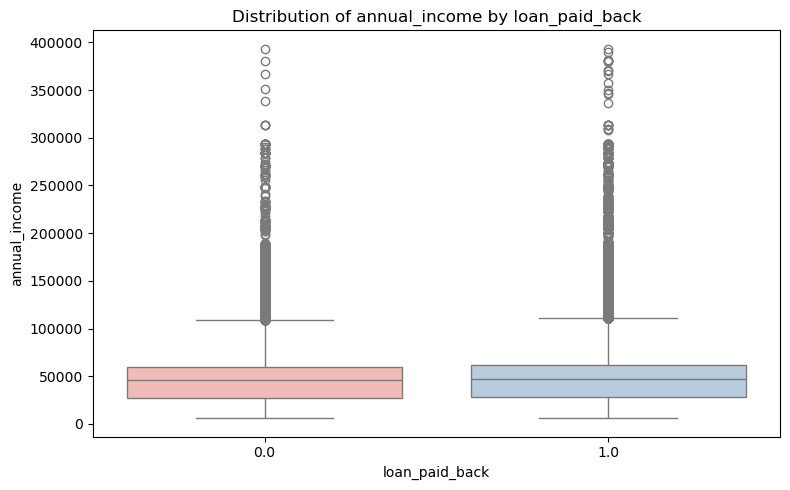

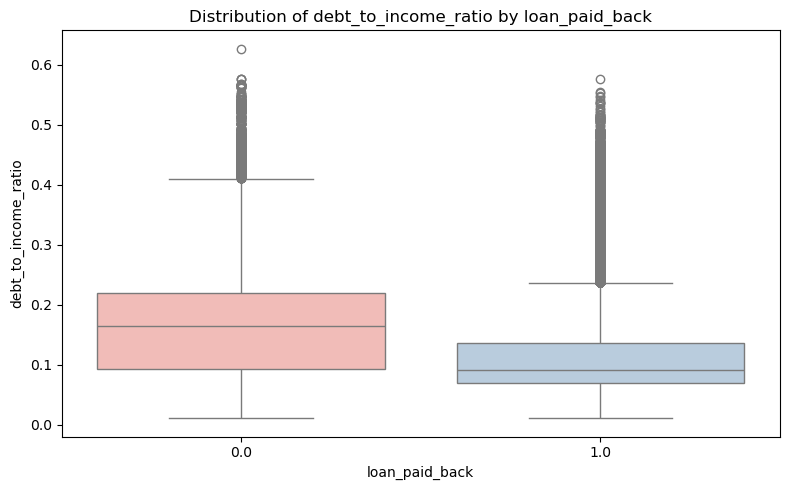

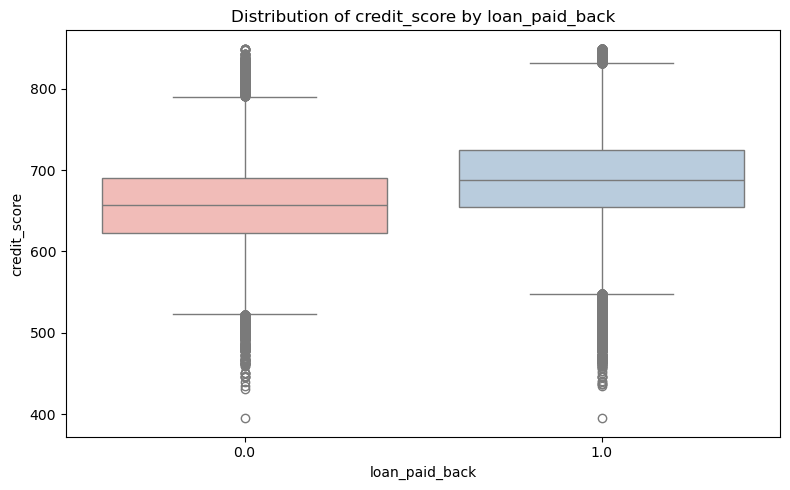

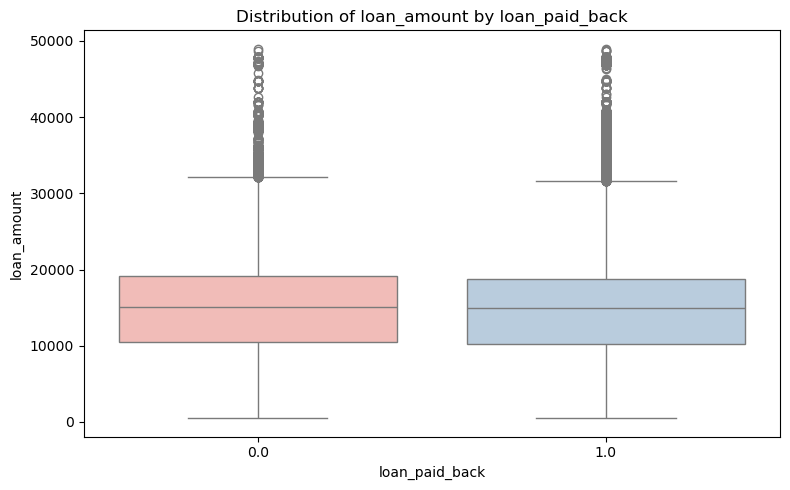

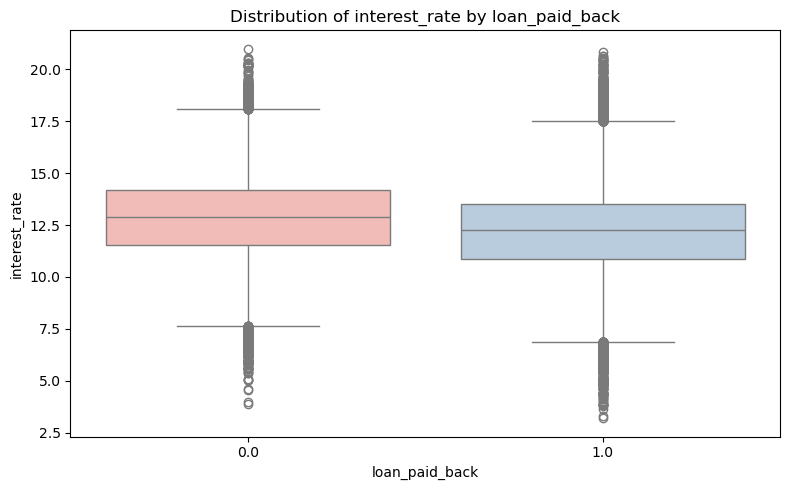

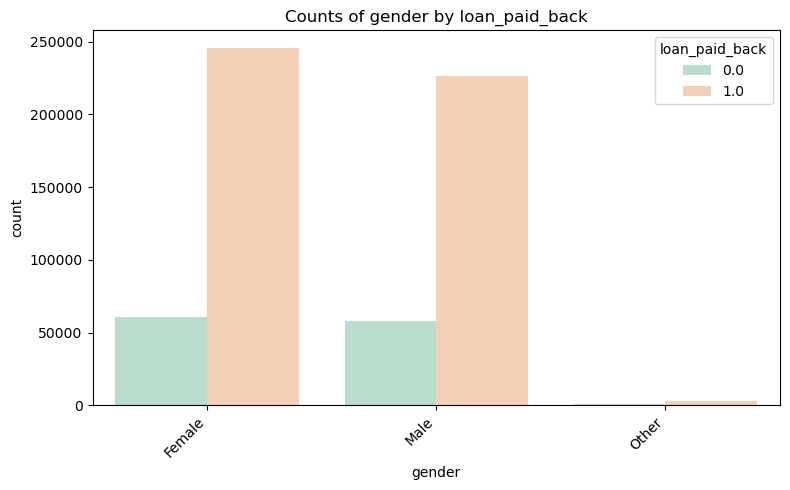

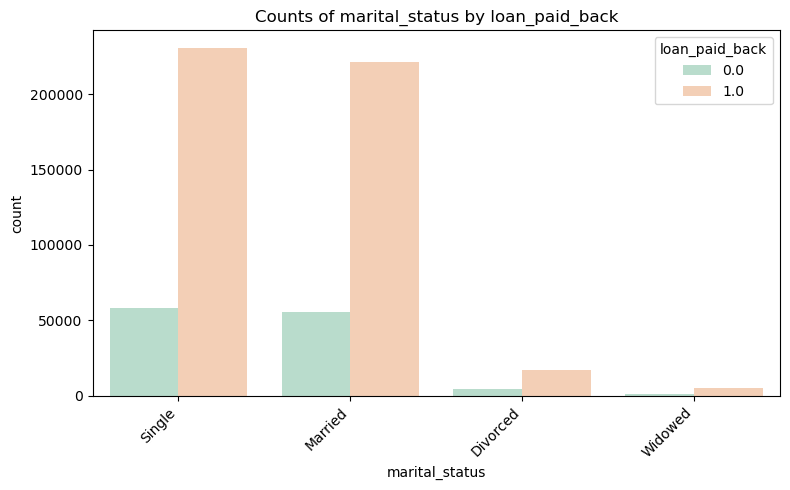

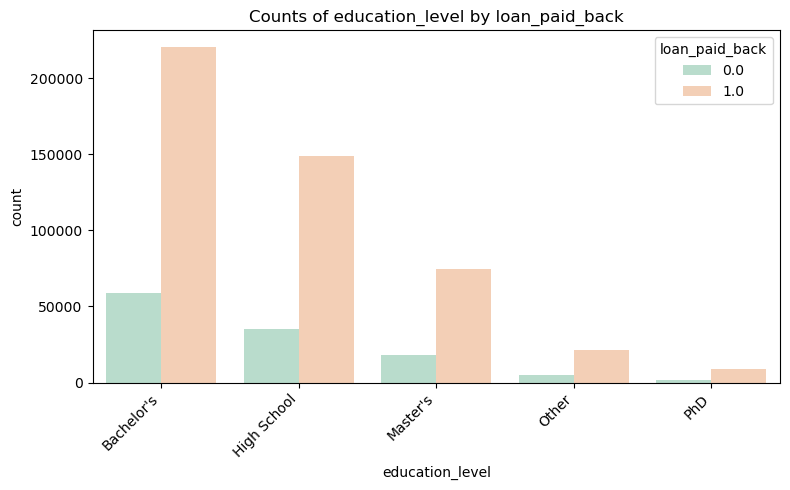

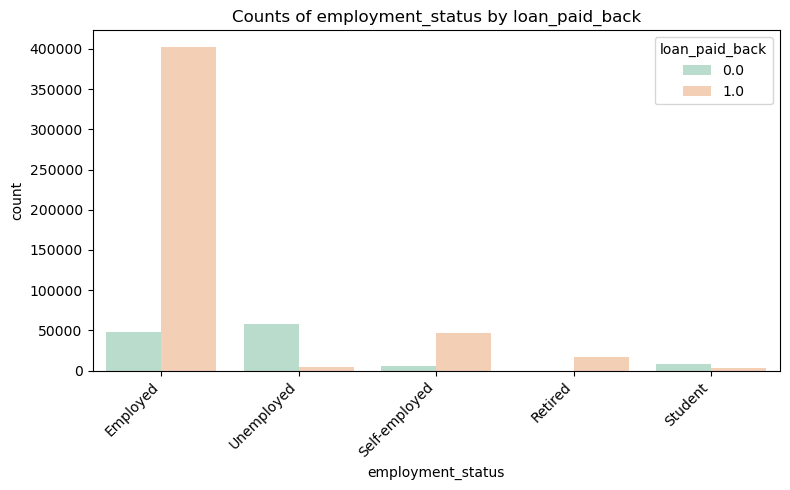

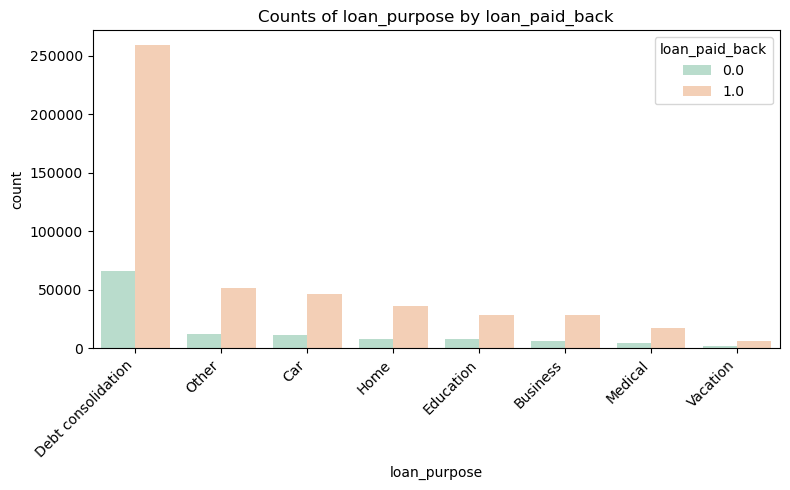

In [95]:
def plot_feature_vs_target(df, feature_name, target_name):
    plt.figure(figsize=(8, 5))

    if feature_name in numerical_vars:
        sns.boxplot(
            x=target_name,
            y=feature_name,
            data=df,
            hue=target_name,
            palette="Pastel1",
            legend=False
        )
        plt.title(f'Distribution of {feature_name} by {target_name}')

    elif feature_name in categorical_vars:
        sns.countplot(
            x=feature_name,
            hue=target_name,
            data=df,
            palette="Pastel2",
            order=df[feature_name].value_counts().index
        )
        plt.title(f'Counts of {feature_name} by {target_name}')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=target_name)

    else:
        print(f"Error: '{feature_name}' not recognized as a numerical or categorical variable.")
        return

    plt.tight_layout()
    plt.show()

full_categorical_vars = categorical_vars + ["grade_subgrade"]
full_vars = numerical_vars + full_categorical_vars

partial_vars = numerical_vars + categorical_vars

for col in partial_vars:
    plot_feature_vs_target(training, col, "loan_paid_back")

# Splitting and Preparing the Data

~ 3.5 seconds

In [96]:
from sklearn.model_selection import train_test_split

SEED = 42

X = training[full_vars]
y = training["loan_paid_back"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts())

(415795, 11) (178199, 11)
loan_paid_back
1.0    332392
0.0     83403
Name: count, dtype: int64


Because the data is skewed with very few people Defaulting on their loans, I need to make sure my training data is not bias. So I will use bootstrapping on my training data.

In [97]:
from sklearn.utils import resample

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train_data = pd.concat([X_train, y_train], axis=1)

majority = train_data[train_data.loan_paid_back == 1]
minority = train_data[train_data.loan_paid_back == 0]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=SEED)

train_data_balanced = pd.concat([majority, minority_upsampled])
train_data_balanced = train_data_balanced.sample(frac=1, random_state=SEED).reset_index(drop=True)

X_train = train_data_balanced.drop('loan_paid_back', axis=1)
y_train = train_data_balanced['loan_paid_back']

print(f"Balanced Train Counts:\n{y_train.value_counts()}")

Balanced Train Counts:
loan_paid_back
0.0    332392
1.0    332392
Name: count, dtype: int64


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[numerical_vars])
X_train_scaled_df = pd.DataFrame(
    X_train_scaled_num,
    columns=numerical_vars,
    index=X_train.index
)

X_test_scaled_num = scaler.transform(X_test[numerical_vars])
X_test_scaled_df = pd.DataFrame(
    X_test_scaled_num,
    columns=numerical_vars,
    index=X_test.index
)

Here I scaled the data since income is significantly larger than interest rate. I scale the data for all models

In [99]:
X_train_cat = pd.get_dummies(X_train[categorical_vars], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_vars], drop_first=True)

X_train_encoded_cat, X_test_encoded_cat = X_train_cat.align(
    X_test_cat,
    join='left',
    axis=1,
    fill_value=0
)

print(f"Encoded Shape Train: {X_train_encoded_cat.shape}, Test: {X_test_encoded_cat.shape}")

X_train_cat = pd.concat([X_train_scaled_df, X_train_encoded_cat], axis=1)
X_test_cat = pd.concat([X_test_scaled_df, X_test_encoded_cat], axis=1)

print(f"Final Feature Shape Train: {X_train_cat.shape}, Test: {X_test_cat.shape}")

Encoded Shape Train: (664784, 20), Test: (178199, 20)
Final Feature Shape Train: (664784, 25), Test: (178199, 25)


In [100]:
X_train_full = pd.get_dummies(X_train[full_categorical_vars], drop_first=True)
X_test_full = pd.get_dummies(X_test[full_categorical_vars], drop_first=True)

X_train_encoded_full, X_test_encoded_full = X_train_full.align(
    X_test_full,
    join='left',
    axis=1,
    fill_value=0
)

print(f"Encoded Shape Train: {X_train_encoded_full.shape}, Test: {X_test_encoded_full.shape}")

X_train_full = pd.concat([X_train_scaled_df, X_train_encoded_full], axis=1)
X_test_full = pd.concat([X_test_scaled_df, X_test_encoded_full], axis=1)

print(f"Final Feature Shape Train: {X_train_full.shape}, Test: {X_test_full.shape}")

Encoded Shape Train: (664784, 49), Test: (178199, 49)
Final Feature Shape Train: (664784, 54), Test: (178199, 54)


In [101]:
X_train_full.head()

annual_income  debt_to_income_ratio  credit_score  loan_amount  \
0       0.235828              1.255886      0.968334    -0.240341   
1      -0.618646             -0.563929     -0.165068     1.485890   
2      -0.663634              0.300806      1.004315     0.208898   
3      -0.686860             -0.512303     -0.848708    -0.382689   
4       0.939451              0.210460     -0.039134    -1.195815   

   interest_rate  gender_Male  gender_Other  marital_status_Married  \
0      -2.164065         True         False                   False   
1      -0.601779        False         False                    True   
2      -0.105816         True         False                   False   
3      -0.229807         True         False                    True   
4      -1.137420         True         False                    True   

   marital_status_Single  marital_status_Widowed  ...  grade_subgrade_E1  \
0                   True                   False  ...              False   
1                  False                   False  ...              False   
2                   True                   False  ...              False   
3                  False                   False  ...              False   
4                  False                   False  ...              False   

   grade_subgrade_E2  grade_subgrade_E3  grade_subgrade_E4  grade_subgrade_E5  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   grade_subgrade_F1  grade_subgrade_F2  grade_subgrade_F3  grade_subgrade_F4  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   grade_subgrade_F5  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 54 columns]

# Feature Engineering

~ 0 seconds

In [102]:
def create_features(df):
    df = df.copy()
    # Ratio of Loan to Annual income
    # Logic: People with high income relative to loan size are safer
    df['loan_income_ratio'] = df['loan_amount'] / df['annual_income']

    # Disposable Income Estimate
    # Logic: Income minus expected debt payments might be a better predictor
    df['disposable_income'] = df['annual_income'] * (1 - df['debt_to_income_ratio'])

    # Risk Interaction Term
    # Logic: High debt ratio combined with high interest rate suggests higher risk.
    df['risk'] = df['debt_to_income_ratio'] * df['interest_rate']

    # Log Transformation of Income
    # Logic: Reduces skew/outlier impact of annual_income. Add 1 to avoid log(0)
    df['log_annual_income'] = np.log1p(df['annual_income'] + 1)

    return df

feature_engineering = ['income_loan_ratio'] + ['disposable_income'] + ['risk'] + ['log_annual_income']
numerical_vars = numerical_vars + feature_engineering
full_vars = numerical_vars + full_categorical_vars

X_train_cat = create_features(X_train_cat)
X_test_cat = create_features(X_test_cat)

X_train_full = create_features(X_train_full)
X_test_full = create_features(X_test_full)

In [103]:
print(f"Final Feature Shape Train: {X_train_cat.shape}, Test: {X_test_cat.shape}")

Final Feature Shape Train: (664784, 29), Test: (178199, 29)


In [104]:
print(f"Final Feature Shape Train: {X_train_full.shape}, Test: {X_test_full.shape}")

Final Feature Shape Train: (664784, 58), Test: (178199, 58)


# Evaluation Function

~ 0 seconds

In [105]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

def evaluate_and_graph(model, X_train, y_train, X_test, y_test, name, graph):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_prob_train = model.predict_proba(X_train)[:, 1]
    else:
        y_prob_test = model.decision_function(X_test)
        y_prob_train = model.decision_function(X_train)

    test_acc = accuracy_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_prob_test)
    test_ap = average_precision_score(y_test, y_prob_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_prob_train)

    print(f"--- {name} ---")
    print(f"Train Accuracy: {train_acc:.4f} | Train AUC: {train_auc:.4f}")
    print(f"Test  Accuracy: {test_acc:.4f} | Test  AUC: {test_auc:.4f}")

    if (train_acc - test_acc) > 0.05:
         print("⚠️ Warning: Signs of Overfitting (Train is much better than Test)")
    else:
         print("✅ Model seems balanced")
    print("-" * 30)

    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob_test)

    if graph:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # --- Plot 1: ROC Curve ---
        axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {test_auc:.3f}')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'ROC Curve: {name}')
        axes[0].legend(loc="lower right")
        axes[0].grid(True, alpha=0.3)

        # --- Plot 2: Precision-Recall Curve ---
        # "No Skill" baseline is just the percentage of positive cases
        no_skill = y_test.mean()

        axes[1].plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {test_ap:.3f}')
        axes[1].plot([0, 1], [no_skill, no_skill], color='navy', linestyle='--', label='No Skill')
        axes[1].set_xlim([0.0, 1.0])
        # because the test is not balanced, I will only graph some of the PR curve to make it more readable
        axes[1].set_ylim([0.5, 1.05])
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'PR Curve: {name}')
        axes[1].legend(loc="upper right")
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return {
        "model": name,
        "accuracy": test_acc,
        "auc": test_auc,
        "average_precision": test_ap,
        "train_accuracy": train_acc,
        "train_auc": train_auc
    }

# PLA Pocket

~ 3.9 seconds

--- PLA Cat ---
Train Accuracy: 0.8206 | Train AUC: 0.9030
Test  Accuracy: 0.8523 | Test  AUC: 0.9039
✅ Model seems balanced
------------------------------


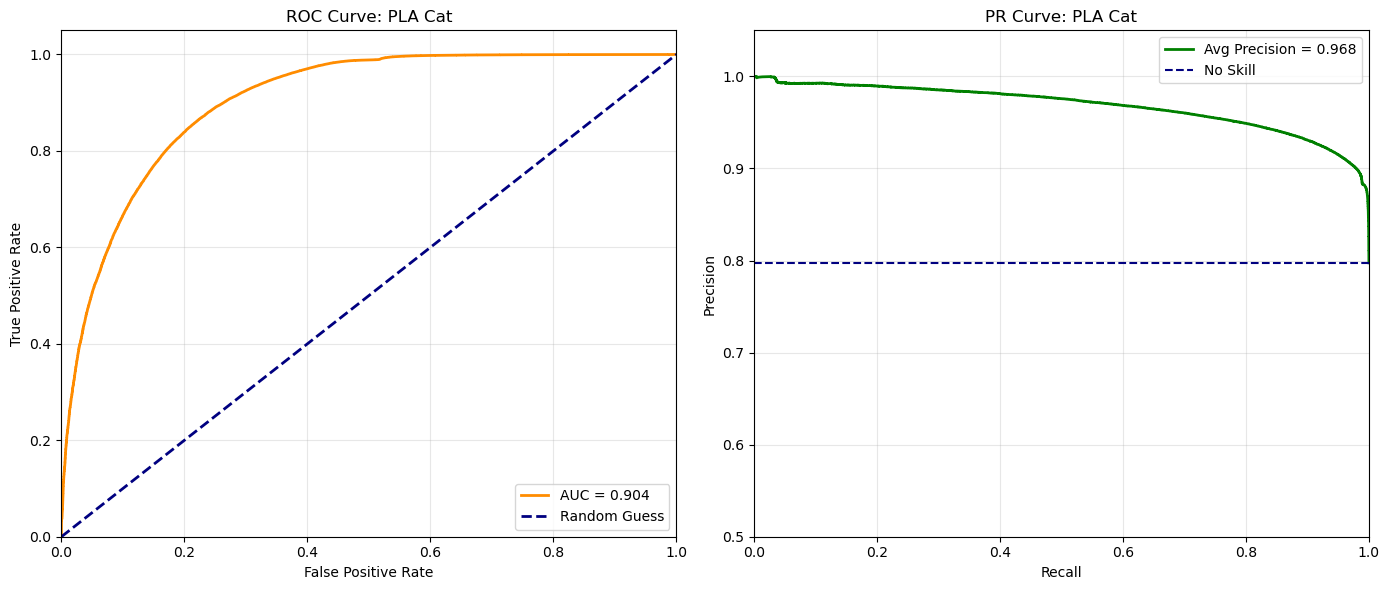

--- PLA Full ---
Train Accuracy: 0.8001 | Train AUC: 0.8764
Test  Accuracy: 0.8310 | Test  AUC: 0.8764
✅ Model seems balanced
------------------------------


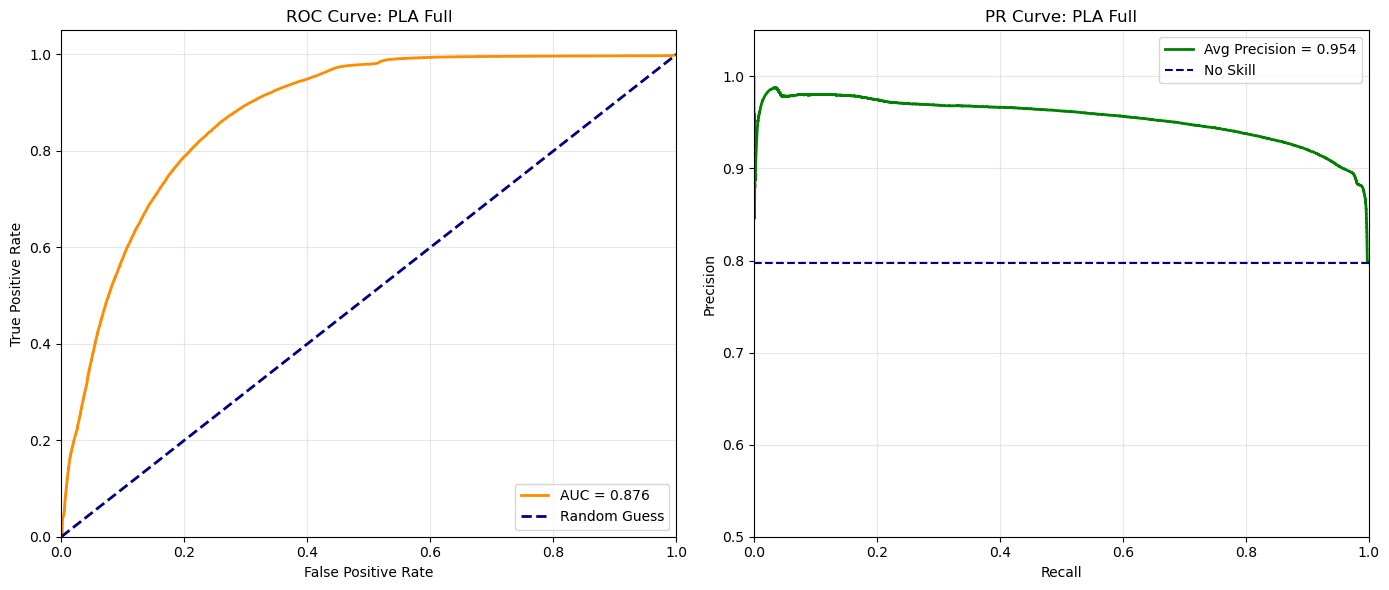

In [106]:
from sklearn.linear_model import Perceptron

results = []

pla_cat = Perceptron(max_iter=1000, random_state=SEED)
results.append(
    evaluate_and_graph(pla_cat, X_train_cat, y_train, X_test_cat, y_test, "PLA Cat", True)
)

pla_full = Perceptron(max_iter=1000, random_state=SEED)
results.append(
    evaluate_and_graph(pla_full, X_train_full, y_train, X_test_full, y_test, "PLA Full", True)
)

# Logistic Regression Model

~ 21.8 seconds

--- Logistic Regression Cat ---
Train Accuracy: 0.8255 | Train AUC: 0.9097
Test  Accuracy: 0.8600 | Test  AUC: 0.9111
✅ Model seems balanced
------------------------------


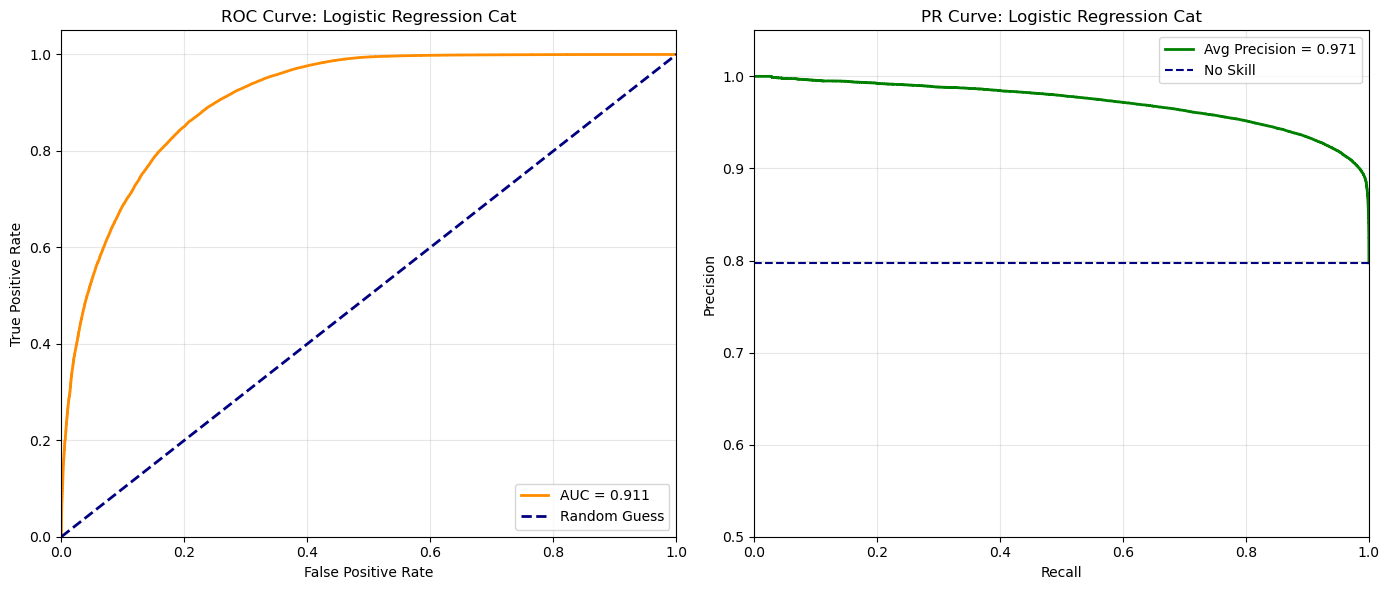

--- Logistic Regression Full ---
Train Accuracy: 0.8270 | Train AUC: 0.9106
Test  Accuracy: 0.8617 | Test  AUC: 0.9117
✅ Model seems balanced
------------------------------


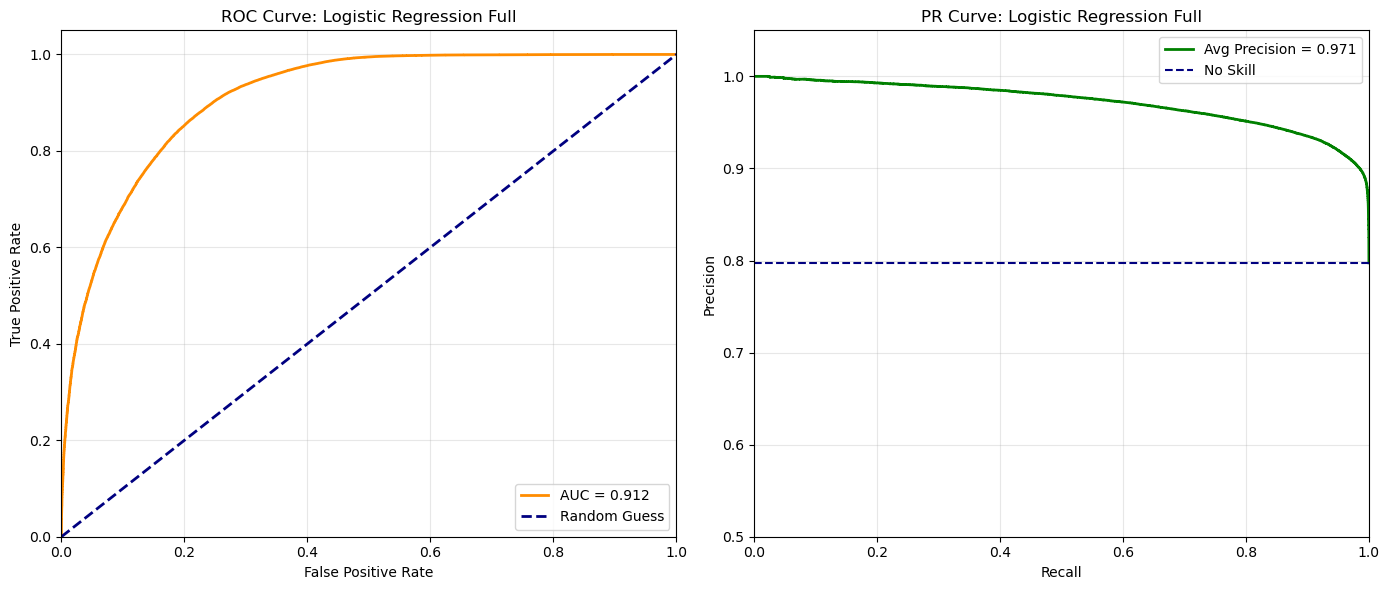

In [107]:
from sklearn.linear_model import LogisticRegression

lr_cat = LogisticRegression(max_iter=1000)
results.append(
    evaluate_and_graph(lr_cat, X_train_cat, y_train, X_test_cat, y_test, "Logistic Regression Cat", True)
)

lr_full = LogisticRegression(max_iter=1000)
results.append(
    evaluate_and_graph(lr_full, X_train_full, y_train, X_test_full, y_test, "Logistic Regression Full", True)
)

# Softmax

~ 29.7 seconds

/Users/makennaworley/miniconda3/envs/kaggle/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


--- Softmax Regression Cat ---
Train Accuracy: 0.8254 | Train AUC: 0.9097
Test  Accuracy: 0.8599 | Test  AUC: 0.9111
✅ Model seems balanced
------------------------------


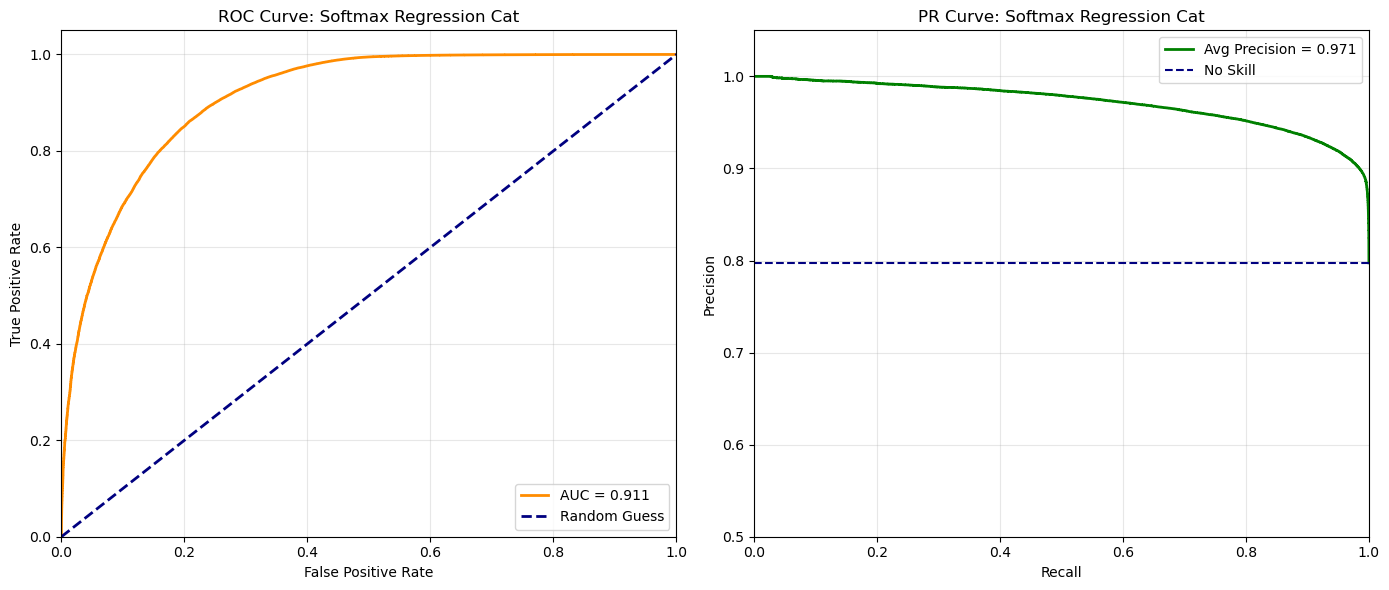

/Users/makennaworley/miniconda3/envs/kaggle/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


--- Softmax Regression Cat ---
Train Accuracy: 0.8270 | Train AUC: 0.9106
Test  Accuracy: 0.8617 | Test  AUC: 0.9117
✅ Model seems balanced
------------------------------


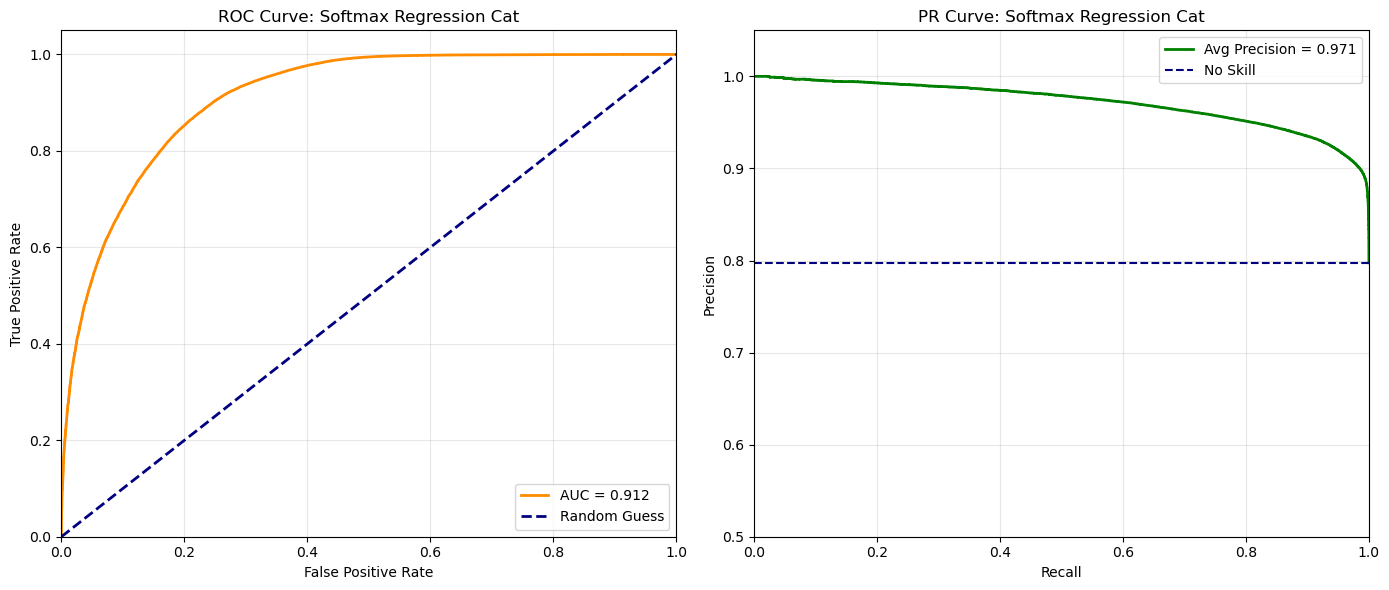

In [108]:
softmax_cat = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=SEED)
results.append(
    evaluate_and_graph(softmax_cat, X_train_cat, y_train, X_test_cat, y_test, "Softmax Regression Cat", True)
)

softmax_full = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=SEED)
results.append(
    evaluate_and_graph(softmax_full, X_train_full, y_train, X_test_full, y_test, "Softmax Regression Cat", True)
)

# LDA

~ 2.7 seconds

--- LDA Cat ---
Train Accuracy: 0.8192 | Train AUC: 0.9093
Test  Accuracy: 0.8809 | Test  AUC: 0.9106
✅ Model seems balanced
------------------------------


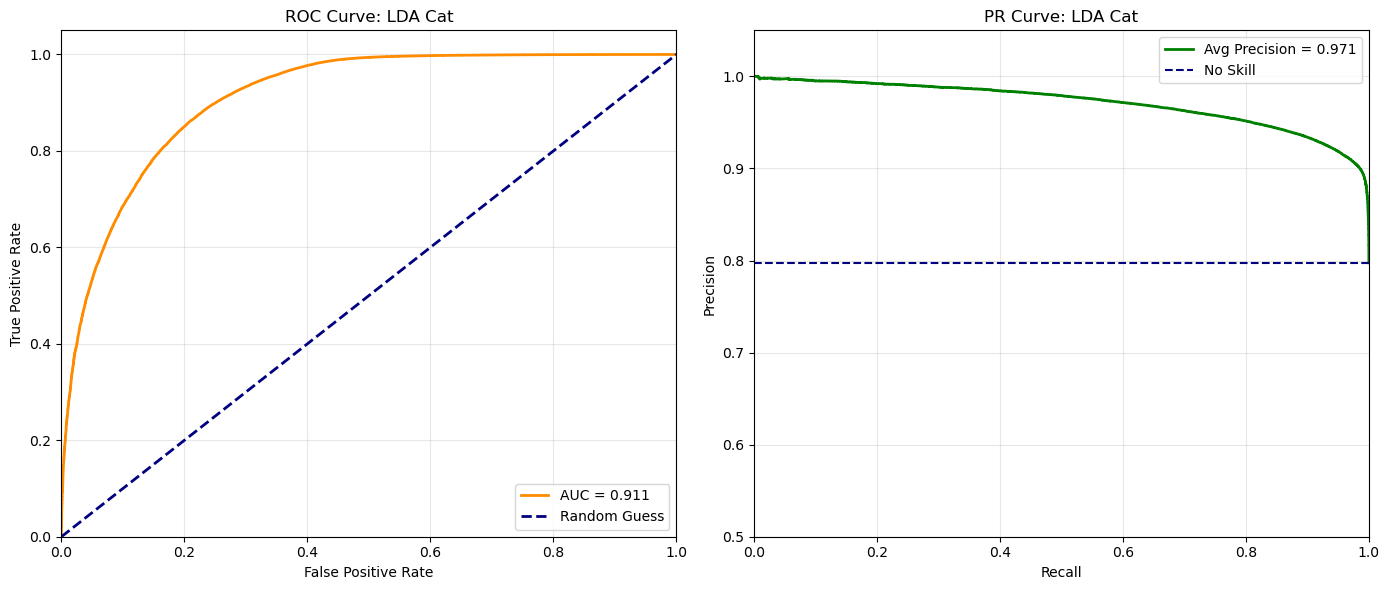

--- LDA Full ---
Train Accuracy: 0.8216 | Train AUC: 0.9101
Test  Accuracy: 0.8824 | Test  AUC: 0.9113
✅ Model seems balanced
------------------------------


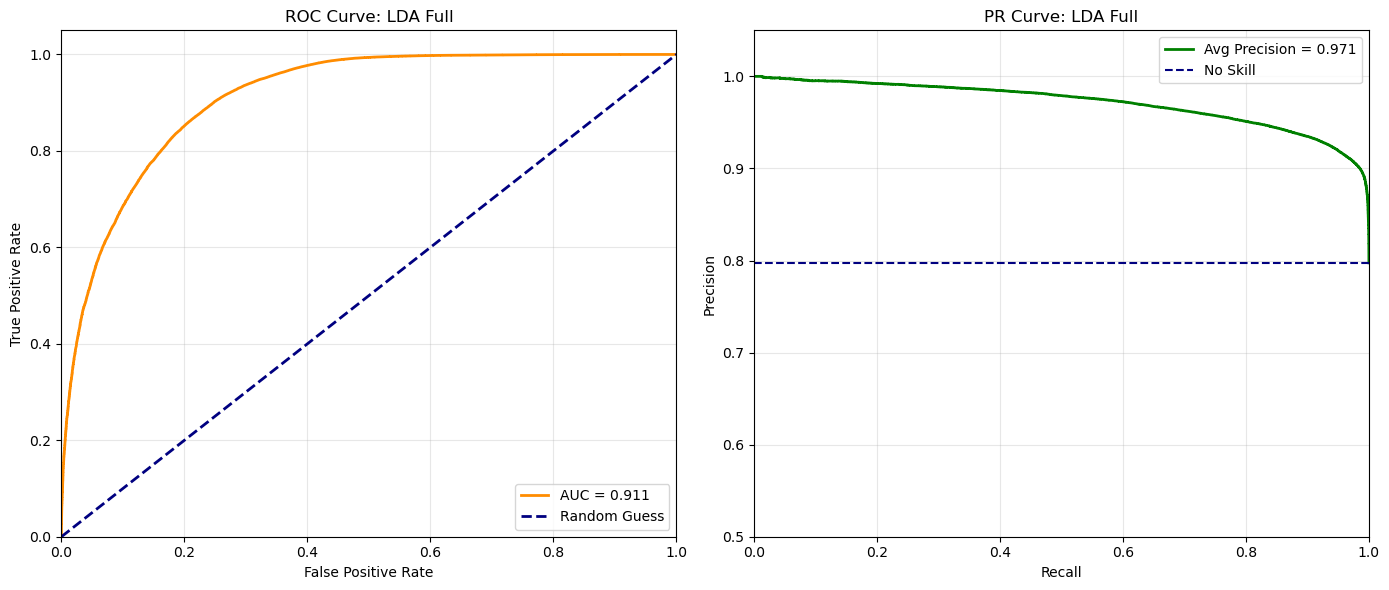

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_cat = LinearDiscriminantAnalysis()
results.append(
    evaluate_and_graph(lda_cat, X_train_cat, y_train, X_test_cat, y_test, "LDA Cat", True)
)

lda_full = LinearDiscriminantAnalysis()
results.append(
    evaluate_and_graph(lda_full, X_train_full, y_train, X_test_full, y_test, "LDA Full", True)
)

# QDA

~ 3.2 seconds

--- QDA Cat ---
Train Accuracy: 0.8078 | Train AUC: 0.8765
Test  Accuracy: 0.8592 | Test  AUC: 0.8774
✅ Model seems balanced
------------------------------


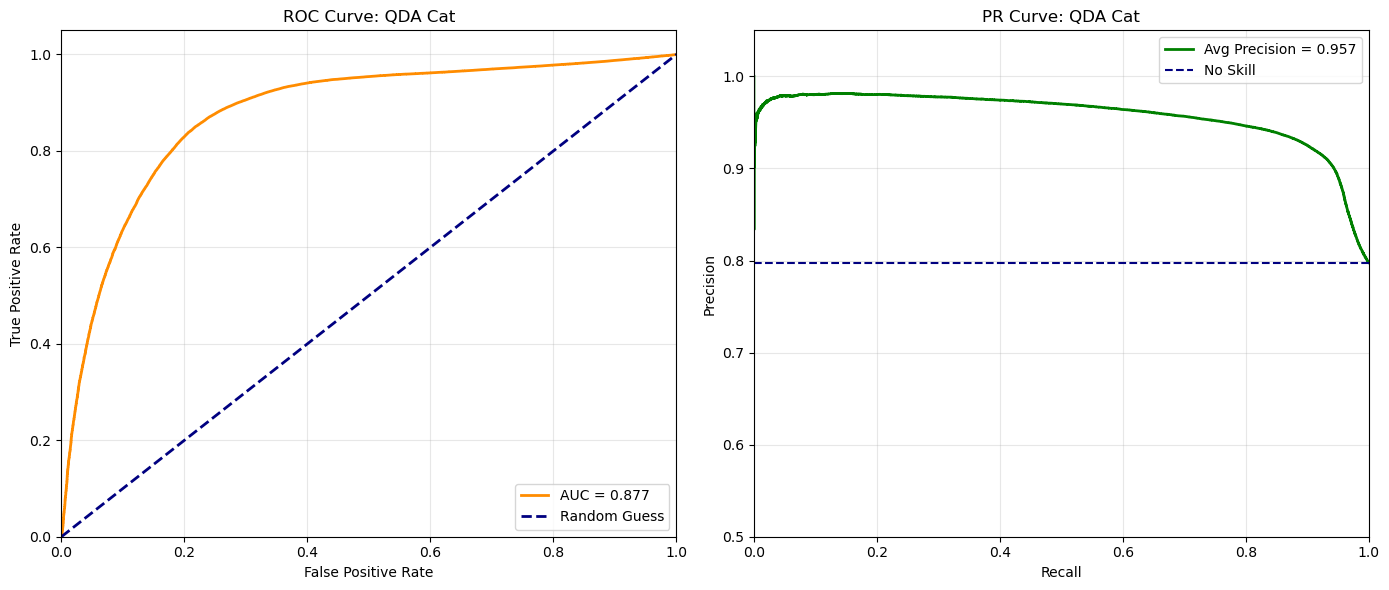

--- QDA Full ---
Train Accuracy: 0.8112 | Train AUC: 0.8799
Test  Accuracy: 0.8584 | Test  AUC: 0.8808
✅ Model seems balanced
------------------------------


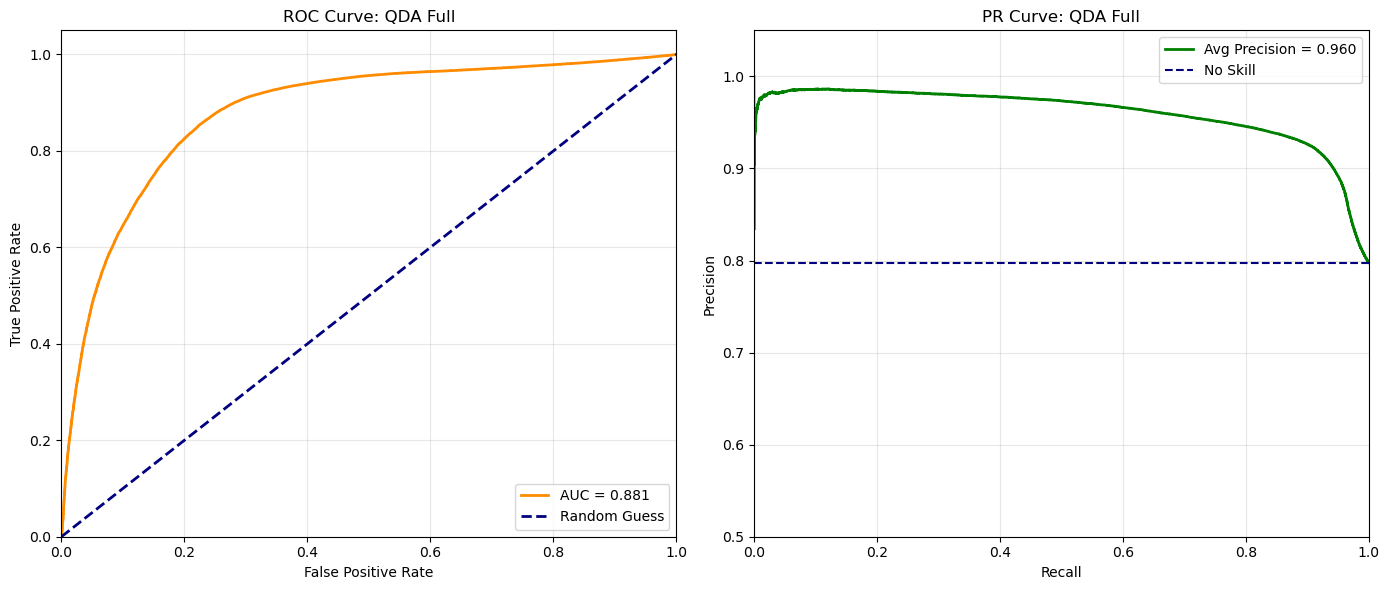

In [110]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_cat = QuadraticDiscriminantAnalysis(reg_param=0.1)
results.append(
    evaluate_and_graph(qda_cat, X_train_cat, y_train, X_test_cat, y_test, "QDA Cat", True)
)

qda_full = QuadraticDiscriminantAnalysis(reg_param=0.1)
results.append(
    evaluate_and_graph(qda_full, X_train_full, y_train, X_test_full, y_test, "QDA Full", True)
)

# Naive Bayes (Gaussian and Bernoulli)

~ 3.8 seconds

--- Naive Bayes (Gaussian) Cat ---
Train Accuracy: 0.8050 | Train AUC: 0.8724
Test  Accuracy: 0.8271 | Test  AUC: 0.8715
✅ Model seems balanced
------------------------------


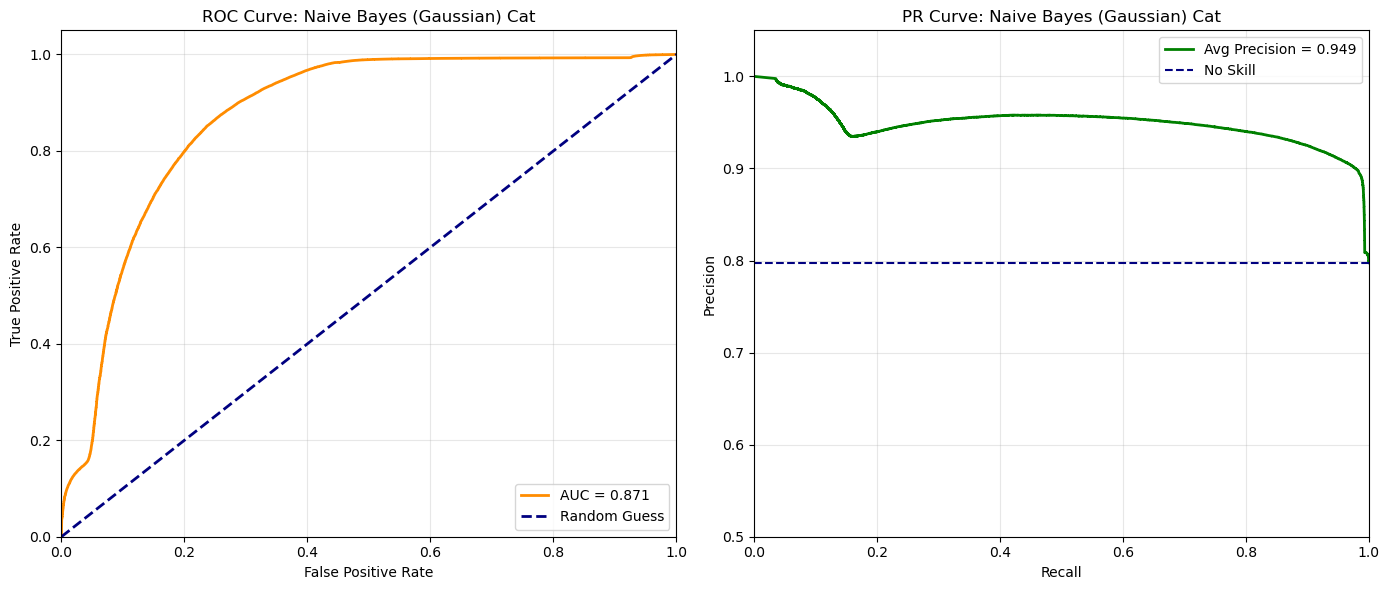

--- Naive Bayes (Gaussian) Full ---
Train Accuracy: 0.7561 | Train AUC: 0.8672
Test  Accuracy: 0.6845 | Test  AUC: 0.8678
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


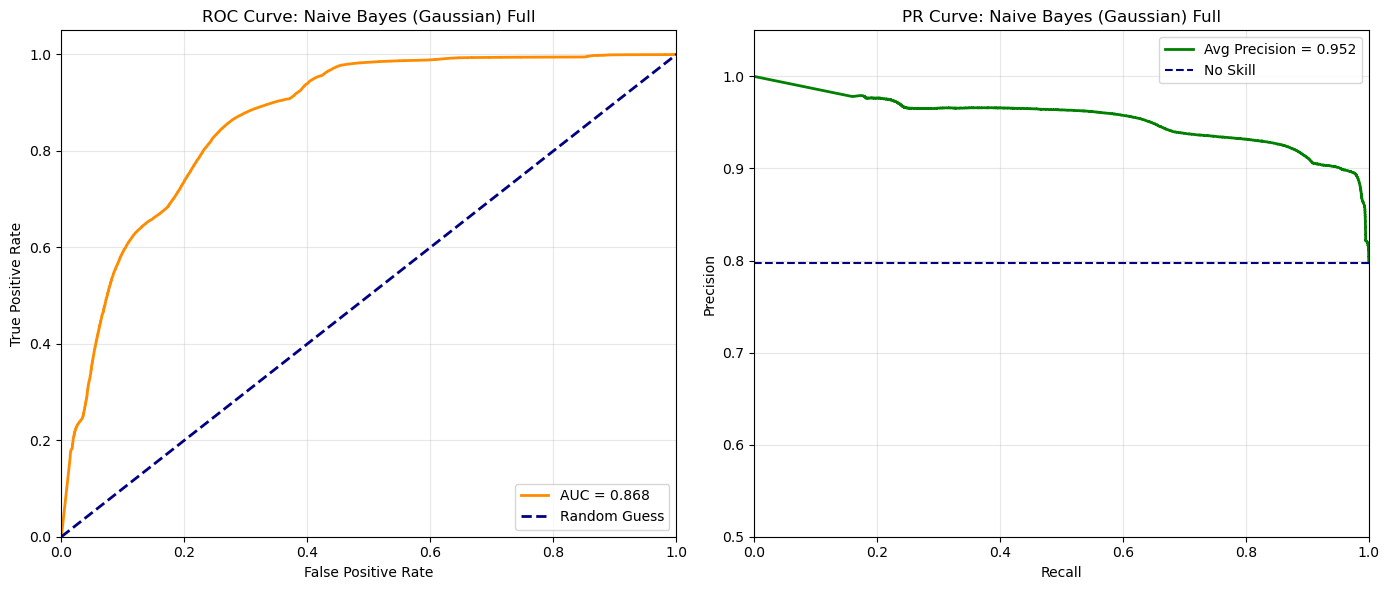

--- Naive Bayes (Bernoulli) Cat ---
Train Accuracy: 0.8129 | Train AUC: 0.8901
Test  Accuracy: 0.8616 | Test  AUC: 0.8907
✅ Model seems balanced
------------------------------


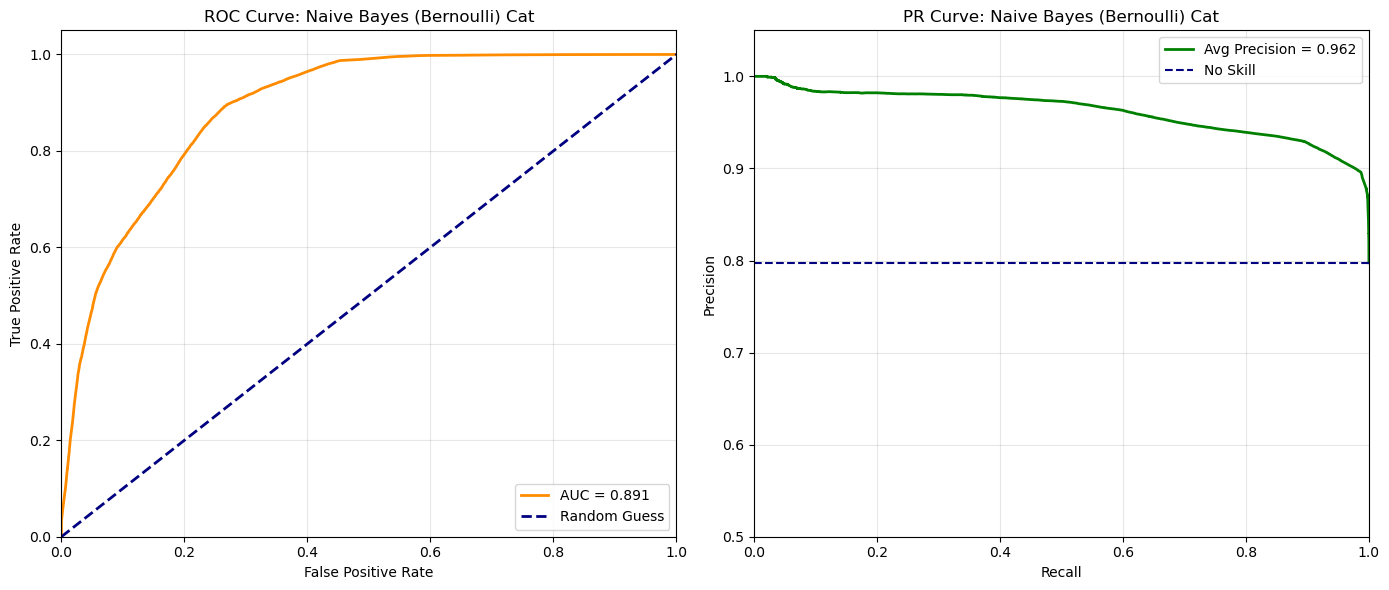

--- Naive Bayes (Bernoulli) Full ---
Train Accuracy: 0.7791 | Train AUC: 0.8879
Test  Accuracy: 0.7654 | Test  AUC: 0.8885
✅ Model seems balanced
------------------------------


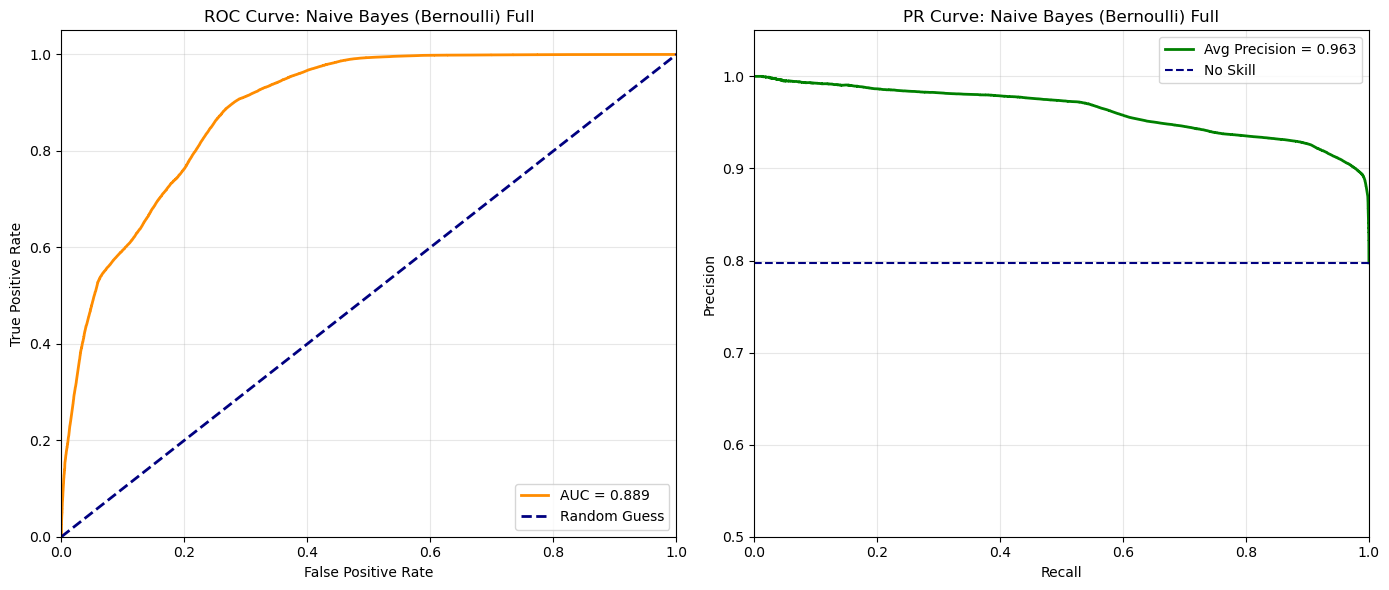

In [111]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

gnb_cat = GaussianNB()
results.append(
    evaluate_and_graph(gnb_cat, X_train_cat, y_train, X_test_cat, y_test, "Naive Bayes (Gaussian) Cat", True)
)

gnb_full = GaussianNB()
results.append(
    evaluate_and_graph(gnb_full, X_train_full, y_train, X_test_full, y_test, "Naive Bayes (Gaussian) Full", True)
)

# ---

bnb_cat = BernoulliNB()
results.append(
    evaluate_and_graph(bnb_cat, X_train_cat, y_train, X_test_cat, y_test, "Naive Bayes (Bernoulli) Cat", True)
)

bnb_full = BernoulliNB()
results.append(
    evaluate_and_graph(bnb_full, X_train_full, y_train, X_test_full, y_test, "Naive Bayes (Bernoulli) Full", True)
)

# SVM (Linear, Polynomial, and RBF)

~ 4 minutes 3.1 seconds

SVM can take a long time O(n^3) so I made mini datasets to train on

In [112]:
from sklearn.model_selection import train_test_split

X_train_mini_cat, _, y_train_mini_cat, _ = train_test_split(
    X_train_cat,
    y_train,
    train_size=10_000,
    stratify=y_train,
    random_state=SEED
)

X_test_mini_cat, _, y_test_mini_cat, _ = train_test_split(
    X_test_cat,
    y_test,
    train_size=10_000,
    stratify=y_test,
    random_state=SEED
)

X_train_mini_full, _, y_train_mini_full, _ = train_test_split(
    X_train_full,
    y_train,
    train_size=10_000,
    stratify=y_train,
    random_state=SEED
)

X_test_mini_full, _, y_test_mini_full, _ = train_test_split(
    X_test_full,
    y_test,
    train_size=10_000,
    stratify=y_test,
    random_state=SEED
)

print(X_train_mini_cat.shape, y_train_mini_cat.shape)
print(X_test_mini_cat.shape, y_test_mini_cat.shape)
print(X_train_mini_full.shape, y_train_mini_full.shape)
print(X_test_mini_full.shape, y_test_mini_full.shape)

(10000, 29) (10000,)
(10000, 29) (10000,)
(10000, 58) (10000,)
(10000, 58) (10000,)


--- SVM (Linear) Cat ---
Train Accuracy: 0.8318 | Train AUC: 0.9103
Test  Accuracy: 0.8626 | Test  AUC: 0.9034
✅ Model seems balanced
------------------------------


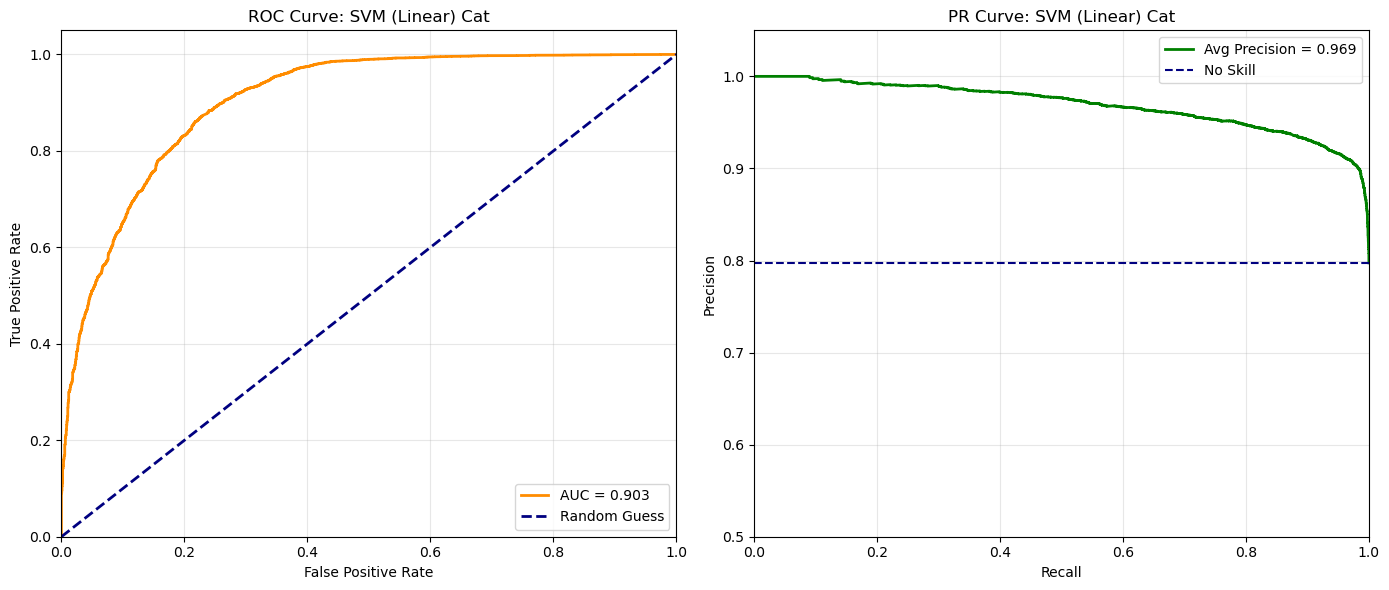

--- SVM (Linear) Full ---
Train Accuracy: 0.8328 | Train AUC: 0.9127
Test  Accuracy: 0.8606 | Test  AUC: 0.9032
✅ Model seems balanced
------------------------------


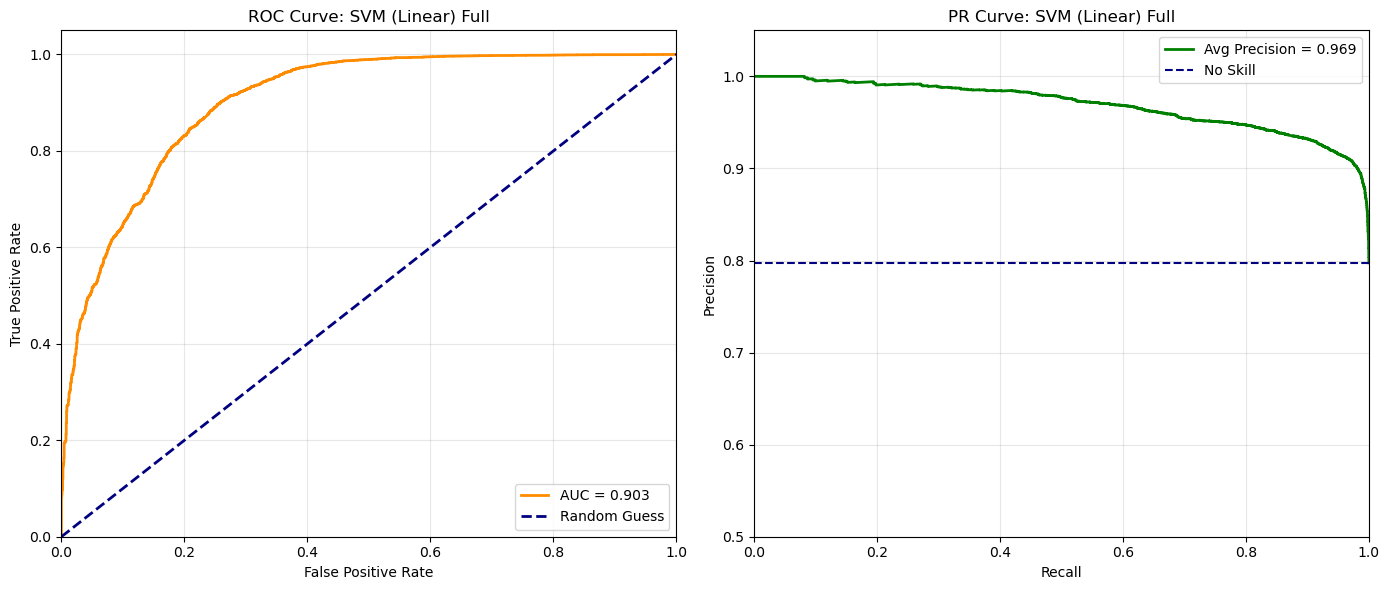

--- SVM (Polynomial) Cat ---
Train Accuracy: 0.5136 | Train AUC: 0.5161
Test  Accuracy: 0.7997 | Test  AUC: 0.5133
✅ Model seems balanced
------------------------------


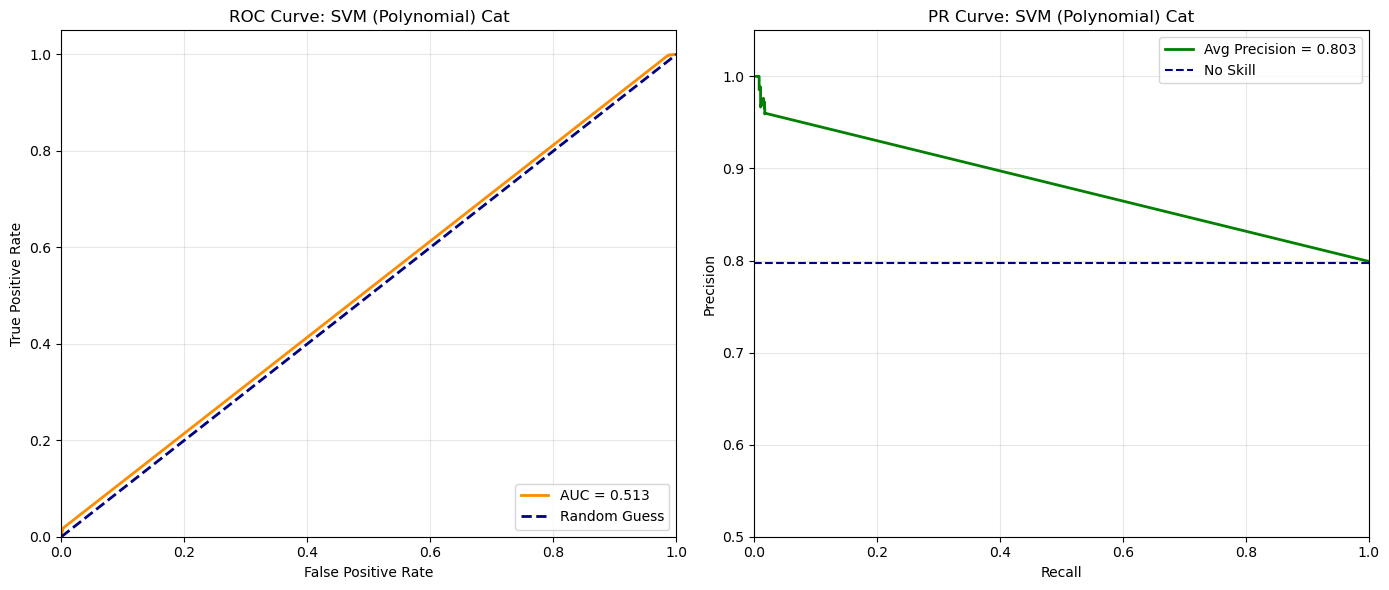

--- SVM (Polynomial) Full ---
Train Accuracy: 0.5139 | Train AUC: 0.5165
Test  Accuracy: 0.7991 | Test  AUC: 0.5128
✅ Model seems balanced
------------------------------


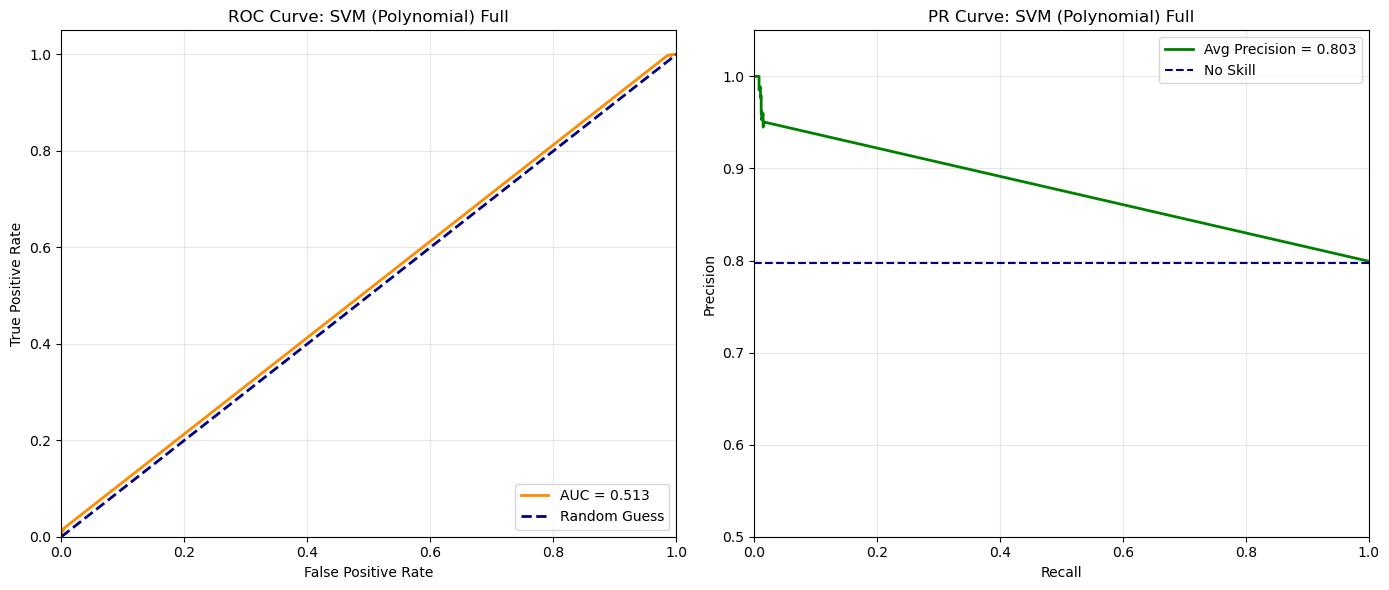

--- SVM (RBF) Cat ---
Train Accuracy: 0.8163 | Train AUC: 0.8992
Test  Accuracy: 0.8501 | Test  AUC: 0.8915
✅ Model seems balanced
------------------------------


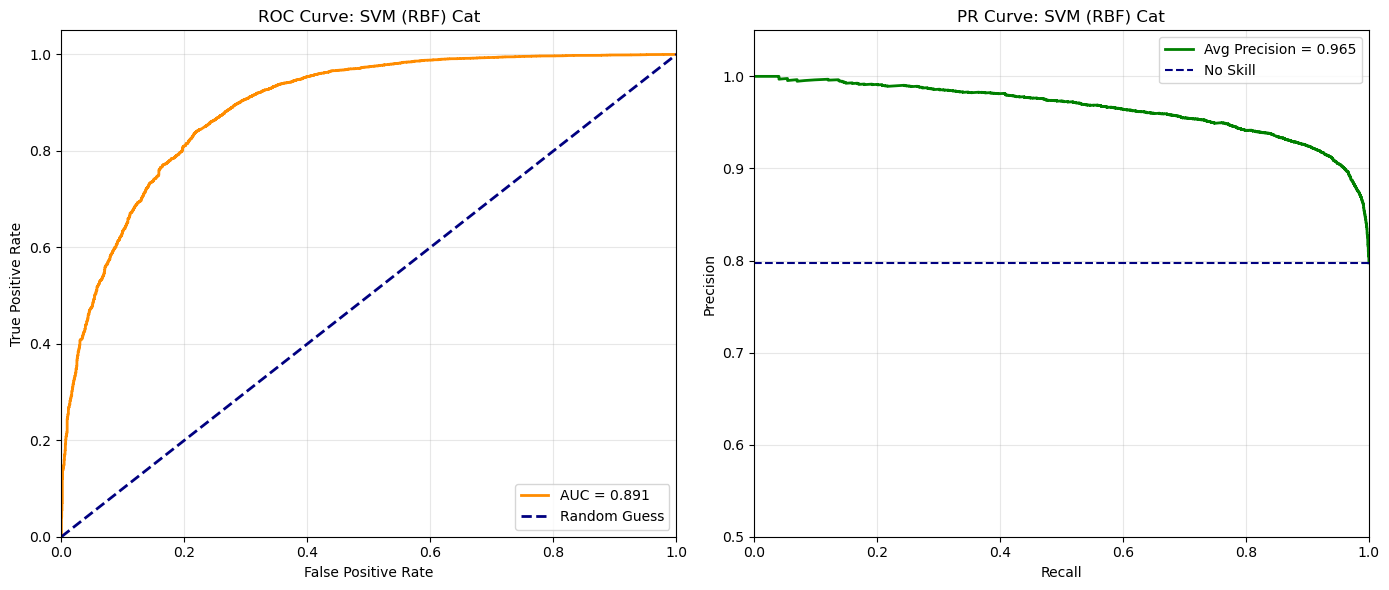

--- SVM (RBF) Full ---
Train Accuracy: 0.8182 | Train AUC: 0.9001
Test  Accuracy: 0.8510 | Test  AUC: 0.8915
✅ Model seems balanced
------------------------------


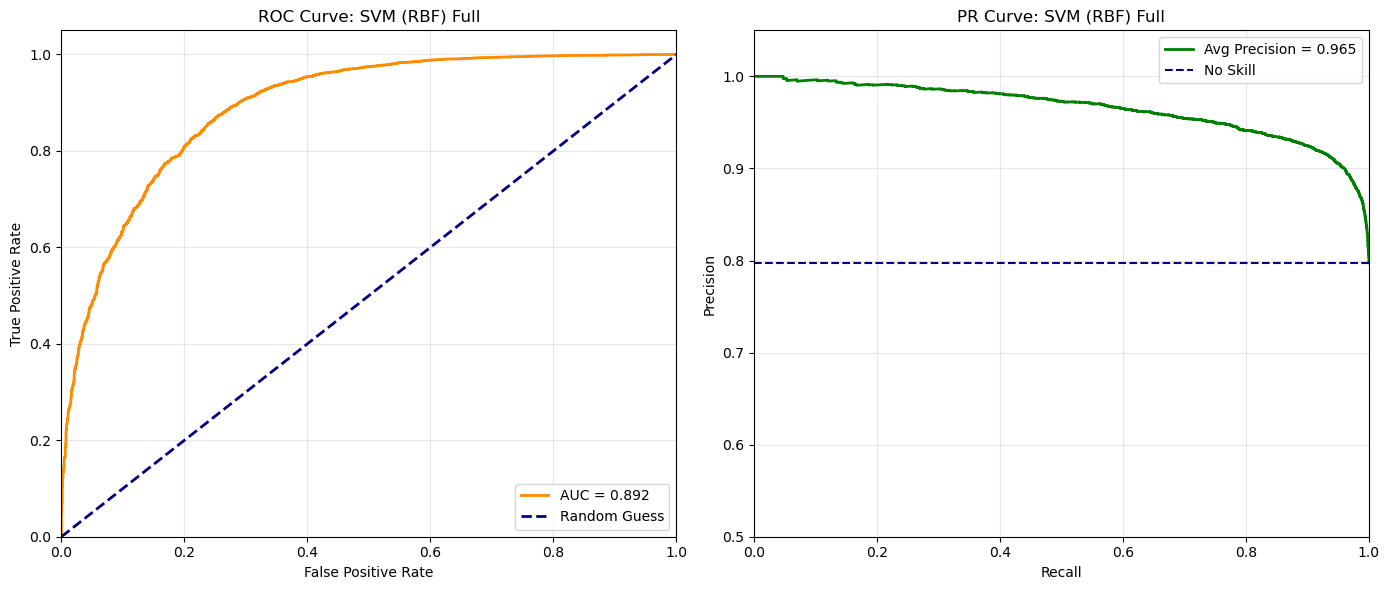

In [113]:
from sklearn.svm import SVC

svm_linear_cat = SVC(kernel='linear', probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_linear_cat, X_train_mini_cat, y_train_mini_cat, X_test_mini_cat, y_test_mini_cat, "SVM (Linear) Cat", True)
)

svm_linear_full = SVC(kernel='linear', probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_linear_full, X_train_mini_full, y_train_mini_full, X_test_mini_full, y_test_mini_full, "SVM (Linear) Full", True)
)

#---

svm_poly_cat = SVC(kernel='poly', degree=3, probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_poly_cat, X_train_mini_cat, y_train_mini_cat, X_test_mini_cat, y_test_mini_cat, "SVM (Polynomial) Cat", True)
)

svm_poly_full = SVC(kernel='poly', degree=3, probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_poly_full, X_train_mini_full, y_train_mini_full, X_test_mini_full, y_test_mini_full, "SVM (Polynomial) Full", True)
)

# ---

svm_rbf_cat = SVC(kernel='rbf', probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_rbf_cat, X_train_mini_cat, y_train_mini_cat, X_test_mini_cat, y_test_mini_cat, "SVM (RBF) Cat", True)
)

svm_rbf_full = SVC(kernel='rbf', probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_rbf_full, X_train_mini_full, y_train_mini_full, X_test_mini_full, y_test_mini_full, "SVM (RBF) Full", True)
)

# Decision Trees (Gini and Entropy)

~ 20.4 seconds

--- Decision Tree (Gini) Cat ---
Train Accuracy: 0.8353 | Train AUC: 0.9173
Test  Accuracy: 0.8625 | Test  AUC: 0.9104
✅ Model seems balanced
------------------------------


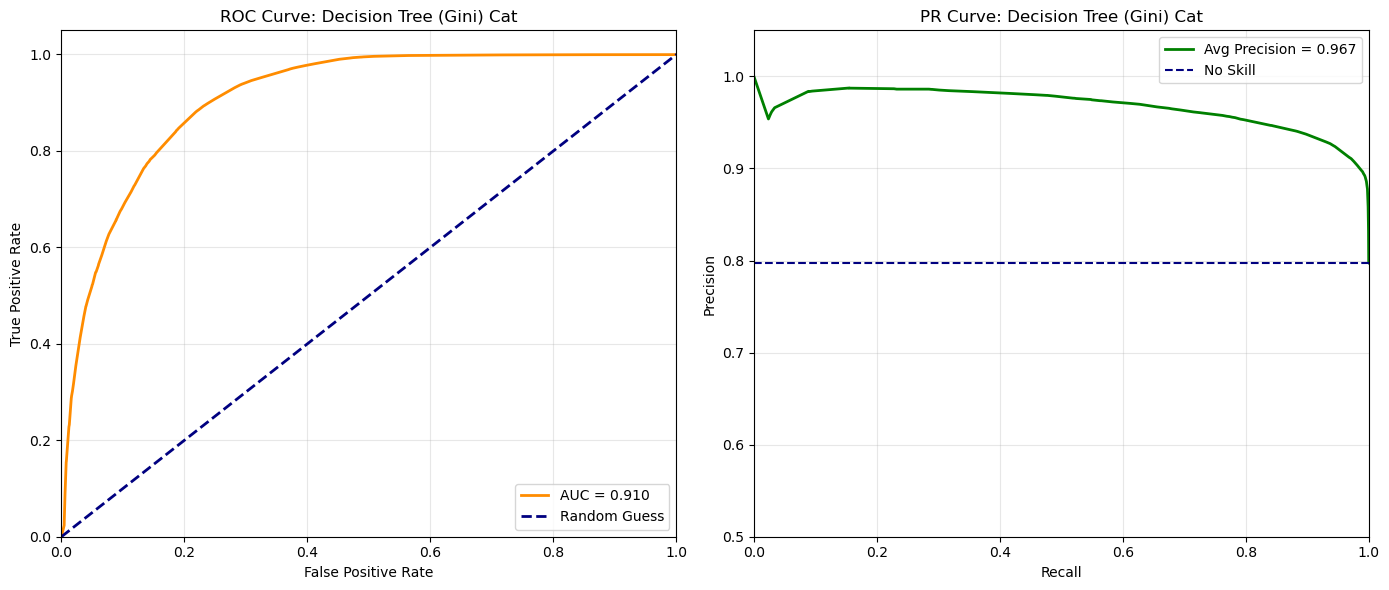

--- Decision Tree (Gini) Full ---
Train Accuracy: 0.8353 | Train AUC: 0.9173
Test  Accuracy: 0.8626 | Test  AUC: 0.9104
✅ Model seems balanced
------------------------------


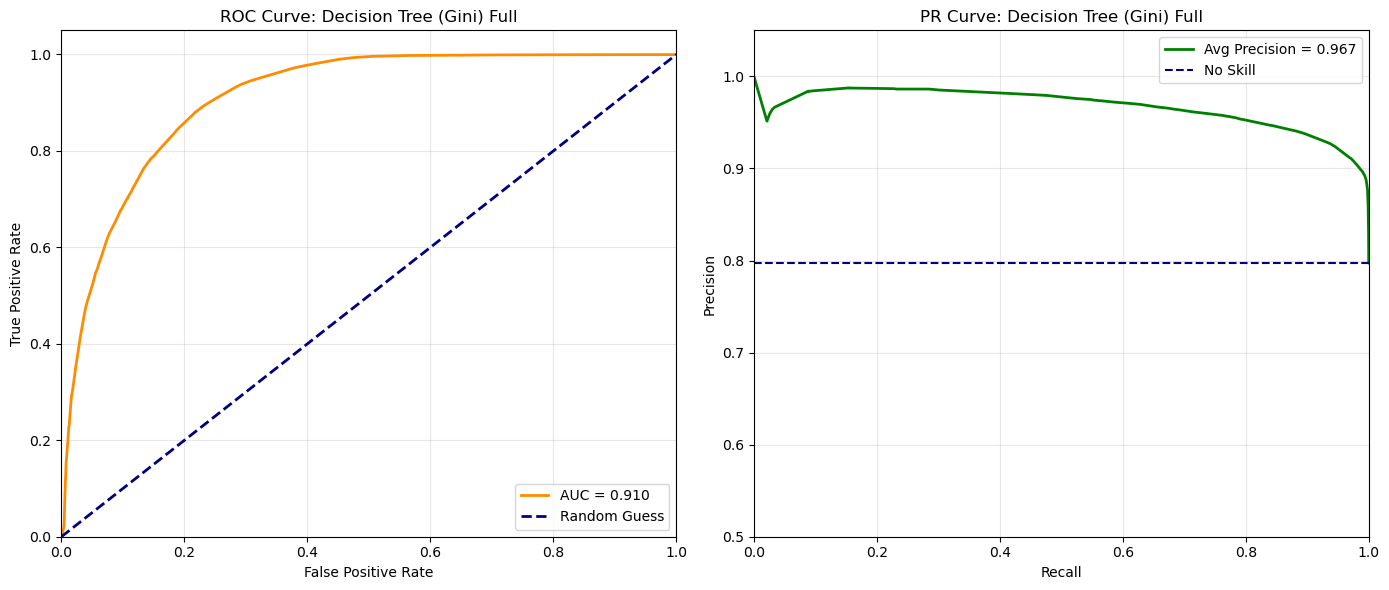

--- Decision Tree (Entropy) Cat ---
Train Accuracy: 0.8346 | Train AUC: 0.9169
Test  Accuracy: 0.8630 | Test  AUC: 0.9117
✅ Model seems balanced
------------------------------


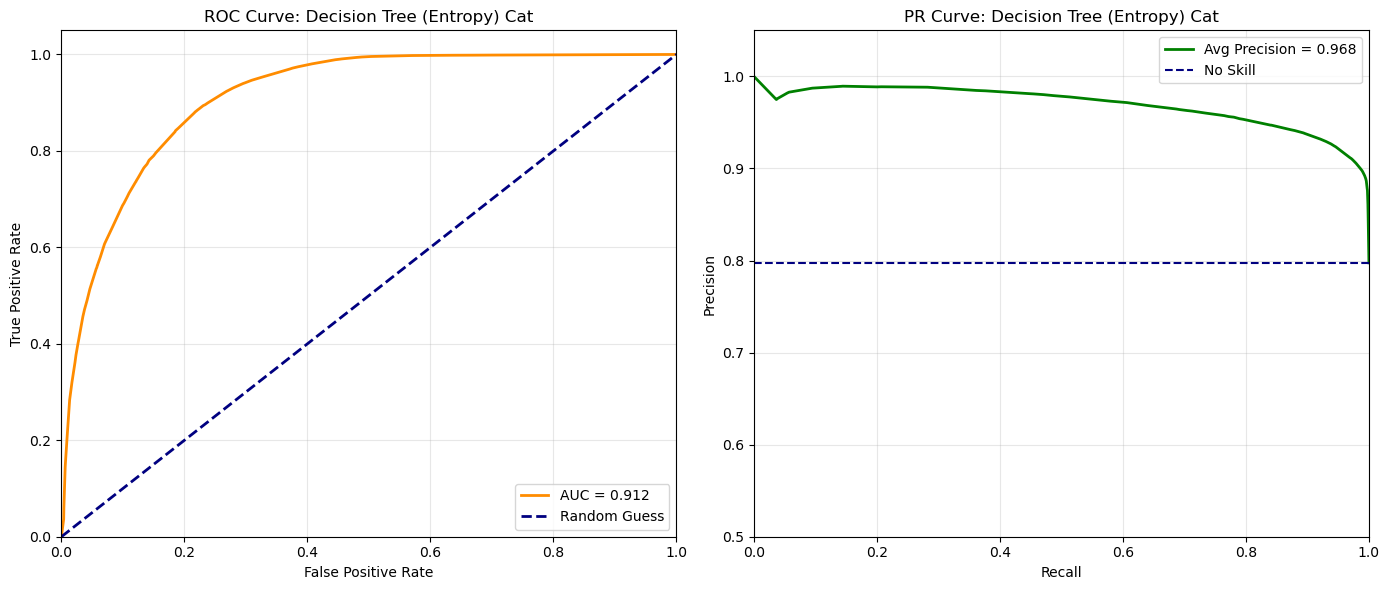

--- Decision Tree (Entropy) Full ---
Train Accuracy: 0.8347 | Train AUC: 0.9170
Test  Accuracy: 0.8631 | Test  AUC: 0.9116
✅ Model seems balanced
------------------------------


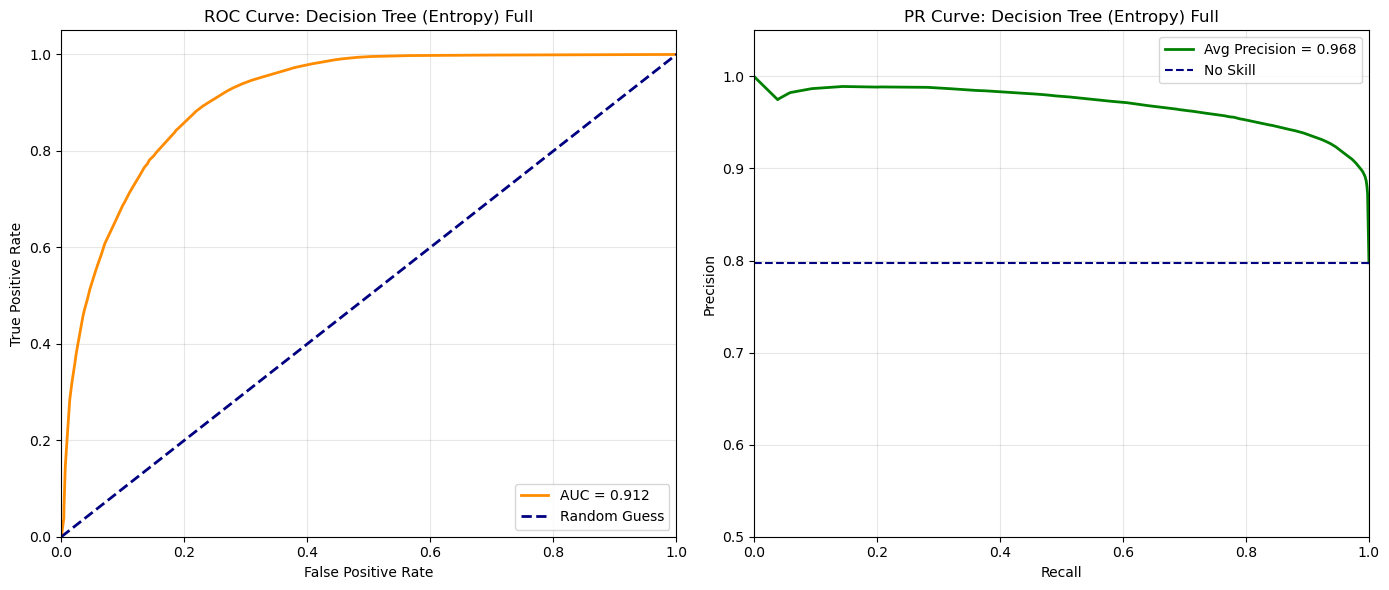

In [114]:
from sklearn.tree import DecisionTreeClassifier

dt_gini_cat = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(dt_gini_cat, X_train_cat, y_train, X_test_cat, y_test, "Decision Tree (Gini) Cat", True)
)

dt_gini_full = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(dt_gini_full, X_train_full, y_train, X_test_full, y_test, "Decision Tree (Gini) Full", True)
)

# ---

dt_entropy_cat = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(dt_entropy_cat, X_train_cat, y_train, X_test_cat, y_test, "Decision Tree (Entropy) Cat", True)
)

dt_entropy_full = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(dt_entropy_full, X_train_full, y_train, X_test_full, y_test, "Decision Tree (Entropy) Full", True)
)

# Bagging

~ 9 minutes 49.2 seconds

--- Bagging (Trees) Cat ---
Train Accuracy: 0.9999 | Train AUC: 1.0000
Test  Accuracy: 0.8960 | Test  AUC: 0.9026
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


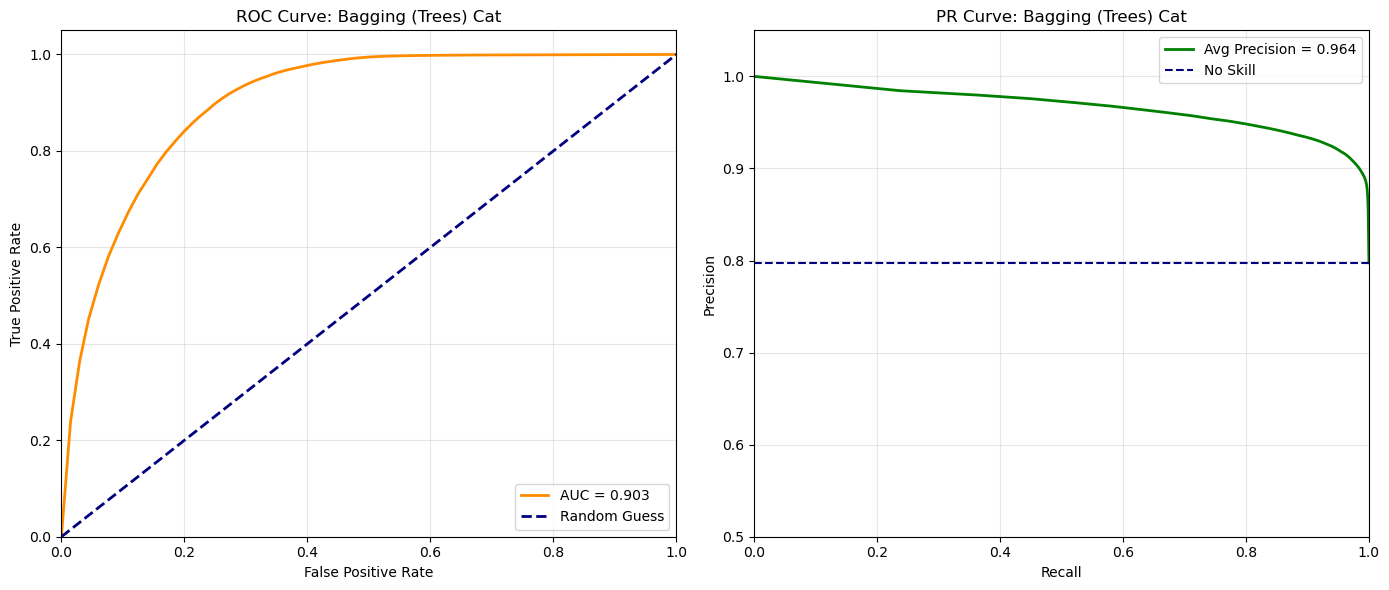

--- Bagging (Trees) Full ---
Train Accuracy: 0.9999 | Train AUC: 1.0000
Test  Accuracy: 0.8965 | Test  AUC: 0.9040
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


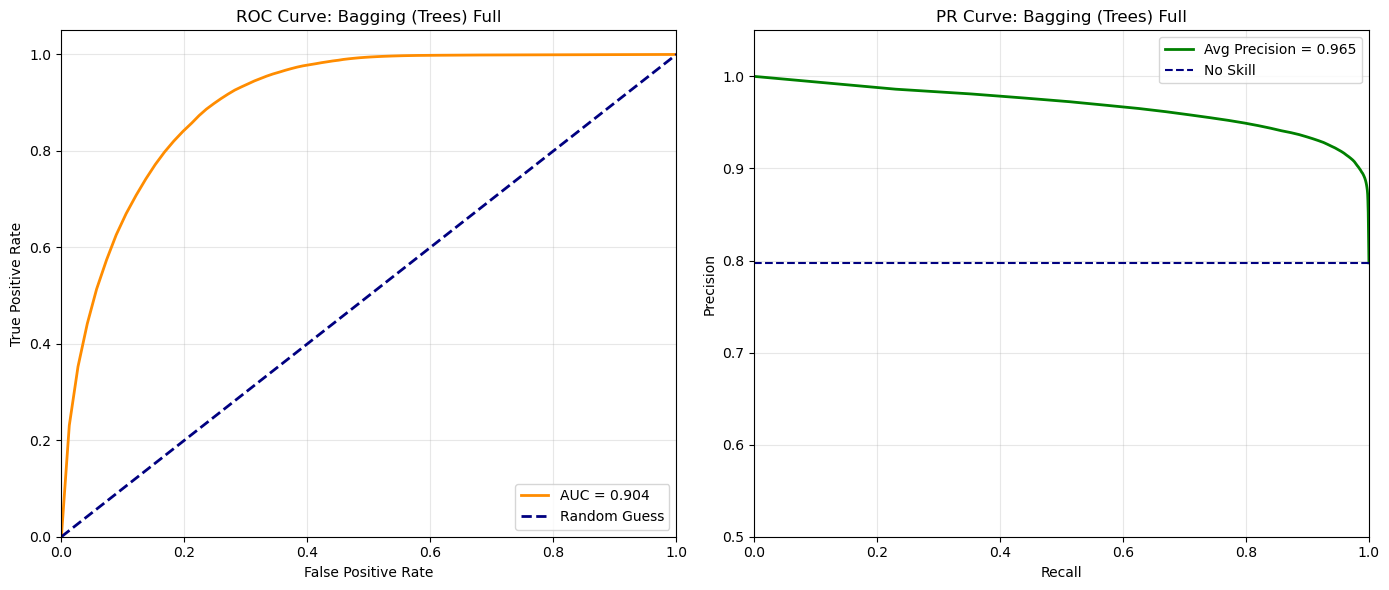

In [115]:
from sklearn.ensemble import BaggingClassifier

bagging_cat = BaggingClassifier(n_estimators=50, random_state=SEED)
results.append(
    evaluate_and_graph(bagging_cat, X_train_cat, y_train, X_test_cat, y_test, "Bagging (Trees) Cat", True)
)

bagging_full = BaggingClassifier(n_estimators=50, random_state=SEED)
results.append(
    evaluate_and_graph(bagging_full, X_train_full, y_train, X_test_full, y_test, "Bagging (Trees) Full", True)
)

# Random Forest Classifier Model

~ 1 minute and 41.5 seconds

--- Random Forest Cat ---
Train Accuracy: 0.8319 | Train AUC: 0.9154
Test  Accuracy: 0.8624 | Test  AUC: 0.9124
✅ Model seems balanced
------------------------------


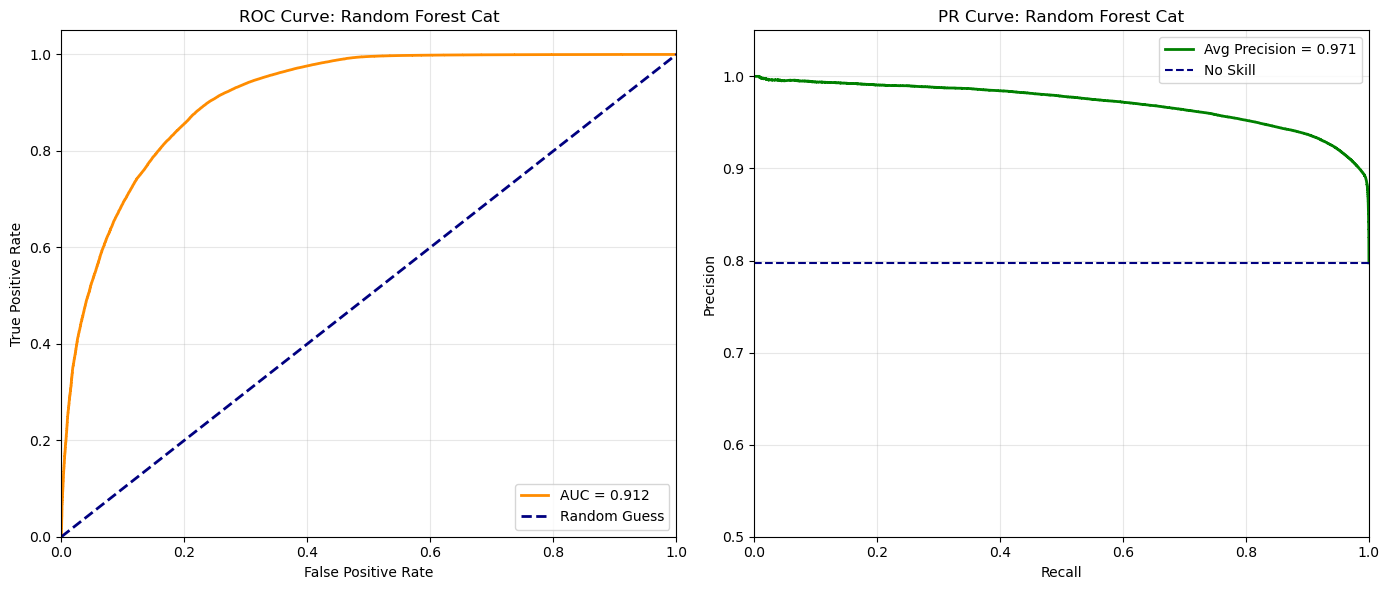

--- Random Forest Full ---
Train Accuracy: 0.8314 | Train AUC: 0.9139
Test  Accuracy: 0.8621 | Test  AUC: 0.9112
✅ Model seems balanced
------------------------------


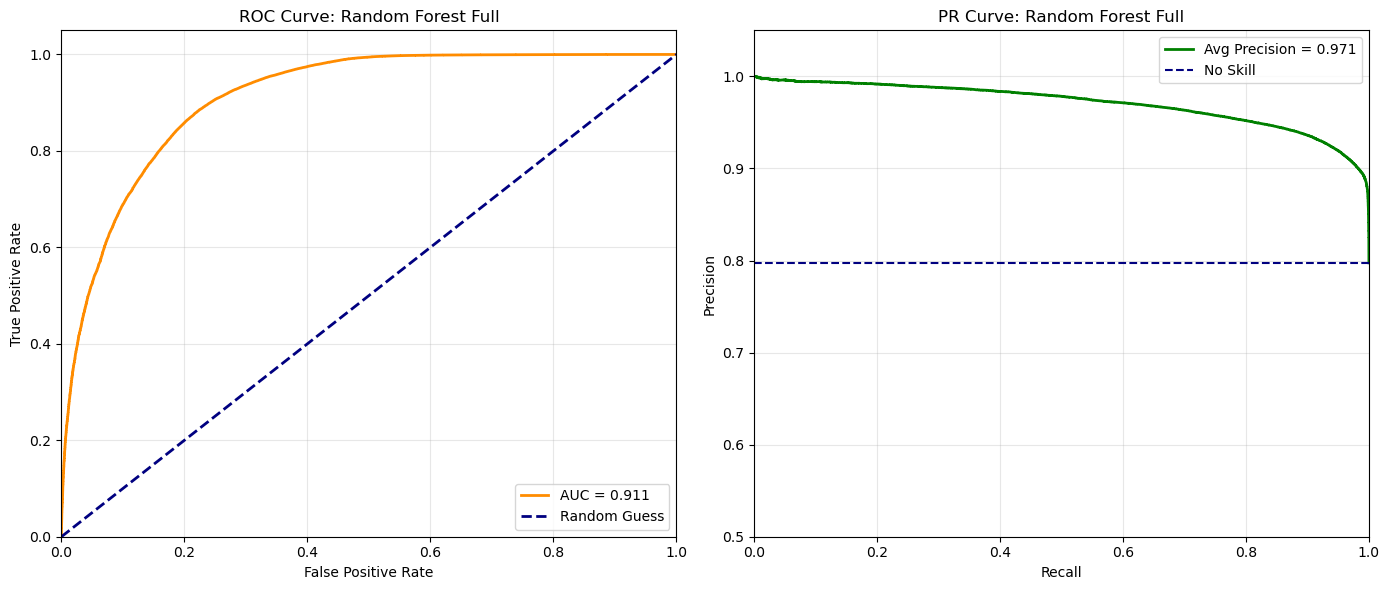

In [116]:
from sklearn.ensemble import RandomForestClassifier

rf_cat = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(rf_cat, X_train_cat, y_train, X_test_cat, y_test, "Random Forest Cat", True)
)

rf_full = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(rf_full, X_train_full, y_train, X_test_full, y_test, "Random Forest Full", True)
)

# Gradient Boosting Classifier Model

~ 4 minutes 12.7 seconds

--- Gradient Boosting Cat ---
Train Accuracy: 0.8328 | Train AUC: 0.9155
Test  Accuracy: 0.8619 | Test  AUC: 0.9164
✅ Model seems balanced
------------------------------


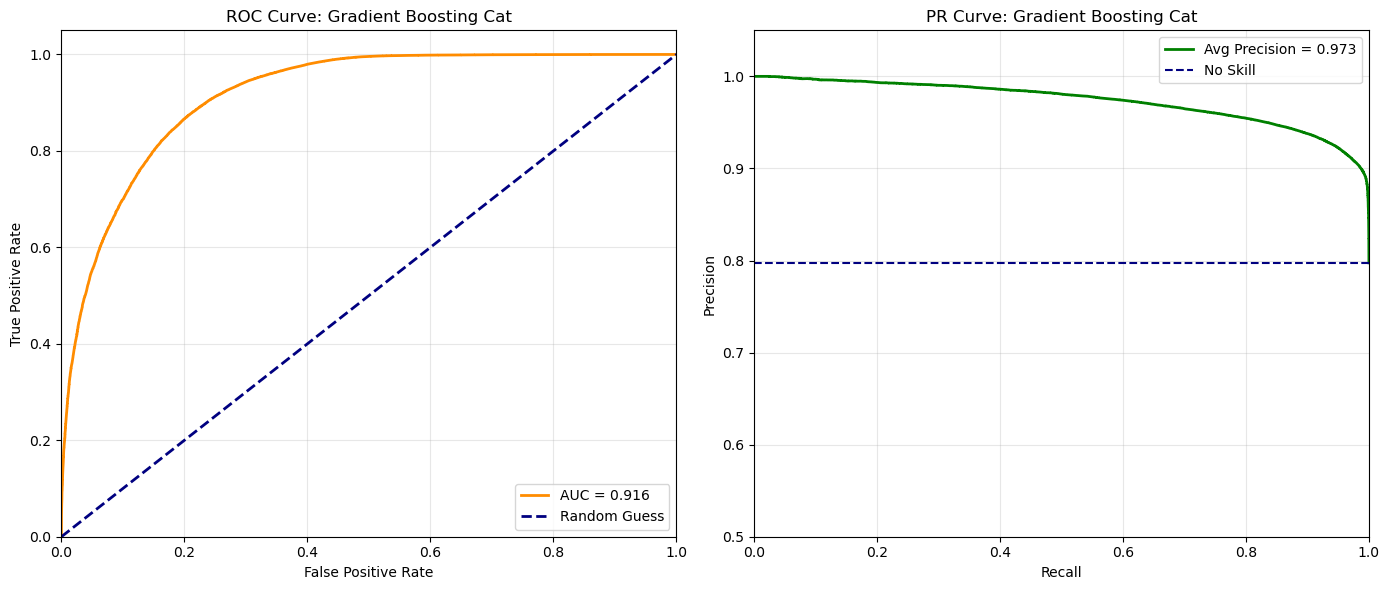

--- Gradient Boosting Full ---
Train Accuracy: 0.8329 | Train AUC: 0.9155
Test  Accuracy: 0.8625 | Test  AUC: 0.9164
✅ Model seems balanced
------------------------------


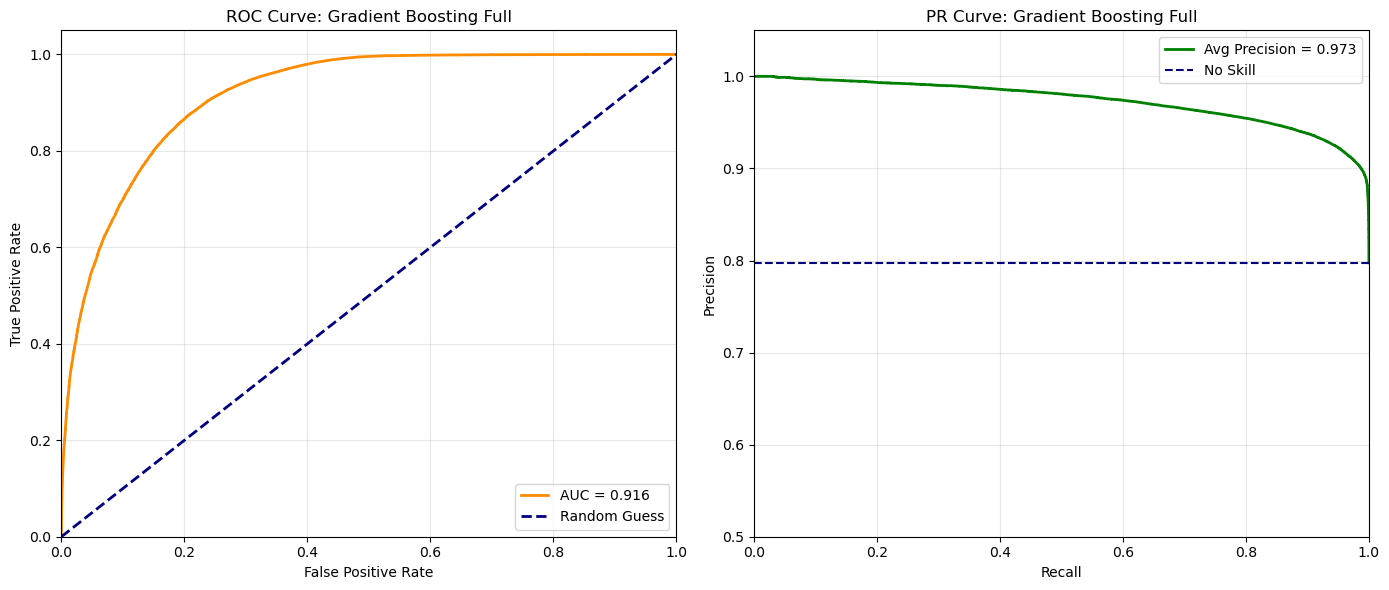

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

gb_cat = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=SEED)
results.append(
    evaluate_and_graph(gb_cat, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting Cat", True)
)

gb_full = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=SEED)
results.append(
    evaluate_and_graph(gb_full, X_train_full, y_train, X_test_full, y_test, "Gradient Boosting Full", True)
)

# PCA + LR/Random Forest/SVM

~ 2 minutes 52.1 seconds

In [118]:
from sklearn.decomposition import PCA

pca_cat = PCA(n_components=0.95, random_state=SEED)

# --- PCA on CAT features (full train/test) ---

X_train_pca_cat = pca_cat.fit_transform(X_train_cat)
X_test_pca_cat = pca_cat.transform(X_test_cat)

print(f"[CAT] Original feature count: {X_train_cat.shape[1]}")
print(f"[CAT] Reduced feature count:  {X_train_pca_cat.shape[1]}")

# --- PCA on FULL features (full train/test) ---

pca_full = PCA(n_components=0.95, random_state=SEED)

X_train_pca_full = pca_full.fit_transform(X_train_full)
X_test_pca_full = pca_full.transform(X_test_full)

print(f"[FULL] Original feature count: {X_train_full.shape[1]}")
print(f"[FULL] Reduced feature count:  {X_train_pca_full.shape[1]}")

[CAT] Original feature count: 29
[CAT] Reduced feature count:  1
[FULL] Original feature count: 58
[FULL] Reduced feature count:  1


--- PCA + Logistic Regression Cat ---
Train Accuracy: 0.5021 | Train AUC: 0.5015
Test  Accuracy: 0.4710 | Test  AUC: 0.5040
✅ Model seems balanced
------------------------------


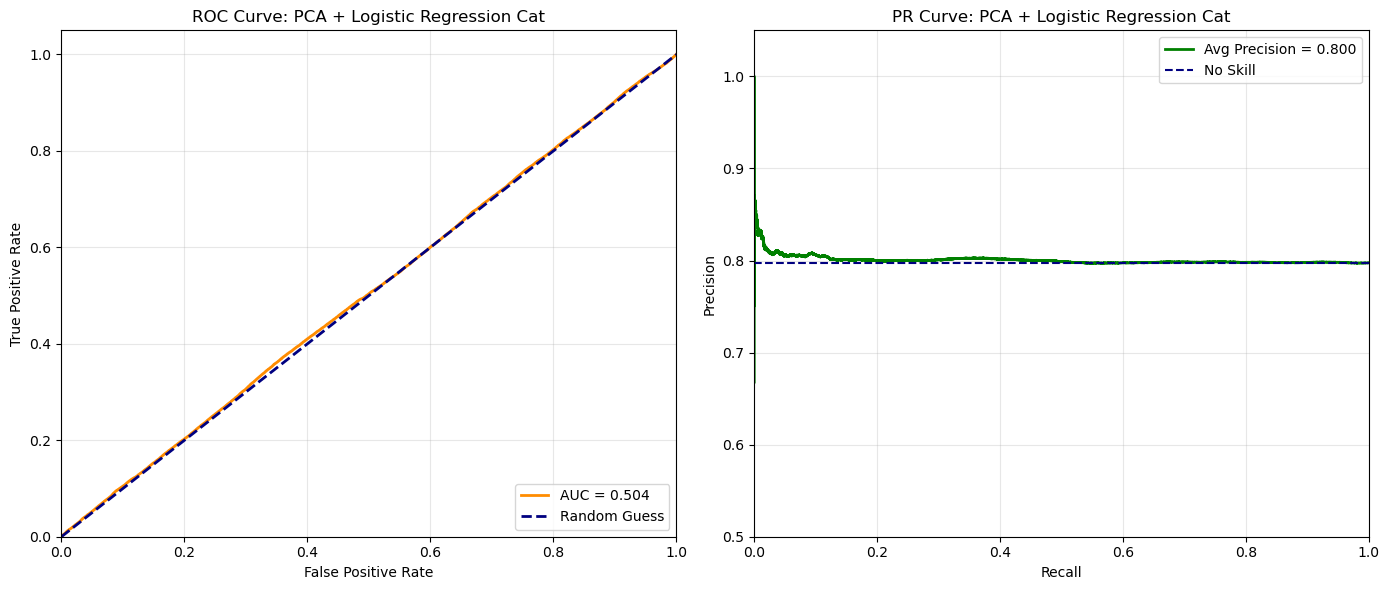

--- PCA + Logistic Regression Full ---
Train Accuracy: 0.5021 | Train AUC: 0.5015
Test  Accuracy: 0.4710 | Test  AUC: 0.5040
✅ Model seems balanced
------------------------------


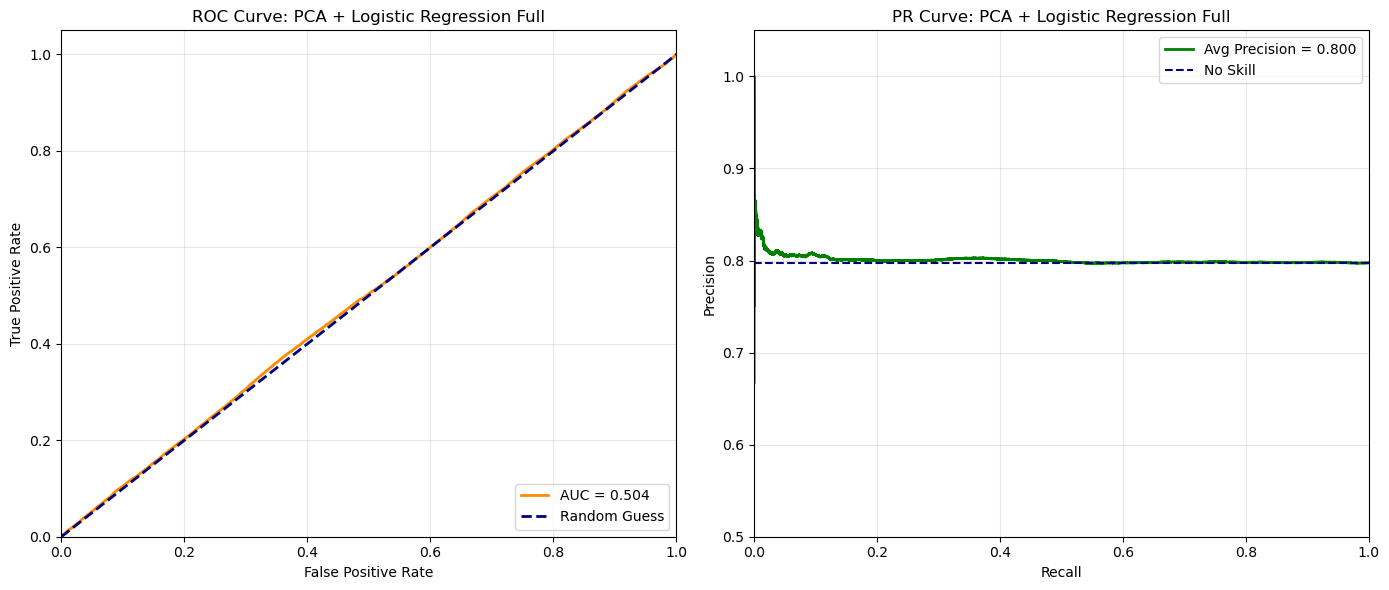

--- PCA + Random Forest Cat ---
Train Accuracy: 0.5316 | Train AUC: 0.5541
Test  Accuracy: 0.6172 | Test  AUC: 0.5082
✅ Model seems balanced
------------------------------


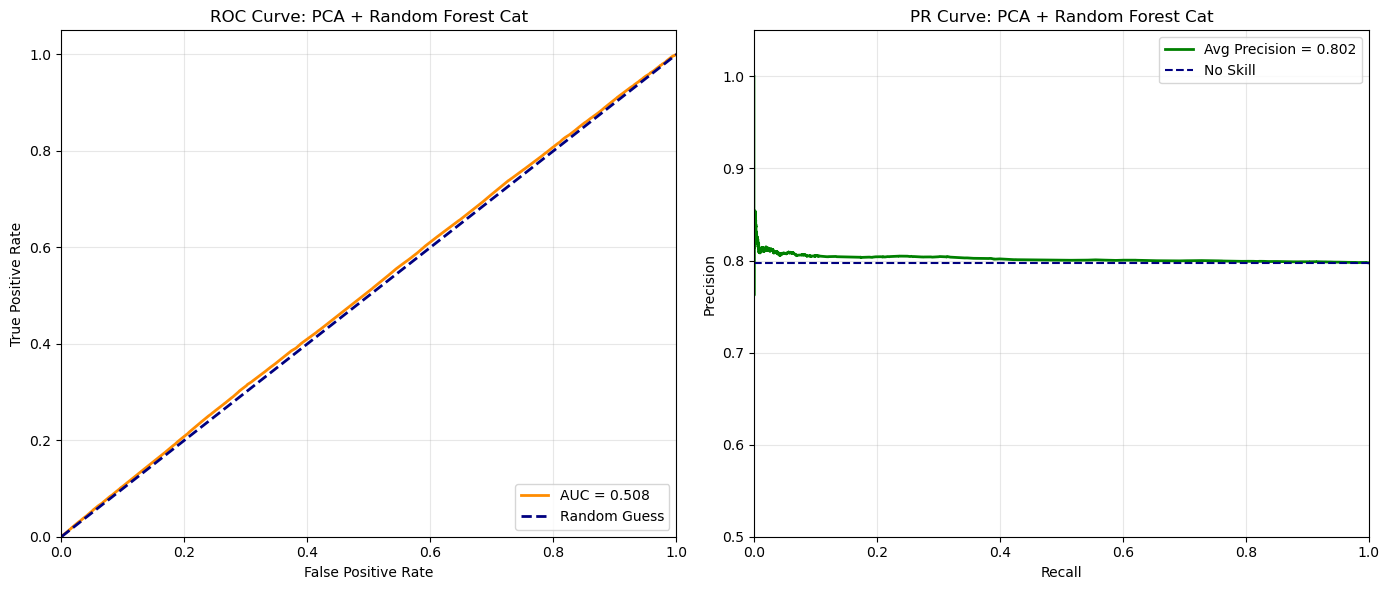

--- PCA + Random Forest Full ---
Train Accuracy: 0.5326 | Train AUC: 0.5546
Test  Accuracy: 0.5984 | Test  AUC: 0.5086
✅ Model seems balanced
------------------------------


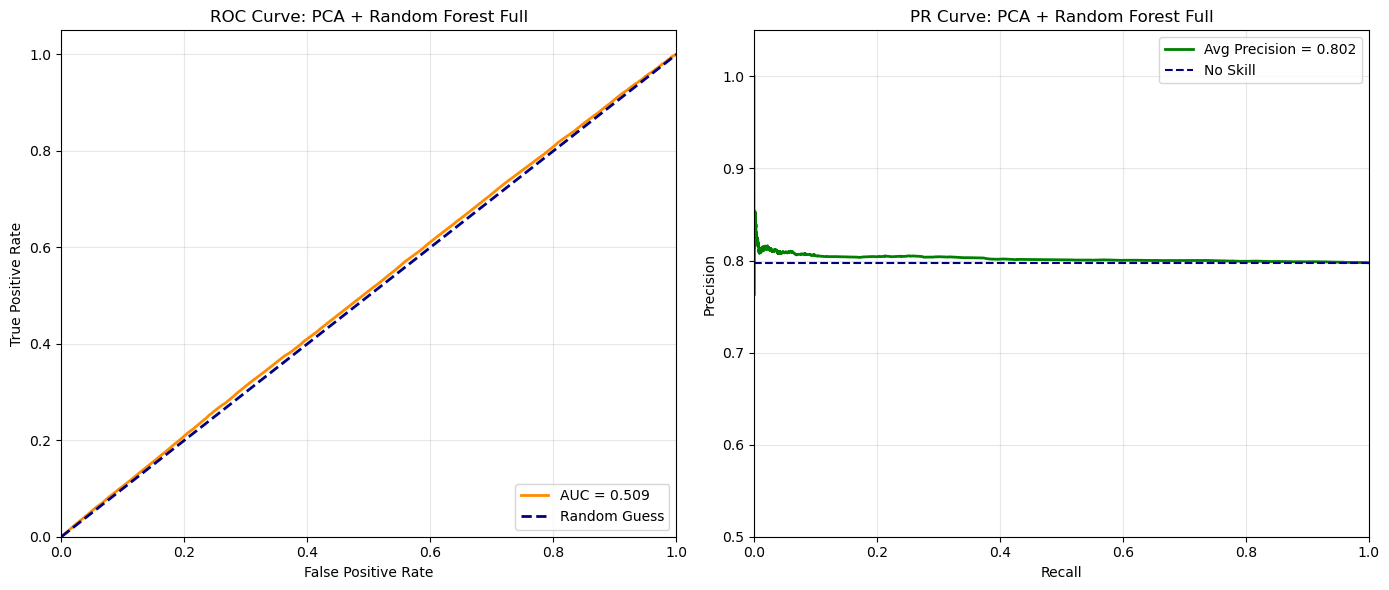

In [119]:
lr_pca_cat = LogisticRegression(max_iter=1000, random_state=SEED)
results.append(
    evaluate_and_graph(lr_pca_cat, X_train_pca_cat, y_train, X_test_pca_cat, y_test, "PCA + Logistic Regression Cat", True)
)

lr_pca_full = LogisticRegression(max_iter=1000, random_state=SEED)
results.append(
    evaluate_and_graph(lr_pca_full, X_train_pca_full, y_train, X_test_pca_full, y_test, "PCA + Logistic Regression Full", True)
)

# ---

rf_pca_cat = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(rf_pca_cat, X_train_pca_cat, y_train, X_test_pca_cat, y_test, "PCA + Random Forest Cat", True)
)

rf_pca_full = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(rf_pca_full, X_train_pca_full, y_train, X_test_pca_full, y_test, "PCA + Random Forest Full", True)
)

In [120]:
# --- PCA on CAT mini for SVM ---

pca_cat_mini = PCA(n_components=0.95, random_state=SEED)

X_train_pca_cat_mini = pca_cat_mini.fit_transform(X_train_mini_cat)
X_test_pca_cat_mini  = pca_cat_mini.transform(X_test_mini_cat)

print(f"[CAT mini] Reduced dims: {X_train_pca_cat_mini.shape[1]}")

# --- PCA on FULL mini for SVM ---

pca_full_mini = PCA(n_components=0.95, random_state=SEED)

X_train_pca_full_mini = pca_full_mini.fit_transform(X_train_mini_full)
X_test_pca_full_mini  = pca_full_mini.transform(X_test_mini_full)

print(f"[FULL mini] Reduced dims: {X_train_pca_full_mini.shape[1]}")

[CAT mini] Reduced dims: 1
[FULL mini] Reduced dims: 1


--- PCA + SVM (RBF) Cat ---
Train Accuracy: 0.5115 | Train AUC: 0.4863
Test  Accuracy: 0.7532 | Test  AUC: 0.5008
✅ Model seems balanced
------------------------------


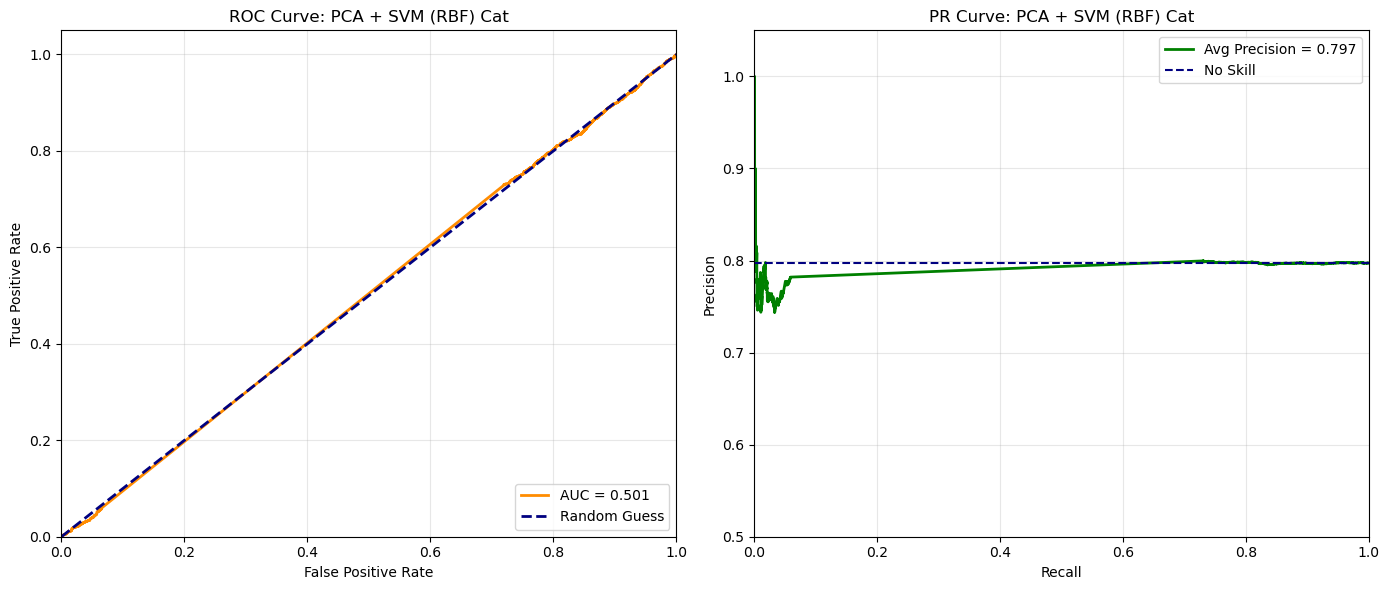

--- PCA + SVM (RBF) Full ---
Train Accuracy: 0.5115 | Train AUC: 0.4865
Test  Accuracy: 0.7532 | Test  AUC: 0.5012
✅ Model seems balanced
------------------------------


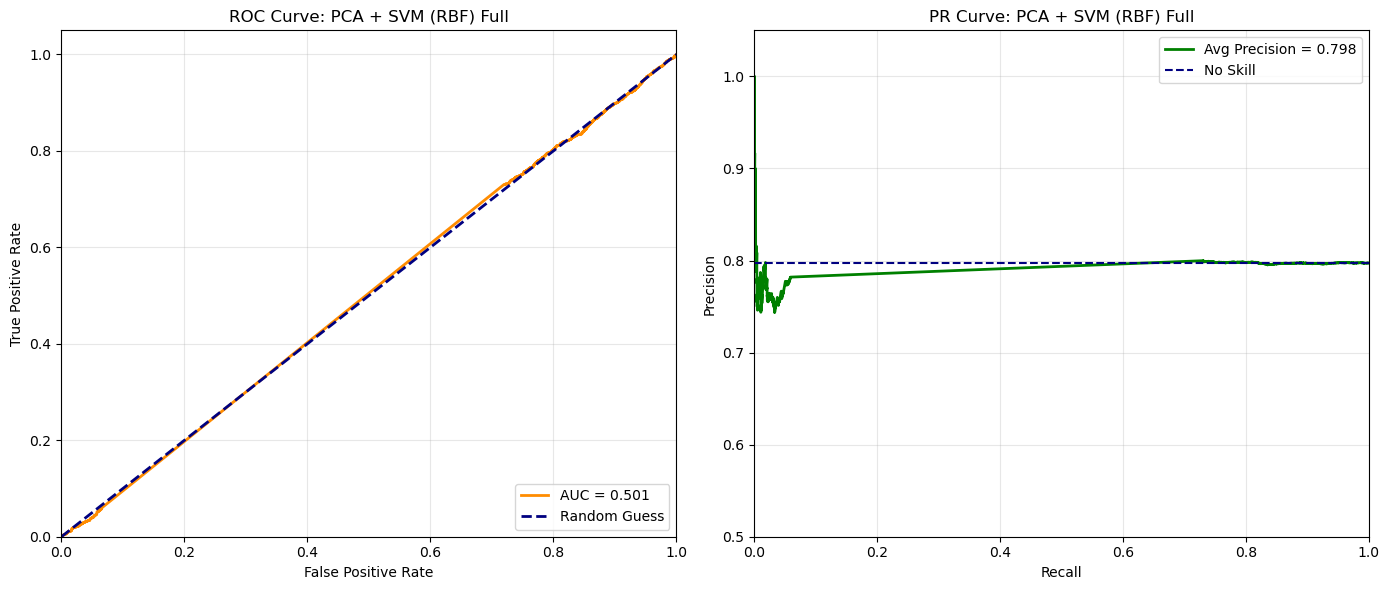

In [121]:
svm_pca_cat = SVC(kernel='rbf', probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_pca_cat, X_train_pca_cat_mini, y_train_mini_cat, X_test_pca_cat_mini, y_test_mini_cat, "PCA + SVM (RBF) Cat", True)
)

svm_pca_full = SVC(kernel='rbf', probability=True, random_state=SEED)
results.append(
    evaluate_and_graph(svm_pca_full, X_train_pca_full_mini, y_train_mini_full, X_test_pca_full_mini, y_test_mini_full, "PCA + SVM (RBF) Full", True)
)

# Results

~ 0 seconds

In [122]:
with pd.option_context('display.max_rows', None):
    display(pd.DataFrame(results))

model  accuracy       auc  average_precision  \
0                          PLA Cat  0.852328  0.903922           0.967843   
1                         PLA Full  0.830987  0.876400           0.954124   
2          Logistic Regression Cat  0.859954  0.911104           0.971093   
3         Logistic Regression Full  0.861666  0.911750           0.971317   
4           Softmax Regression Cat  0.859881  0.911108           0.971093   
5           Softmax Regression Cat  0.861705  0.911748           0.971316   
6                          LDA Cat  0.880875  0.910642           0.970830   
7                         LDA Full  0.882429  0.911260           0.971078   
8                          QDA Cat  0.859247  0.877437           0.957498   
9                         QDA Full  0.858439  0.880794           0.960032   
10      Naive Bayes (Gaussian) Cat  0.827148  0.871483           0.948840   
11     Naive Bayes (Gaussian) Full  0.684521  0.867831           0.951832   
12     Naive Bayes (Bernoulli) Cat  0.861627  0.890714           0.961988   
13    Naive Bayes (Bernoulli) Full  0.765420  0.888516           0.962538   
14                SVM (Linear) Cat  0.862600  0.903435           0.968754   
15               SVM (Linear) Full  0.860600  0.903182           0.968811   
16            SVM (Polynomial) Cat  0.799700  0.513349           0.802699   
17           SVM (Polynomial) Full  0.799100  0.512849           0.802524   
18                   SVM (RBF) Cat  0.850100  0.891479           0.965077   
19                  SVM (RBF) Full  0.851000  0.891528           0.965140   
20        Decision Tree (Gini) Cat  0.862541  0.910357           0.966625   
21       Decision Tree (Gini) Full  0.862592  0.910386           0.966624   
22     Decision Tree (Entropy) Cat  0.862962  0.911714           0.968073   
23    Decision Tree (Entropy) Full  0.863102  0.911574           0.967949   
24             Bagging (Trees) Cat  0.895987  0.902619           0.963705   
25            Bagging (Trees) Full  0.896531  0.903968           0.964514   
26               Random Forest Cat  0.862446  0.912432           0.970953   
27              Random Forest Full  0.862092  0.911197           0.970611   
28           Gradient Boosting Cat  0.861851  0.916421           0.973045   
29          Gradient Boosting Full  0.862452  0.916426           0.973018   
30   PCA + Logistic Regression Cat  0.470957  0.503971           0.800486   
31  PCA + Logistic Regression Full  0.470957  0.503971           0.800486   
32         PCA + Random Forest Cat  0.617209  0.508176           0.801786   
33        PCA + Random Forest Full  0.598382  0.508573           0.801987   
34             PCA + SVM (RBF) Cat  0.753200  0.500768           0.797472   
35            PCA + SVM (RBF) Full  0.753200  0.501177           0.797669   

    train_accuracy  train_auc  
0         0.820636   0.903049  
1         0.800105   0.876418  
2         0.825467   0.909733  
3         0.827046   0.910557  
4         0.825409   0.909738  
5         0.827043   0.910558  
6         0.819239   0.909278  
7         0.821623   0.910085  
8         0.807793   0.876505  
9         0.811191   0.879905  
10        0.805037   0.872355  
11        0.756098   0.867248  
12        0.812950   0.890120  
13        0.779121   0.887930  
14        0.831800   0.910289  
15        0.832800   0.912680  
16        0.513600   0.516057  
17        0.513900   0.516548  
18        0.816300   0.899167  
19        0.818200   0.900073  
20        0.835262   0.917277  
21        0.835324   0.917278  
22        0.834569   0.916918  
23        0.834718   0.916965  
24        0.999941   1.000000  
25        0.999946   1.000000  
26        0.831866   0.915420  
27        0.831398   0.913867  
28        0.832783   0.915525  
29        0.832855   0.915540  
30        0.502124   0.501487  
31        0.502126   0.501487  
32        0.531625   0.554080  
33        0.532553   0.554576  
34        0.511500   0.486345  
35        0.511500   0.4865

A striking pattern in the results table is how consistently similar the Cat models (without `grade_subgrade`) and the Full models (with `grade_subgrade`) perform. Across virtually every model family—Logistic Regression, SVM, Naive Bayes, Decision Trees, Random Forests, and Gradient Boosting—the difference between Cat and Full versions is typically:
- Accuracy: difference of 0.000–0.003
- AUC: difference of 0.000–0.004
- Average Precision: difference of 0.000–0.005

These differences are so small they fall within typical random variation, meaning that adding `grade_subgrade` does not meaningfully improve model performance.

Example patterns from the table
- Gradient Boosting Cat (no `grade_subgrade`) is actually the best-performing model overall
- Logistic Regression Cat and Full differ by only ~0.001 across all metrics
- SVM (RBF) Cat vs Full shows almost identical performance
- Decision Tree Cat vs Full matches to 3–4 decimal places
- Random Forest Cat and Full are also nearly indistinguishable

This consistency across all model classes strongly suggests that grade_subgrade is not a predictive driver in this problem—even models that usually overfit to noisy features (like trees) do not extract meaningful signal from it.




The results table shows that the Cat and Full versions of every model perform nearly identically, with differences typically under 0.003 across accuracy, AUC, and average precision. Because the only difference between these models is the inclusion of the `grade_subgrade` feature, this strongly suggests that `grade_subgrade` adds little or no predictive value. This conclusion is further supported by the fact that the best-performing model overall—Gradient Boosting Cat—excludes `grade_subgrade` entirely.

When comparing model families, Gradient Boosting Cat leads across all metrics, but only marginally (≈0.001–0.01) above simpler models like Logistic Regression. This indicates that the dataset is close to linearly separable and that additional model complexity yields minimal improvements. Tree-based models and PCA-enhanced models show similar performance clusters, reinforcing that the core features already contain the primary signal needed for prediction.

In [123]:
def pick_best_model(dataframe, overfit_threshold=0.05):
    if dataframe is None or dataframe.empty:
        print("No models provided (empty DataFrame).")
        return None

    df = dataframe.copy()

    df['overfitting_gap'] = df['train_auc'] - df['auc']
    df['is_overfit'] = df['overfitting_gap'] > overfit_threshold

    df_valid = df[df['is_overfit'] == False].copy()
    df_overfit = df[df['is_overfit'] == True].copy()

    print(f"Total Models: {len(df)}")
    print(f"Valid Models: {len(df_valid)}")
    print(f"Disqualified Models: {len(df_overfit)}")

    if not df_overfit.empty:
        print("\n⚠️ The following models were disqualified due to overfitting:")
        display(df_overfit[['model', 'accuracy', 'auc', 'train_auc', 'overfitting_gap']])
    else:
        print("\n✅ No models were disqualified for overfitting.")

    if df_valid.empty:
        print("\n⚠️ All models are overfitting (by the chosen threshold).")
        print("Falling back to ranking ALL models by AUC.")
        df_valid = df.copy()

    print("Best by Accuracy:")
    display(df_valid.sort_values(by="accuracy", ascending=False).head(1))

    print("Best by AUC:")
    display(df_valid.sort_values(by="auc", ascending=False).head(1))

    print("Best by Average Precision:")
    display(df_valid.sort_values(by="average_precision", ascending=False).head(1))

    df_valid_ranked = df_valid.copy()
    df_valid_ranked["rank_acc"] = df_valid["accuracy"].rank(ascending=False)
    df_valid_ranked["rank_auc"] = df_valid["auc"].rank(ascending=False)
    df_valid_ranked["rank_ap"] = df_valid["average_precision"].rank(ascending=False)


    final_ranking = df_valid_ranked.sort_values(
        by=["rank_auc", "rank_acc", "rank_ap"]
    )

    cols = ['model', 'accuracy', 'auc', 'average_precision', 'overfitting_gap']
    print("\nFinal ranking (higher = better):")
    display(final_ranking[cols])

    best_model_row = final_ranking.iloc[0]
    best_model_name = best_model_row['model']
    print(f"\n🏆 Best model: {best_model_name}")

    return best_model_name

In [124]:
df = pd.DataFrame(results)
pick_best_model(df, overfit_threshold=0.05)

Total Models: 36
Valid Models: 34
Disqualified Models: 2

⚠️ The following models were disqualified due to overfitting:


model  accuracy       auc  train_auc  overfitting_gap
24   Bagging (Trees) Cat  0.895987  0.902619        1.0         0.097381
25  Bagging (Trees) Full  0.896531  0.903968        1.0         0.096032

Best by Accuracy:


model  accuracy      auc  average_precision  train_accuracy  train_auc  \
7  LDA Full  0.882429  0.91126           0.971078        0.821623   0.910085   

   overfitting_gap  is_overfit  
7        -0.001175       False

Best by AUC:


model  accuracy       auc  average_precision  \
29  Gradient Boosting Full  0.862452  0.916426           0.973018   

    train_accuracy  train_auc  overfitting_gap  is_overfit  
29        0.832855    0.91554        -0.000886       False

Best by Average Precision:


model  accuracy       auc  average_precision  \
28  Gradient Boosting Cat  0.861851  0.916421           0.973045   

    train_accuracy  train_auc  overfitting_gap  is_overfit  
28        0.832783   0.915525        -0.000896       False


Final ranking (higher = better):


model  accuracy       auc  average_precision  \
29          Gradient Boosting Full  0.862452  0.916426           0.973018   
28           Gradient Boosting Cat  0.861851  0.916421           0.973045   
26               Random Forest Cat  0.862446  0.912432           0.970953   
3         Logistic Regression Full  0.861666  0.911750           0.971317   
5           Softmax Regression Cat  0.861705  0.911748           0.971316   
22     Decision Tree (Entropy) Cat  0.862962  0.911714           0.968073   
23    Decision Tree (Entropy) Full  0.863102  0.911574           0.967949   
7                         LDA Full  0.882429  0.911260           0.971078   
27              Random Forest Full  0.862092  0.911197           0.970611   
4           Softmax Regression Cat  0.859881  0.911108           0.971093   
2          Logistic Regression Cat  0.859954  0.911104           0.971093   
6                          LDA Cat  0.880875  0.910642           0.970830   
21       Decision Tree (Gini) Full  0.862592  0.910386           0.966624   
20        Decision Tree (Gini) Cat  0.862541  0.910357           0.966625   
0                          PLA Cat  0.852328  0.903922           0.967843   
14                SVM (Linear) Cat  0.862600  0.903435           0.968754   
15               SVM (Linear) Full  0.860600  0.903182           0.968811   
19                  SVM (RBF) Full  0.851000  0.891528           0.965140   
18                   SVM (RBF) Cat  0.850100  0.891479           0.965077   
12     Naive Bayes (Bernoulli) Cat  0.861627  0.890714           0.961988   
13    Naive Bayes (Bernoulli) Full  0.765420  0.888516           0.962538   
9                         QDA Full  0.858439  0.880794           0.960032   
8                          QDA Cat  0.859247  0.877437           0.957498   
1                         PLA Full  0.830987  0.876400           0.954124   
10      Naive Bayes (Gaussian) Cat  0.827148  0.871483           0.948840   
11     Naive Bayes (Gaussian) Full  0.684521  0.867831           0.951832   
16            SVM (Polynomial) Cat  0.799700  0.513349           0.802699   
17           SVM (Polynomial) Full  0.799100  0.512849           0.802524   
33        PCA + Random Forest Full  0.598382  0.508573           0.801987   
32         PCA + Random Forest Cat  0.617209  0.508176           0.801786   
31  PCA + Logistic Regression Full  0.470957  0.503971           0.800486   
30   PCA + Logistic Regression Cat  0.470957  0.503971           0.800486   
35            PCA + SVM (RBF) Full  0.753200  0.501177           0.797669   
34             PCA + SVM (RBF) Cat  0.753200  0.500768           0.797472   

    overfitting_gap  
29        -0.000886  
28        -0.000896  
26         0.002989  
3         -0.001192  
5         -0.001190  
22         0.005205  
23         0.005391  
7         -0.001175  
27         0.002671  
4         -0.001370  
2         -0.001371  
6         -0.001364  
21         0.006892  
20         0.006920  
0         -0.000873  
14         0.006854  
15         0.009498  
19         0.008544  
18         0.007688  
12        -0.000595  
13        -0.000586  
9         -0.000888  
8         -0.000931  
1          0.000018  
10         0.000872  
11        -0.000583  
16         0.002707  
17         0.003699  
33         0.046003  
32         0.045903  
31        -0.002484  
30        -0.002484  
35        -0.014637  
34        -0.014423


🏆 Best model: Gradient Boosting Full


'Gradient Boosting Full'

# Models Full with Hyperparameter Tuning

Hyperparametizing the top models to see if I can get a better result

~ Super long run! Do not run these cells! 3 hours 53 minutes

Gradient Boosting Full takes - 91 minutes and 1.6 seconds

Gradient Boosting Cat takes - 80 minutes 33.1 seconds

Random Forest Cat takes - 57 minutes 33.4 seconds

Decision Tree Entropy Cat takes - 4 minutes 33.5 seconds

In [134]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, loguniform

gb_hyper_full = GradientBoostingClassifier(random_state=SEED)
gb_hyper_cat = GradientBoostingClassifier(random_state=SEED)
rf_hyper_cat = RandomForestClassifier(random_state=SEED)
dt_hyper_entropy_cat = DecisionTreeClassifier(criterion='entropy', random_state=SEED)

param_distributions_gb = {
    'n_estimators': randint(low=50, high=500),
    'learning_rate': loguniform(0.001, 0.2),
    'max_depth': randint(3, 8)
}

param_distributions_rf = {
    'n_estimators': randint(low=100, high=500),
    'max_depth': [10, 20, 30],
    'min_samples_split': randint(2, 20),
    'max_features': ['sqrt', 'log2', 0.6, 0.8]
}

param_distributions_dt = {
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

N_ITERATIONS = 20

random_search_full_gb = RandomizedSearchCV(
    estimator=gb_hyper_full,
    param_distributions=param_distributions_gb,
    n_iter=N_ITERATIONS,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)

random_search_cat_gb = RandomizedSearchCV(
    estimator=gb_hyper_cat,
    param_distributions=param_distributions_gb,
    n_iter=N_ITERATIONS,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)

random_search_cat_rf = RandomizedSearchCV(
    estimator=rf_hyper_cat,
    param_distributions=param_distributions_rf,
    n_iter=N_ITERATIONS,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)

random_search_cat_dt = RandomizedSearchCV(
    estimator=dt_hyper_entropy_cat,
    param_distributions=param_distributions_dt,
    n_iter=N_ITERATIONS*10,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)


Starting GridSearchCV for Gradient Boosting (Tuned) Full...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
--- Gradient Boosting (Tuned) Full Results ---
Best Parameters: {'learning_rate': np.float64(0.09522449329415009), 'max_depth': 7, 'n_estimators': 378}
Best Score: 0.9397495015745414
--- Gradient Boosting (Tuned) Full ---
Train Accuracy: 0.8682 | Train AUC: 0.9481
Test  Accuracy: 0.8751 | Test  AUC: 0.9219
✅ Model seems balanced
------------------------------


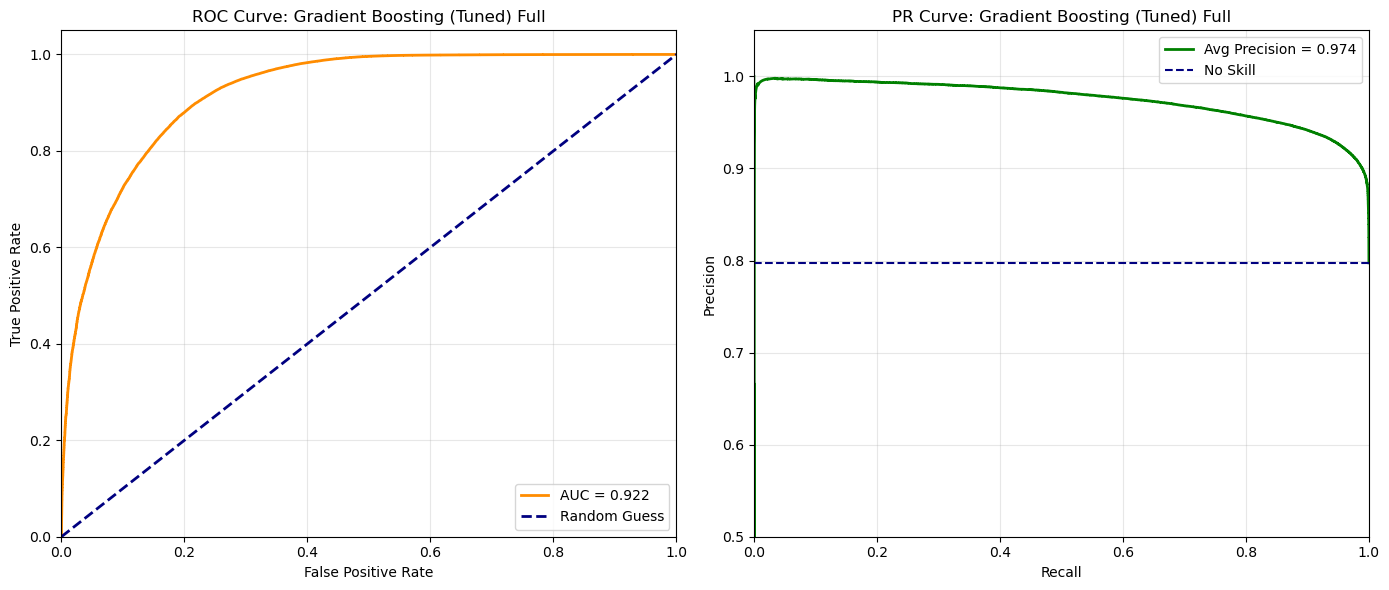

In [126]:
print("\nStarting GridSearchCV for Gradient Boosting (Tuned) Full...")
random_search_full_gb.fit(X_train_full, y_train)

print("--- Gradient Boosting (Tuned) Full Results ---")
print(f"Best Parameters: {random_search_full_gb.best_params_}")
print(f"Best Score: {random_search_full_gb.best_score_}")

best_random_search_full_gb = random_search_full_gb.best_estimator_

results.append(
    evaluate_and_graph(best_random_search_full_gb, X_train_full, y_train, X_test_full, y_test, "Gradient Boosting (Tuned) Full", True)
)


Starting GridSearchCV for Gradient Boosting (Tuned) Cat...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
--- Gradient Boosting (Tuned) Full Results ---
Best Parameters: {'learning_rate': np.float64(0.09522449329415009), 'max_depth': 7, 'n_estimators': 378}
Best Score: 0.9396701897827663
--- Gradient Boosting (Tuned) Cat ---
Train Accuracy: 0.8669 | Train AUC: 0.9474
Test  Accuracy: 0.8759 | Test  AUC: 0.9221
✅ Model seems balanced
------------------------------


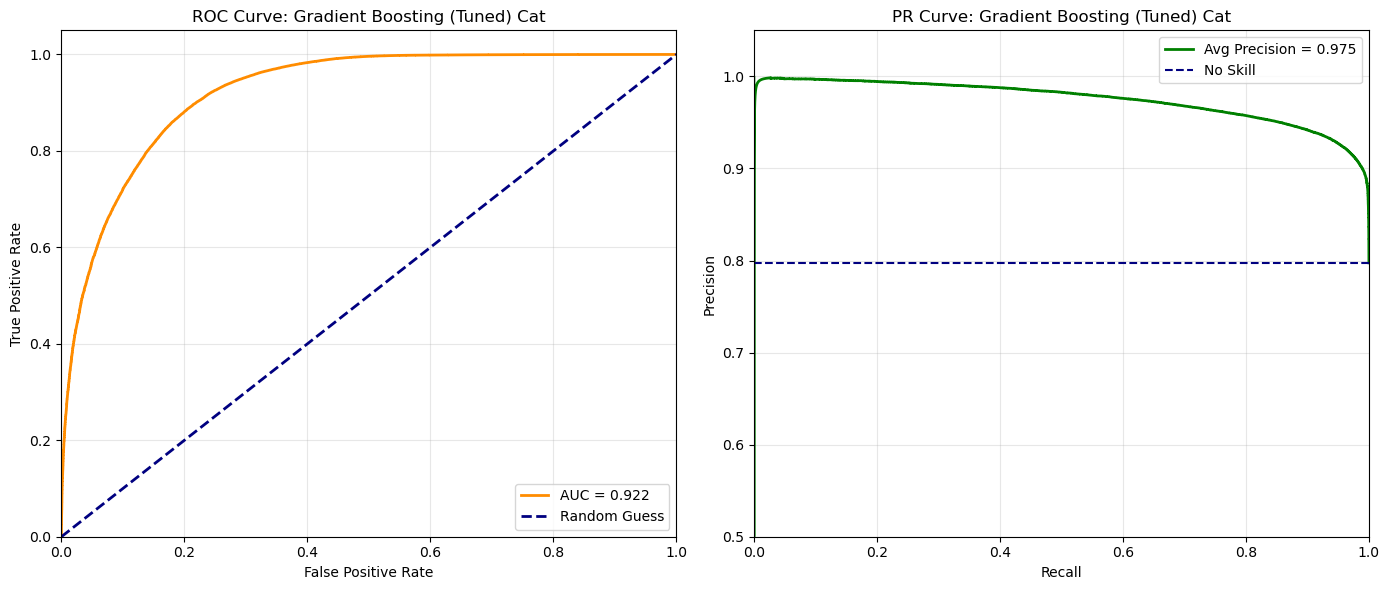

In [127]:
print("\nStarting GridSearchCV for Gradient Boosting (Tuned) Cat...")
random_search_cat_gb.fit(X_train_cat, y_train)

print("--- Gradient Boosting (Tuned) Full Results ---")
print(f"Best Parameters: {random_search_cat_gb.best_params_}")
print(f"Best Score: {random_search_cat_gb.best_score_}")

best_random_search_cat_gb = random_search_cat_gb.best_estimator_

results.append(
    evaluate_and_graph(best_random_search_cat_gb, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting (Tuned) Cat", True)
)

Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/makennaworley/miniconda3/envs/kaggle/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


--- Random Forest Results ---
Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 443}
Best Score: 0.990055509392525
--- Random Forest (Tuned) Cat ---
Train Accuracy: 0.9987 | Train AUC: 1.0000
Test  Accuracy: 0.8959 | Test  AUC: 0.9120
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


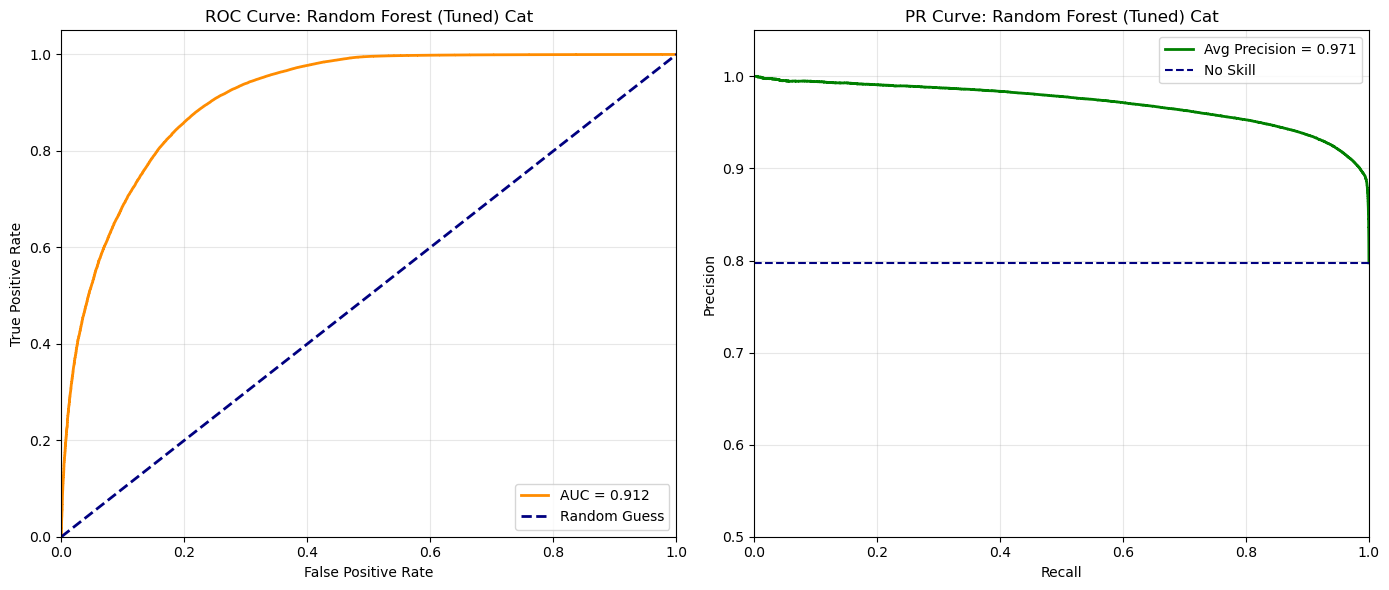

In [137]:
print("Starting GridSearchCV for Random Forest...")
random_search_cat_rf.fit(X_train_cat, y_train)

print("--- Random Forest Results ---")
print(f"Best Parameters: {random_search_cat_rf.best_params_}")
print(f"Best Score: {random_search_cat_rf.best_score_}")

best_random_search_cat_rf = random_search_cat_rf.best_estimator_

results.append(
    evaluate_and_graph(best_random_search_cat_rf, X_train_cat, y_train, X_test_cat, y_test, "Random Forest (Tuned) Cat", True)
)


Starting GridSearchCV for Decision Tree (Entropy)...
Fitting 3 folds for each of 200 candidates, totalling 600 fits


/Users/makennaworley/miniconda3/envs/kaggle/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


--- Decision Tree (Entropy) Results ---
Best Parameters: {'max_depth': 29, 'min_samples_leaf': 7, 'min_samples_split': 14}
Best Score: 0.9394739298593325
--- Decision Tree (Entropy, Tuned) Cat ---
Train Accuracy: 0.9282 | Train AUC: 0.9864
Test  Accuracy: 0.8416 | Test  AUC: 0.8326
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


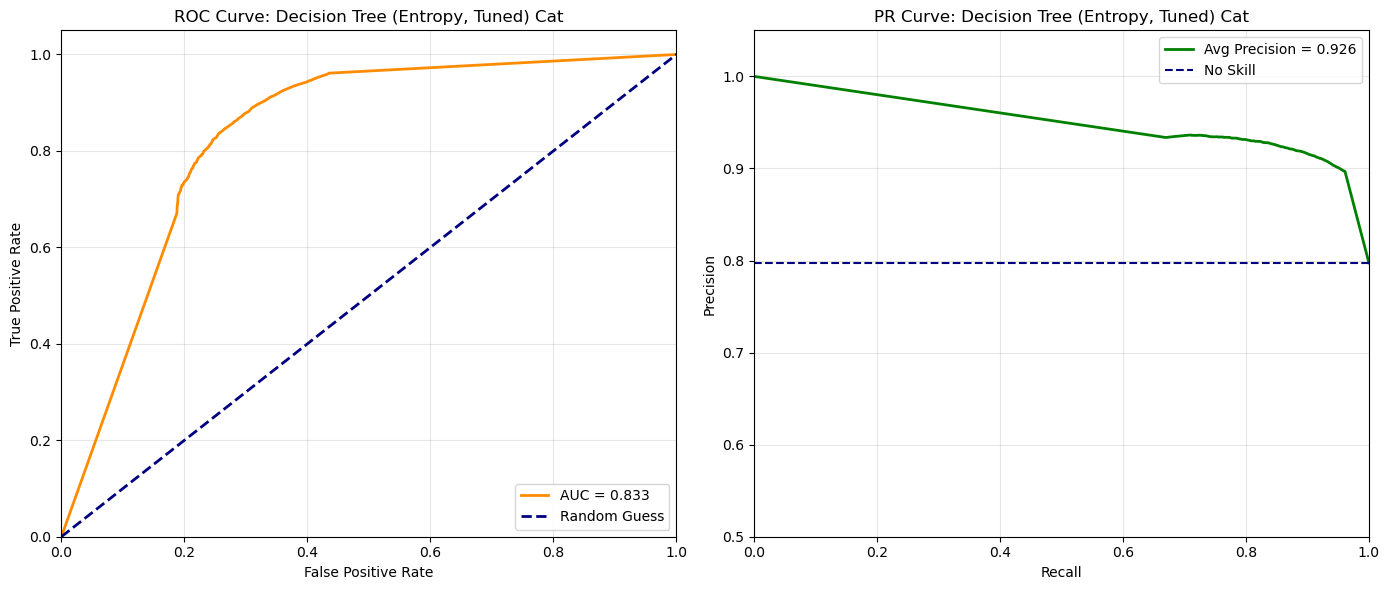

In [135]:
print("\nStarting GridSearchCV for Decision Tree (Entropy)...")
random_search_cat_dt.fit(X_train_cat, y_train)

print("--- Decision Tree (Entropy) Results ---")
print(f"Best Parameters: {random_search_cat_dt.best_params_}")
print(f"Best Score: {random_search_cat_dt.best_score_}")

best_random_search_cat_dt = random_search_cat_dt.best_estimator_

results.append(
    evaluate_and_graph(best_random_search_cat_dt, X_train_cat, y_train, X_test_cat, y_test, "Decision Tree (Entropy, Tuned) Cat", True)
)

# Models Full with Hyperparameter Tuning Best Models

Hyperparametizing based on results from other code runs. Run these instead!

These still take a lot of time.

Gradient Boosting Full takes - 35 minutes 58.6 seconds

Gradient Boosting Cat takes - 34 minutes 27.6 seconds

Random Forest Cat takes - 13 minutes 34.1 seconds

Decision Tree Entropy Cat takes - 14.7 seconds


Starting Fitting for Best Gradient Boosting Cat...
--- Gradient Boosting (Best Run) Cat Results ---
--- Gradient Boosting (Best Run) Full ---
Train Accuracy: 0.8669 | Train AUC: 0.9474
Test  Accuracy: 0.8759 | Test  AUC: 0.9221
✅ Model seems balanced
------------------------------


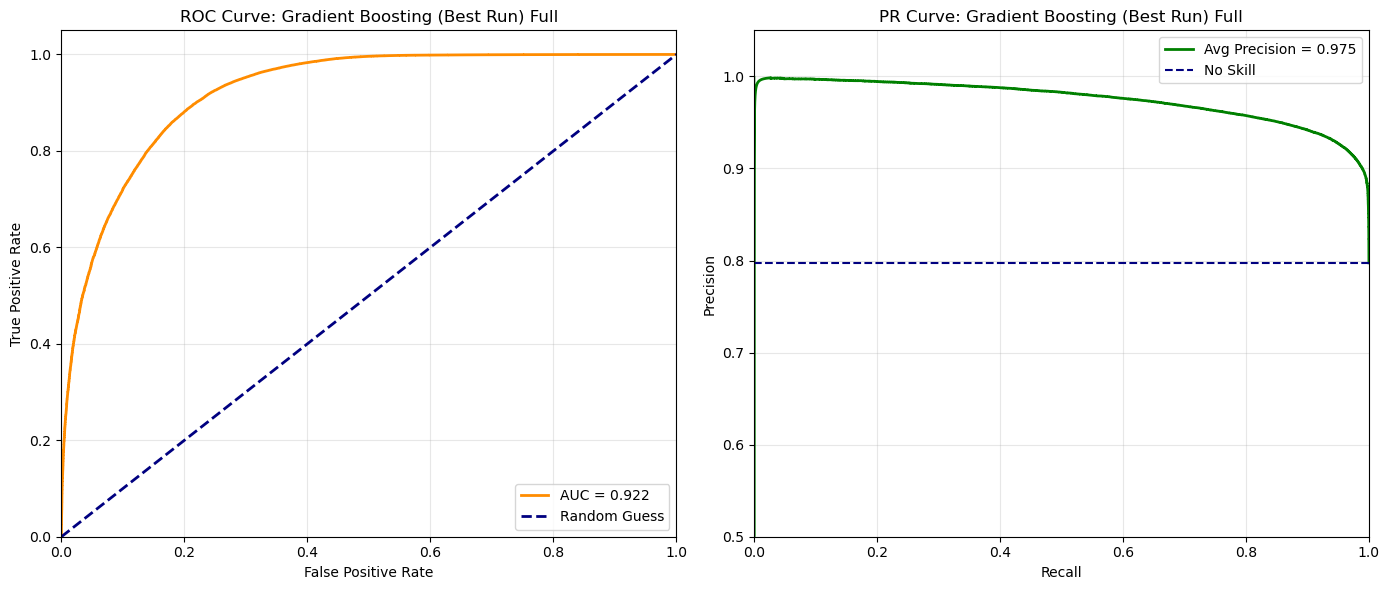

In [149]:
best_params = {
    'learning_rate': np.float64(0.09522449329415009),
    'max_depth': 7,
    'n_estimators': 378
}

best_gb_full = GradientBoostingClassifier(
    random_state=SEED,
    **best_params
)

print("\nStarting Fitting for Best Gradient Boosting Cat...")
best_gb_full.fit(X_train_full, y_train)

print("--- Gradient Boosting (Best Run) Cat Results ---")
best_run_full_gb = best_gb_full

results.append(
    evaluate_and_graph(best_run_full_gb, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting (Best Run) Full", True)
)


Starting Fitting for Best Gradient Boosting Cat...
--- Gradient Boosting (Best Run) Cat Results ---
--- Gradient Boosting (Best Run) Cat ---
Train Accuracy: 0.8669 | Train AUC: 0.9474
Test  Accuracy: 0.8759 | Test  AUC: 0.9221
✅ Model seems balanced
------------------------------


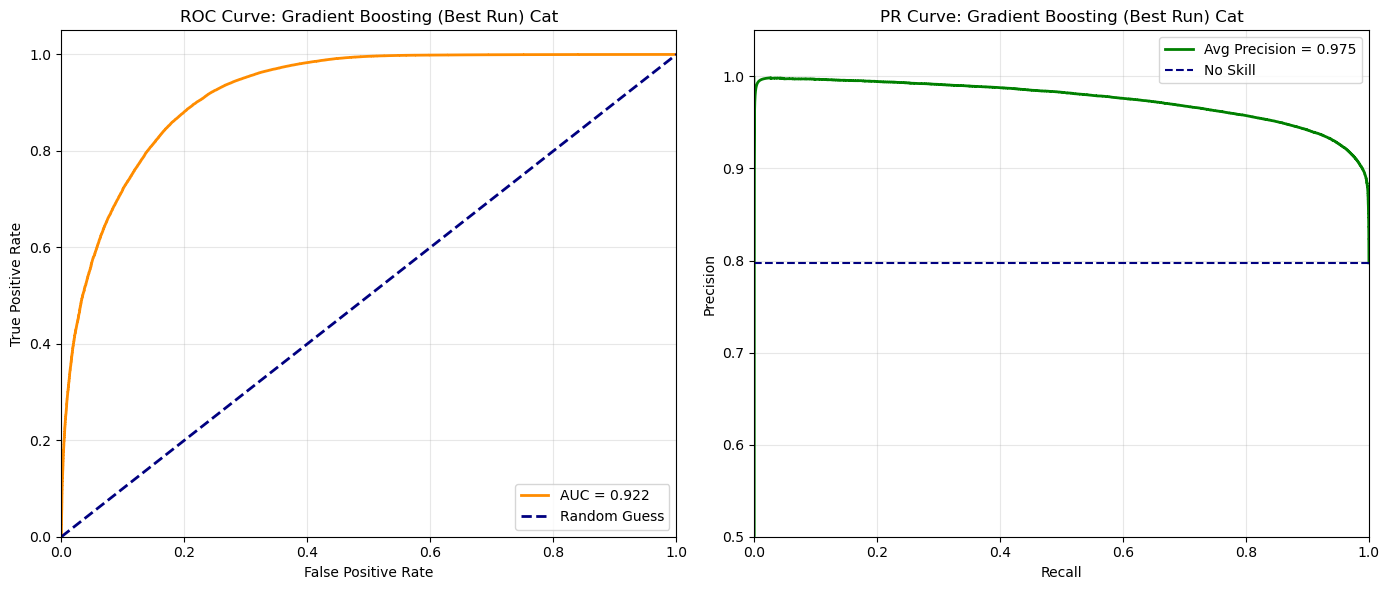

In [150]:
best_params = {
    'learning_rate': np.float64(0.09522449329415009),
    'max_depth': 7,
    'n_estimators': 378
}

best_gb_cat = GradientBoostingClassifier(
    random_state=SEED,
    **best_params
)

print("\nStarting Fitting for Best Gradient Boosting Cat...")
best_gb_cat.fit(X_train_cat, y_train)

print("--- Gradient Boosting (Best Run) Cat Results ---")
best_run_cat_gb = best_gb_cat

results.append(
    evaluate_and_graph(best_run_cat_gb, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting (Best Run) Cat", True)
)


Starting Fitting for Best Random Forest...
--- Random Forest (Best Run) Cat Results ---
--- Random Forest (Best Run) Cat ---
Train Accuracy: 0.9987 | Train AUC: 1.0000
Test  Accuracy: 0.8959 | Test  AUC: 0.9120
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


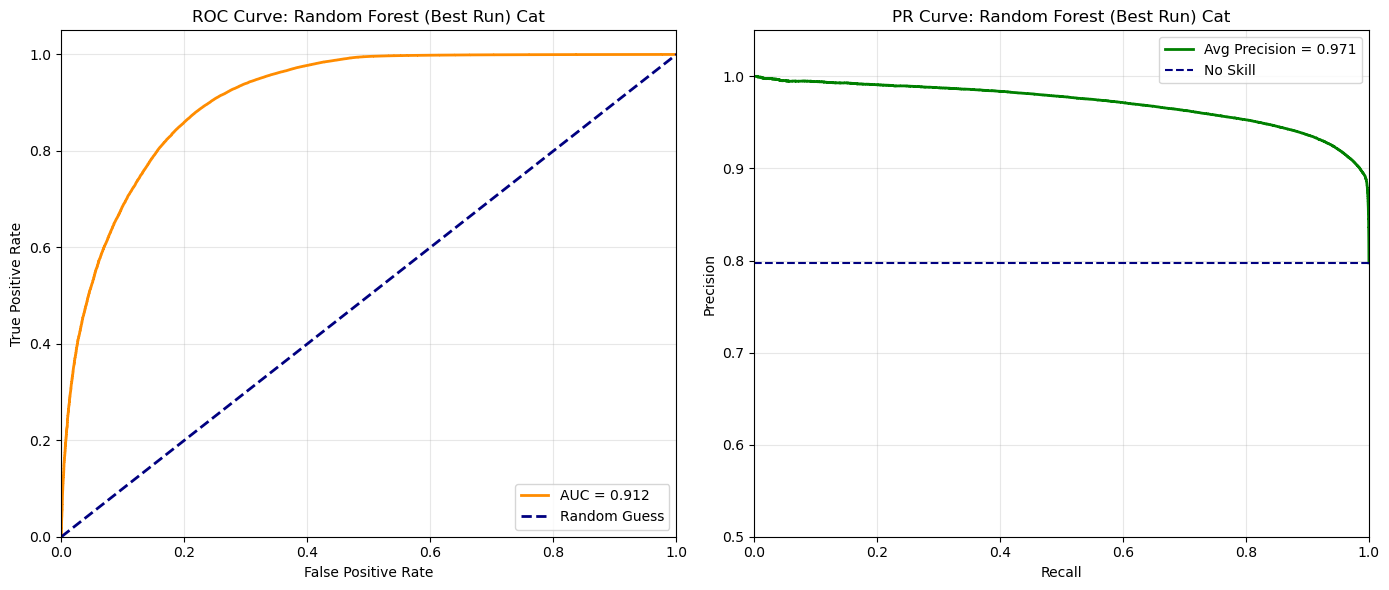

In [151]:
best_params = {
    'max_depth': 30,
    'max_features': 'log2',
    'min_samples_split': 3,
    'n_estimators': 443
}

best_rf_cat = RandomForestClassifier(
    random_state=SEED,
    **best_params
)

print("\nStarting Fitting for Best Random Forest...")
best_rf_cat.fit(X_train_cat, y_train)

print("--- Random Forest (Best Run) Cat Results ---")
best_run_cat_dt = best_rf_cat

results.append(
    evaluate_and_graph(best_run_cat_dt, X_train_cat, y_train, X_test_cat, y_test, "Random Forest (Best Run) Cat", True)
)


Starting Fitting for Best Decision Tree (Entropy)...
--- Decision Tree (Entropy, Best Run) Results ---
--- Decision Tree (Entropy, Best Run) Cat ---
Train Accuracy: 0.9282 | Train AUC: 0.9864
Test  Accuracy: 0.8416 | Test  AUC: 0.8326
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


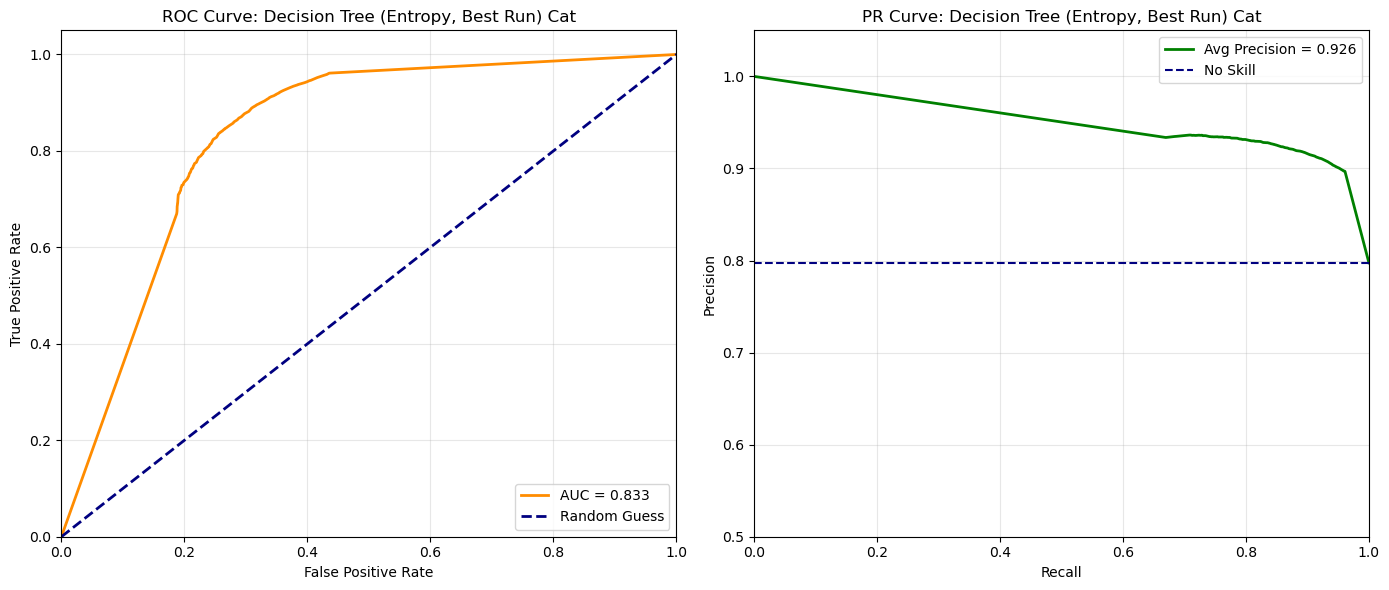

In [152]:
best_params = {
    'max_depth': 29,
    'min_samples_leaf': 7,
    'min_samples_split': 14
}

best_dt_cat = DecisionTreeClassifier(
    criterion='entropy',
    random_state=SEED,
    **best_params
)

print("\nStarting Fitting for Best Decision Tree (Entropy)...")
best_dt_cat.fit(X_train_cat, y_train)

print("--- Decision Tree (Entropy, Best Run) Results ---")
best_run_cat_dt = best_dt_cat

results.append(
    evaluate_and_graph(best_run_cat_dt, X_train_cat, y_train, X_test_cat, y_test, "Decision Tree (Entropy, Best Run) Cat", True)
)

# Results Final

~ .8 seconds

In [139]:
df = pd.DataFrame(results)
best_model = pick_best_model(df, overfit_threshold=0.05)

Total Models: 40
Valid Models: 36
Disqualified Models: 4

⚠️ The following models were disqualified due to overfitting:


model  accuracy       auc  train_auc  \
24                 Bagging (Trees) Cat  0.895987  0.902619   1.000000   
25                Bagging (Trees) Full  0.896531  0.903968   1.000000   
38  Decision Tree (Entropy, Tuned) Cat  0.841576  0.832649   0.986446   
39           Random Forest (Tuned) Cat  0.895925  0.912026   0.999992   

    overfitting_gap  
24         0.097381  
25         0.096032  
38         0.153797  
39         0.087966

Best by Accuracy:


model  accuracy      auc  average_precision  train_accuracy  train_auc  \
7  LDA Full  0.882429  0.91126           0.971078        0.821623   0.910085   

   overfitting_gap  is_overfit  
7        -0.001175       False

Best by AUC:


model  accuracy       auc  average_precision  \
37  Gradient Boosting (Tuned) Cat  0.875864  0.922076           0.974623   

    train_accuracy  train_auc  overfitting_gap  is_overfit  
37        0.866867   0.947375           0.0253       False

Best by Average Precision:


model  accuracy       auc  average_precision  \
37  Gradient Boosting (Tuned) Cat  0.875864  0.922076           0.974623   

    train_accuracy  train_auc  overfitting_gap  is_overfit  
37        0.866867   0.947375           0.0253       False


Final ranking (higher = better):


model  accuracy       auc  average_precision  \
37   Gradient Boosting (Tuned) Cat  0.875864  0.922076           0.974623   
36  Gradient Boosting (Tuned) Full  0.875140  0.921880           0.974455   
29          Gradient Boosting Full  0.862452  0.916426           0.973018   
28           Gradient Boosting Cat  0.861851  0.916421           0.973045   
26               Random Forest Cat  0.862446  0.912432           0.970953   
3         Logistic Regression Full  0.861666  0.911750           0.971317   
5           Softmax Regression Cat  0.861705  0.911748           0.971316   
22     Decision Tree (Entropy) Cat  0.862962  0.911714           0.968073   
23    Decision Tree (Entropy) Full  0.863102  0.911574           0.967949   
7                         LDA Full  0.882429  0.911260           0.971078   
27              Random Forest Full  0.862092  0.911197           0.970611   
4           Softmax Regression Cat  0.859881  0.911108           0.971093   
2          Logistic Regression Cat  0.859954  0.911104           0.971093   
6                          LDA Cat  0.880875  0.910642           0.970830   
21       Decision Tree (Gini) Full  0.862592  0.910386           0.966624   
20        Decision Tree (Gini) Cat  0.862541  0.910357           0.966625   
0                          PLA Cat  0.852328  0.903922           0.967843   
14                SVM (Linear) Cat  0.862600  0.903435           0.968754   
15               SVM (Linear) Full  0.860600  0.903182           0.968811   
19                  SVM (RBF) Full  0.851000  0.891528           0.965140   
18                   SVM (RBF) Cat  0.850100  0.891479           0.965077   
12     Naive Bayes (Bernoulli) Cat  0.861627  0.890714           0.961988   
13    Naive Bayes (Bernoulli) Full  0.765420  0.888516           0.962538   
9                         QDA Full  0.858439  0.880794           0.960032   
8                          QDA Cat  0.859247  0.877437           0.957498   
1                         PLA Full  0.830987  0.876400           0.954124   
10      Naive Bayes (Gaussian) Cat  0.827148  0.871483           0.948840   
11     Naive Bayes (Gaussian) Full  0.684521  0.867831           0.951832   
16            SVM (Polynomial) Cat  0.799700  0.513349           0.802699   
17           SVM (Polynomial) Full  0.799100  0.512849           0.802524   
33        PCA + Random Forest Full  0.598382  0.508573           0.801987   
32         PCA + Random Forest Cat  0.617209  0.508176           0.801786   
31  PCA + Logistic Regression Full  0.470957  0.503971           0.800486   
30   PCA + Logistic Regression Cat  0.470957  0.503971           0.800486   
35            PCA + SVM (RBF) Full  0.753200  0.501177           0.797669   
34             PCA + SVM (RBF) Cat  0.753200  0.500768           0.797472   

    overfitting_gap  
37         0.025300  
36         0.026238  
29        -0.000886  
28        -0.000896  
26         0.002989  
3         -0.001192  
5         -0.001190  
22         0.005205  
23         0.005391  
7         -0.001175  
27         0.002671  
4         -0.001370  
2         -0.001371  
6         -0.001364  
21         0.006892  
20         0.006920  
0         -0.000873  
14         0.006854  
15         0.009498  
19         0.008544  
18         0.007688  
12        -0.000595  
13        -0.000586  
9         -0.000888  
8         -0.000931  
1          0.000018  
10         0.000872  
11        -0.000583  
16         0.002707  
17         0.003699  
33         0.046003  
32         0.045903  
31        -0.002484  
30        -0.002484  
35        -0.014637  
34        -0.014423


🏆 Best model: Gradient Boosting (Tuned) Cat


/var/folders/79/1_91h7ts3jd7dyq7hvpkg4mr0000gp/T/ipykernel_8819/2693430221.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


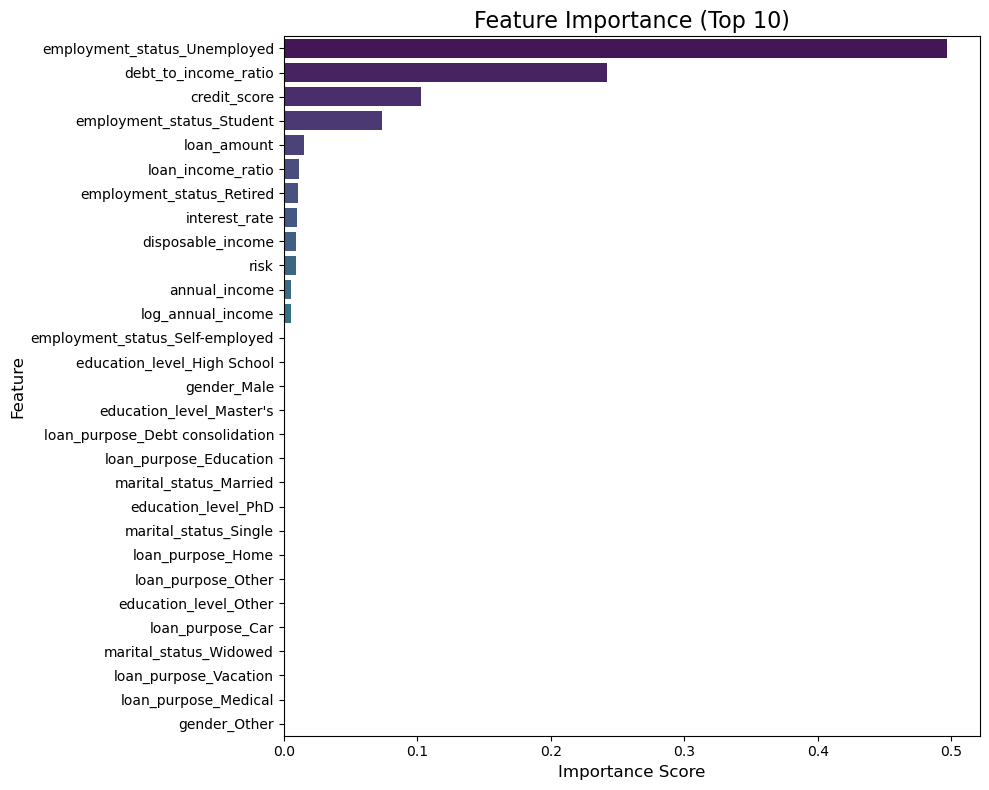

In [143]:
importance_df = pd.DataFrame({
    'Feature': X_train_cat.columns,
    'Importance': best_random_search_cat_gb.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Top 10)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

Text(0.5, 1.0, 'Confusion Matrix for Best Model')

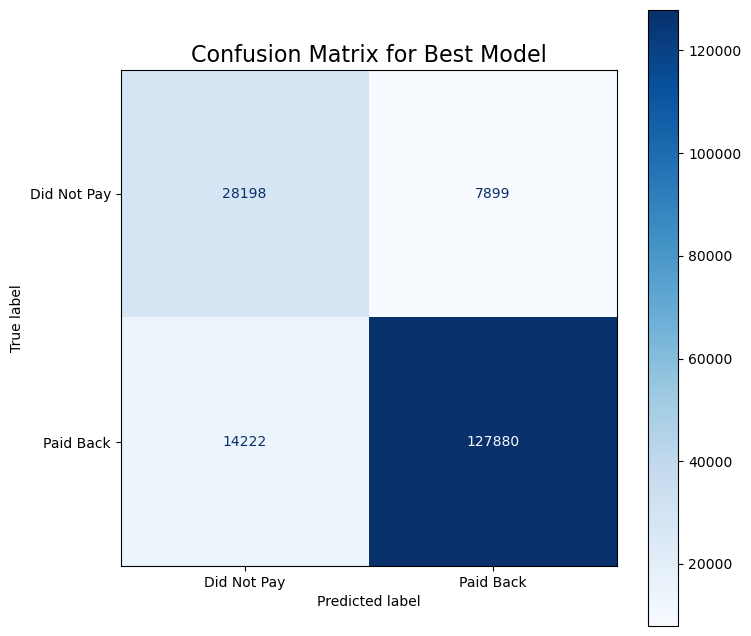

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_labels = ['Did Not Pay', 'Paid Back']

y_pred = best_random_search_cat_gb.predict(X_test_cat)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_labels
)

disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
plt.title('Confusion Matrix for Best Model', fontsize=16)

# Submission for Kaggle

Manual Process, must use results to correctly call the best model

~ 1 second

In [140]:
numerical_vars = ["annual_income","debt_to_income_ratio","credit_score", "loan_amount", "interest_rate"]

testing_scaled_num = scaler.transform(testing[numerical_vars])
testing_scaled_df = pd.DataFrame(
    testing_scaled_num,
    columns=numerical_vars,
    index=testing.index
)

testing_cat_dummies = pd.get_dummies(testing[categorical_vars], drop_first=True)

_, testing_encoded_aligned = X_train_encoded_cat.align(
    testing_cat_dummies,
    join='left',
    axis=1,
    fill_value=0
)

numerical_vars = numerical_vars + feature_engineering
full_vars = numerical_vars + full_categorical_vars

testing_cat_final = pd.concat([testing_scaled_df, testing_encoded_aligned], axis=1)

print(f"Training shape: {testing_scaled_df.shape}")
print(f"Testing shape:  {testing_cat_final.shape}")

numerical_vars = numerical_vars + feature_engineering
full_vars = numerical_vars + full_categorical_vars

X_testing_cat_final = create_features(testing_cat_final)
print(f"Final shape:  {X_testing_cat_final.shape}")

Training shape: (254569, 5)
Testing shape:  (254569, 25)
Final shape:  (254569, 29)


In [141]:
predictions = best_random_search_cat_gb.predict_proba(X_testing_cat_final)[:, 1]

submission = pd.DataFrame({
    'id': testing.index,
    'loan_paid_back': predictions
})

# 7. Save to CSV
submission.to_csv('submission_class_models.csv', index=False)

print("Submission saved successfully!")
submission.head()

Submission saved successfully!


id  loan_paid_back
0  593994        0.776105
1  593995        0.948498
2  593996        0.179118
3  593997        0.747047
4  593998        0.844532